## **ML-project:Zillow House Sales Price Logerror Prediction**

![imgr](https://i.imgur.com/yWOqG6N.png)

### **Details**

Use the "Run" button to execute the code.

In [30]:
!pip install jovian --upgrade --quiet

In [31]:
import jovian

**Concept**

Zillow’s Zestimate home valuation has shaken up the U.S. real estate industry since first released 11 years ago.

A home is often the largest and most expensive purchase a person makes in his or her lifetime. Ensuring homeowners have a trusted way to monitor this asset is incredibly important. The Zestimate was created to give consumers as much information as possible about homes and the housing market, marking the first time consumers had access to this type of home value information at no cost.

“Zestimates” are estimated home values based on 7.5 million statistical and machine learning models that analyze hundreds of data points on each property. And, by continually improving the median margin of error (from 14% at the onset to 5% today), Zillow has since become established as one of the largest, most trusted marketplaces for real estate information in the U.S. and a leading example of impactful machine learning.

Zillow Prize, a competition with a one million dollar grand prize, is challenging the data science community to help push the accuracy of the Zestimate even further. Winning algorithms stand to impact the home values of 110M homes across the U.S.

**Goal**

-building a model to improve the Zestimate residual error which is called  "logerror" in the data and is defined as the difference between the log of Zestimate price and the log of the actual sales price. In the final round,  build a home valuation algorithm from the ground up, using external data sources to help engineer new features that give your model an edge over the competition.

to make it simple the objective of this challenge is to predict the logerror between the predicted logerror and the actual logerror. The log error is defined as :

logerror = log(Zestimate) - log(SalePrice)

predicting the difference between the Zestimate and actual Sales price of homes may help ZIllow identify wheir their algorithm can be improve.

**Lifecycle of the project**

Here the project is about predicting which refer to  Supervised Learning algorithm. we will apply the Regressor type model.

our evaluation metrics here will be the Mean Sqared error.

the project process will be as follow:    

1. Libraries downloading and import

2. Laoding Dataset

3. Exploaratory Data Analysis

4. Data cleaning and fixing

5. Data preparation

6. Baseline model training and first submission

7. Feature engineering 

8. Feature selection 

9. Robust model training with Hyperparatmeter tuning and submission

10. Model Improving and submission

### **Download Dataset & Import Libraries**

. Installrequired libraries

. Download data from Kaggle

. View dataset files

. Load training set with Pandas

dataset link: https://www.kaggle.com/c/zillow-prize-1/data

**Install Required Libraries**

In [32]:
!pip install numpy matplotlib pandas opendatasets scikit-learn xgboost category_encoders --quiet

In [33]:
import opendatasets as od
import jovian 

In [34]:
dataset_url = 'https://www.kaggle.com/c/zillow-prize-1/data'

In [35]:
%%time
od.download(dataset_url)

Skipping, found downloaded files in "./zillow-prize-1" (use force=True to force download)
CPU times: user 1.21 ms, sys: 0 ns, total: 1.21 ms
Wall time: 1.23 ms


In [36]:
dataset_dir = "./zillow-prize-1"

**View Dataset Files**

In [37]:
# have look to the list of file and their size
!ls -lh {dataset_dir}

total 1.3G
-rw-r--r-- 1 root root 619M Dec 22 23:14 properties_2016.csv
-rw-r--r-- 1 root root 620M Dec 22 23:15 properties_2017.csv
-rw-r--r-- 1 root root  60M Dec 22 23:15 sample_submission.csv
-rw-r--r-- 1 root root 2.4M Dec 22 23:15 train_2016_v2.csv
-rw-r--r-- 1 root root 2.7M Dec 22 23:15 train_2017.csv
-rw-r--r-- 1 root root  19K Dec 22 23:15 zillow_data_dictionary.xlsx


In [38]:
# check the training set of 2016
!head {dataset_dir}/train_2016_v2.csv

parcelid,logerror,transactiondate
11016594,0.0276,2016-01-01
14366692,-0.1684,2016-01-01
12098116,-0.004,2016-01-01
12643413,0.0218,2016-01-02
14432541,-0.005,2016-01-02
11509835,-0.2705,2016-01-02
12286022,0.044,2016-01-02
17177301,0.1638,2016-01-02
14739064,-0.003,2016-01-02


In [39]:
# check the training set of 2017
!head {dataset_dir}/train_2017.csv

parcelid,logerror,transactiondate
14297519,0.0255949017584,2017-01-01
17052889,0.0556190874015,2017-01-01
14186244,0.00538285304689,2017-01-01
12177905,-0.103409666332,2017-01-01
10887214,0.00694035920822,2017-01-01
17143294,-0.020526269034,2017-01-01
12095076,-0.00101096186046,2017-01-01
12069064,0.101723348346,2017-01-01
12790562,-0.0409656360713,2017-01-02


In [40]:
# check the properties_2016
!head {dataset_dir}/properties_2016.csv

parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
10754147,,,,0.0,0.0,,,,,,,,,,,,06037,,,

In [41]:
# check the properties_2017
!head {dataset_dir}/properties_2017.csv

parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
10754147,,,,0.0,0.0,,,,,,,,,,,,06037,,,

In [42]:
# Let's have a look on the sample submission
!head {dataset_dir}/sample_submission.csv

ParcelId,201610,201611,201612,201710,201711,201712
10754147,0,0,0,0,0,0
10759547,0,0,0,0,0,0
10843547,0,0,0,0,0,0
10859147,0,0,0,0,0,0
10879947,0,0,0,0,0,0
10898347,0,0,0,0,0,0
10933547,0,0,0,0,0,0
10940747,0,0,0,0,0,0
10954547,0,0,0,0,0,0


In [43]:
# total numuber of line in each training set
!wc -l {dataset_dir}/train_2016_v2.csv


90276 ./zillow-prize-1/train_2016_v2.csv


In [44]:
# total numuber of line in each training set
!wc -l {dataset_dir}/train_2017.csv

77614 ./zillow-prize-1/train_2017.csv


In [45]:
# total numuber of line in each properties set
!wc -l {dataset_dir}/properties_2017.csv

2985218 ./zillow-prize-1/properties_2017.csv


In [46]:
# total numuber of line in each properties set
!wc -l {dataset_dir}/properties_2016.csv

2985218 ./zillow-prize-1/properties_2016.csv


Observations:    

. This project is a supervised regression problem 

. The entired dataset is 1.3 G in size

. Training data has 90276+77614 rows

. The dataset is made of 2 part the training and properties part

. The total number of columns combine is nearly 60 columns

. The submission file cotain the `ParcelId`,`201610`,`201611`,`201612`,`201710`,`201711`,`201712`.

In [47]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

### 1. **Loading the Dataset**


Sometime loading big size dataset into Pandas could be slow,there are several optomazations that can behelpful:    

. Ignore some columns

. Parse pickup datetime while loading data

. Specify data types for other columns

. Work with small portion of the sample data 

We can apply these optimazations while using `Pandas` reading file function.

In [48]:
import pandas as pd
import random
import numpy as np
import gc

In [49]:
# Choose the fraction of sample to be taken
sample_frac = 0.05

In [50]:
%%time

selected_features =['parcelid,logerror,transactiondate,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock']
# dtypes = {
    
# }
def skip_row(row_index):
  if row_index == 0:
    return False
  return random.random()> sample_frac


CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 13.6 µs


In [51]:
# loading properties
properties2016 = pd.read_csv(dataset_dir+"/properties_2016.csv",low_memory= False,skiprows=0)
properties2017 = pd.read_csv(dataset_dir+"/properties_2017.csv",low_memory= False,skiprows=0,)

In [52]:
# load the training 
train_2016 = pd.read_csv(dataset_dir+"/train_2016_v2.csv",parse_dates=['transactiondate'],low_memory= False,skiprows=0)
train_2017 = pd.read_csv(dataset_dir+"/train_2017.csv",parse_dates=['transactiondate'],low_memory= False,skiprows=0)

In [53]:
# load submissions
sample_submission = pd.read_csv(dataset_dir+'/sample_submission.csv', low_memory = False)

In [54]:
#merge training with properties
train2016 = pd.merge(train_2016, properties2016, how = 'left', on = 'parcelid')
train2017 = pd.merge(train_2017, properties2017, how = 'left', on = 'parcelid')
train2017plus = train2017.copy()
train2016plus= train2016.copy()
print('Tax Features 2017  ...')
train2017.loc[:, train2017.columns.str.contains('tax')] = np.NaN
# train2017plus.loc[:, train2017plus.columns.str.startswith('tax')] = np.NaN


Tax Features 2017  ...


Important note about rules from discussion. Here i decide to set to Nan all the columns with tax substring in 2017 data even thought some features columns such as structuretax, taxvalue have good impact on predicting the logerror. 

https://www.kaggle.com/c/zillow-prize-1/discussion/40408

![imgr](https://i.imgur.com/uxlTcU6.png)
![imgr](https://i.imgur.com/J5UZ63Q.png)

In [55]:
train2017

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,14297519,0.025595,2017-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,3100.0,3100.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,633.0,NaN,NaN,33634931.0,-117869207.0,4506.0,NaN,NaN,NaN,NaN,NaN,122,261.0,NaN,6.059063e+07,53571.0,1286.0,NaN,96978.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,1998.0,NaN,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,6.059063e+13
1,17052889,0.055619,2017-01-01,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,NaN,1465.0,1465.0,1465.0,NaN,NaN,1465.0,NaN,6111.0,1.0,1.0,1.0,0.0,NaN,NaN,34449266.0,-119281531.0,12647.0,NaN,NaN,NaN,NaN,NaN,1110,261.0,NaN,6.111001e+07,13091.0,2061.0,NaN,97099.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,1967.0,1.0,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,6.111001e+13
2,14186244,0.005383,2017-01-01,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,NaN,NaN,1243.0,1243.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,440.0,NaN,NaN,33886168.0,-117823170.0,8432.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059022e+07,21412.0,1286.0,NaN,97078.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,1962.0,1.0,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,6.059022e+13
3,12177905,-0.103410,2017-01-01,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,NaN,NaN,2376.0,2376.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34245180.0,-118240722.0,13038.0,1.0,NaN,NaN,NaN,1.0,0101,261.0,LCR110000*,6.037300e+07,396551.0,3101.0,NaN,96330.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1970.0,NaN,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,6.037300e+13
4,10887214,0.006940,2017-01-01,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1312.0,1312.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34185120.0,-118414640.0,278581.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LAR3,6.037124e+07,12447.0,3101.0,268548.0,96451.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1964.0,NaN,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,6.037124e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77608,10833991,-0.002245,2017-09-20,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,NaN,NaN,1741.0,1741.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34202400.0,-118502000.0,59487.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LARD3,6.037132e+07,12447.0,3101.0,32368.0,96415.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1980.0,NaN,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,6.037132e+13
77609,11000655,0.020615,2017-09-20,NaN,NaN,NaN,2.0,2.0,NaN,6.0,2.0,NaN,NaN,1286.0,1286.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34245368.0,-118282383.0,47405.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARE40,6.037101e+07,12447.0,3101.0,27328.0,96284.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,6.037101e+13
77610,17239384,0.013209,2017-09-21,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,NaN,1612.0,1612.0,1612.0,NaN,NaN,1612.0,NaN,6111.0,1.0,2.0,2.0,560.0,NaN,NaN,34300140.0,-118706327.0,12105.0,NaN,NaN,NaN,NaN,NaN,1111,261.0,NaN,6.111008e+07,27110.0,2061.0,NaN,97116.0,7.0,NaN,NaN,NaN,NaN,656.0,NaN,1964.0,1.0,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,6.111008e+13
77611,12773139,0.037129,2017-09-21,1.0,NaN,NaN,1.0,3.0,NaN,4.0,1.0,NaN,NaN,1032.0,1032.0,NaN,NaN,NaN,Na

In [56]:
train2016

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,2.0,NaN,NaN,1684.0,1684.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1959.0,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,NaN,NaN,2263.0,2263.0,NaN,NaN,NaN,NaN,6059.0,NaN,3.0,2.0,468.0,NaN,NaN,33668120.0,-117677556.0,3643.0,NaN,NaN,NaN,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,NaN,1.0,NaN,NaN,NaN,NaN,2014.0,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,3.0,NaN,NaN,2217.0,2217.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1940.0,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,2.0,NaN,NaN,839.0,839.0,NaN,NaN,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,NaN,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1987.0,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,2.5,NaN,NaN,2283.0,2283.0,NaN,NaN,NaN,NaN,6059.0,NaN,2.0,2.0,598.0,NaN,NaN,33485643.0,-117700234.0,6000.0,1.0,NaN,NaN,NaN,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,NaN,1.0,NaN,NaN,NaN,NaN,1981.0,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90270,10774160,-0.0356,2016-12-30,1.0,NaN,NaN,1.0,1.0,NaN,4.0,1.0,NaN,NaN,653.0,653.0,NaN,NaN,NaN,NaN,6037.0,NaN,1.0,NaN,NaN,NaN,2.0,34203000.0,-118562000.0,93676.0,1.0,NaN,NaN,NaN,1.0,010C,266.0,LARD1.5,6.037132e+07,12447.0,3101.0,40548.0,96364.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1979.0,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,NaN,NaN,NaN,3.0,3.0,NaN,4.0,3.0,NaN,NaN,2856.0,2856.0,NaN,NaN,NaN,NaN,6037.0,NaN,3.0,NaN,NaN,NaN,2.0,34198744.0,-118224849.0,9343.0,NaN,NaN,NaN,NaN,NaN,0100,261.0,GLR1RY,6.037301e+07,45457.0,3101.0,274580.0,96327.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1965.0,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,NaN,NaN,NaN,2.0,4.0,NaN,7.0,2.0,NaN,NaN,2617.0,NaN,NaN,2617.0,NaN,NaN,6037.0,NaN,2.0,NaN,NaN,NaN,NaN,34075655.0,-118025537.0,6865.0,NaN,NaN,NaN,NaN,NaN,0200,246.0,EMR3YY,6.037433e+07,51861.0,3101.0,NaN,96478.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,1924.0,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+1

In [57]:
#concat train
train_df = pd.concat([train2016, train2017], axis = 0)

test_df = pd.merge(sample_submission[['ParcelId']], properties2016.rename(columns = {'parcelid': 'ParcelId'}), how = 'left', on = 'ParcelId')

#just to fullfill as test_df doesnt have any transactiondate column
test_df['transactiondate'] = pd.Timestamp('2016-12-01') 

del train2016, train2017, properties2017,properties2016,train_2016,train_2017
gc.collect()
gc.collect();


In [58]:
test_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985217 entries, 0 to 2985216
Data columns (total 59 columns):
 #   Column                        Dtype         
---  ------                        -----         
 0   ParcelId                      int64         
 1   airconditioningtypeid         float64       
 2   architecturalstyletypeid      float64       
 3   basementsqft                  float64       
 4   bathroomcnt                   float64       
 5   bedroomcnt                    float64       
 6   buildingclasstypeid           float64       
 7   buildingqualitytypeid         float64       
 8   calculatedbathnbr             float64       
 9   decktypeid                    float64       
 10  finishedfloor1squarefeet      float64       
 11  calculatedfinishedsquarefeet  float64       
 12  finishedsquarefeet12          float64       
 13  finishedsquarefeet13          float64       
 14  finishedsquarefeet15          float64       
 15  finishedsquarefeet50          fl

In [59]:
train_df = train_df.reset_index().drop(columns="index",axis=1)

In [60]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

Observations :       

as the dataset doesnot have valid set we will split it form the train set in later process.

### 2.**Explore the Dataset**

. Basic info about the training set

. Exploratory data analysis & visualization

. Ask & answer questions

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167888 entries, 0 to 167887
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   parcelid                      167888 non-null  int64         
 1   logerror                      167888 non-null  float64       
 2   transactiondate               167888 non-null  datetime64[ns]
 3   airconditioningtypeid         53788 non-null   float64       
 4   architecturalstyletypeid      468 non-null     float64       
 5   basementsqft                  93 non-null      float64       
 6   bathroomcnt                   167854 non-null  float64       
 7   bedroomcnt                    167854 non-null  float64       
 8   buildingclasstypeid           31 non-null      float64       
 9   buildingqualitytypeid         107173 non-null  float64       
 10  calculatedbathnbr             166056 non-null  float64       
 11  decktypeid   

In [ ]:
train_df.describe()

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,1.678880e+05,167888.000000,53788.000000,468.000000,93.000000,167854.000000,167854.000000,31.000000,107173.000000,166056.000000,1272.0,12893.000000,166992.000000,159519.000000,75.000000,6591.000000,12893.000000,807.000000,167854.000000,17896.000000,166056.000000,55457.000000,55457.000000,105651.000000,1.678540e+05,1.678540e+05,1.494460e+05,34075.0,1838.000000,1626.0,2278.0,31776.0,167854.000000,1.678540e+05,164579.000000,167854.000000,66986.000000,167769.000000,167854.000000,93.0,22115.000000,522.000000,109056.000000,5039.000000,165.000000,166828.000000,38169.000000,8.989500e+04,9.027400e+04,167854.000000,9.027400e+04,90269.000000,1783.000000,1.670020e+05
mean,1.299536e+07,0.013906,1.814345,7.299145,695.376344,2.288265,3.041739,3.967742,6.015461,2.312542,66.0,1356.491895,1778.630246,1752.326939,1395.706667,2368.333485,1367.647018,2197.294919,6048.844484,1.189428,2.245345,1.813513,347.603909,3.924525,3.400678e+07,-1.182011e+08,2.951060e+04,1.0,518.930903,1.0,1.0,1.0,261.828619,6.049154e+07,33725.134525,2529.623923,189295.685382,96586.390722,1.477480,7.0,1.009134,6.022989,1.110365,307.919032,271.260606,1968.569311,1.437764,1.800934e+05,4.576726e+05,2015.462181,2.783353e+05,5983.975927,13.402692,6.049390e+13
std,3.016071e+06,0.165706,2.970239,2.719633,583.952144,1.000835,1.149134,0.179605,1.882799,0.977808,0.0,661.068564,940.356025,921.360898,116.539145,1124.302411,698.669027,1300.554048,20.702187,0.487327,0.964703,0.599447,264.565618,3.642599,2.651175e+05,3.600586e+05,1.224588e+05,0.0,155.732980,0.0,0.0,0.0,5.163838,2.054437e+05,46922.468867,803.745176,165687.734522,3723.009458,2.821496,0.0,0.109294,0.491236,0.988168,227.430960,293.611447,23.777202,0.544508,2.091299e+05,5.548844e+05,0.498569,4.004955e+05,6838.876956,2.715966,1.054137e+12
min,1.071174e+07,-4.655420,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,66.0,44.000000,2.000000,2.000000,1056.000000,560.000000,44.000000,257.000000,6037.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333930e+07,-1.194754e+08,1.670000e+02,1.0,24.000000,1.0,1.0,1.0,31.000000,6.037101e+07,3491.000000,1286.000000,6952.000000,95982.000000,0.000000,7.0,1.000000,4.000000,1.000000,11.000000,12.000000,1824.000000,1.000000,1.000000e+02,2.200000e+01,2015.000000,2.200000e+01,49.080000,6.000000,6.037101e+13
25%,1.154899e+07,-0.025300,1.000000,7.000000,280.000000,2.000000,2.000000,4.000000,4.000000,2.000000,66.0,945.000000,1183.000000,1172.000000,1344.000000,1634.000000,945.000000,1057.000000,6037.000000,1.000000,2.000000,2.000000,0.000000,2.000000,3.381292e+07,-1.184130e+08,5.702000e+03,1.0,420.000000,1.0,1.0,1.0,261.000000,6.037312e+07,12447.000000,1286.000000,46736.000000,96193.000000,0.000000,7.0,1.000000,6.000000,1.000000,175.000000,88.000000,1953.000000,1.000000,8.124500e+04,1.990232e+05,2015.000000,8.222800e+04,2872.830000,13.000000,6.037312e+13
50%,1.254060e+07,0.006000,1.000000,7.000000,588.000000,2.000000,3.000000,4.000000,7.000000,2.000000,66.0,1252.000000,1541.000000,1520.000000,1440.000000,2099.000000,1252.000000,1886.000000,6037.000000,1.000000,2.000000,2.000000,434.000000,2.000000,3.402170e+07

In [ ]:
train_df.describe(include='object')

,hashottuborspa,propertycountylandusecode,propertyzoningdesc,fireplaceflag,taxdelinquencyflag
count,3904,167853,108789,394,1783
unique,1,90,2346,1,1
top,True,0100,LAR1,True,Y
freq,3904,57628,14444,394,1783


In [ ]:
train_df.transactiondate.min(),train_df.transactiondate.max()

(Timestamp('2016-01-01 00:00:00'), Timestamp('2017-09-25 00:00:00'))

Observations concerning training set: 

. The train set has 167888 entries(rows)

. Contains missing values

. Having several columns with same values at 25%, 50%, 75% percentile

. Dates range are from 1st january 2016 to 25 september 2017

. The train set memory usage is 76.9+ MB

. The train set has 1 datetime type, 5 Category(object) type and 54 Numeric columns

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**Exploratory Data Analysis and Visualizaion**

Here the main purpose is to analyze:     

1. Missing values

2. All the Numerical Variable and their distributions

3. Categorical variable and check cardinality level

4. Outliers

5. Relationship betwen independent and dependent features



In [ ]:
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [ ]:
sns.set(style='whitegrid',palette='deep',font_scale=1.1)

In [ ]:
#print out columns with missing values more than 20%
missing_df = train_df.isnull().sum()
missing_df_more_than_30 = missing_df[missing_df.values>(0.3*len(train_df))].sort_values().reset_index().rename(columns={"index":"Features",0:"Total_NaN_values"})
print('we are having about {} columns with more than 30% of missing data'.format(len(missing_df_more_than_30)))
fig = px.bar(missing_df_more_than_30,x=missing_df_more_than_30.Features,y=missing_df_more_than_30.Total_NaN_values,title='Columns with than 30% missing values')
fig.show()

we are having about 37 columns with more than 30% of missing data


Observations:
   
    we can observe that out of 60 columns 35 have more than 30% of missing values, that is a sign telling us that in this work the processing techni that will be use to deal with missing values will be very important and impactful to our prediction.  

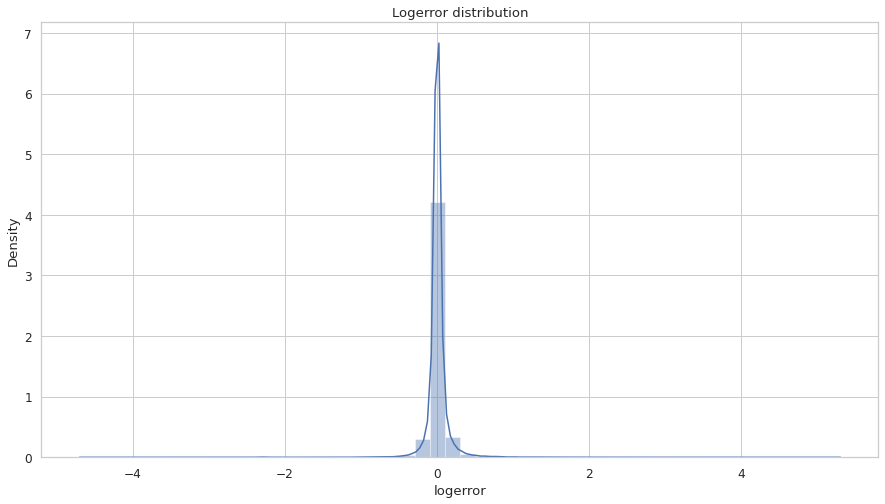

In [ ]:
#print logerror distribution
plt.figure(figsize=(15,8))
sns.distplot(train_df['logerror']).set_title("Logerror distribution");

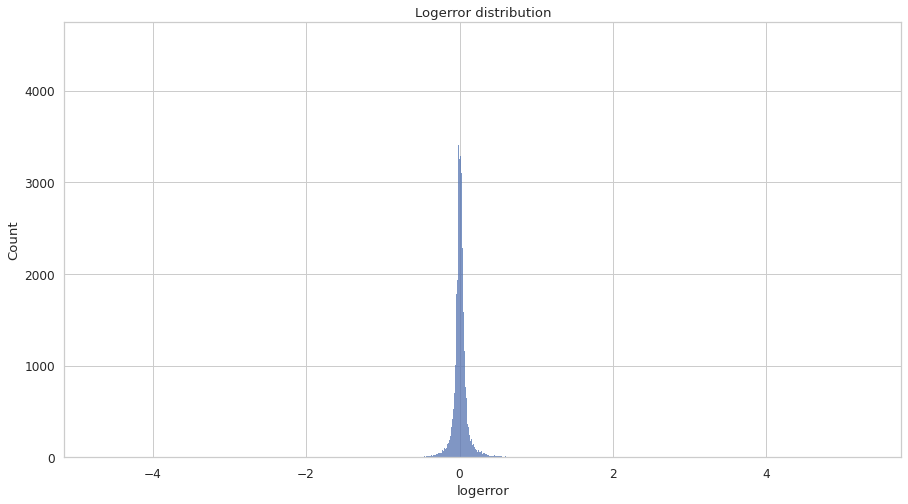

In [ ]:
#print logerror distribution
plt.figure(figsize=(15,8))
sns.histplot(train_df['logerror']).set_title("Logerror distribution");

Observations:   
  
   from the above 2 graph about the logerror distribution we can observe thata: we have negative and positive logerror, a negative logerror means Zestimate is underestimated the house sale price, whereas positive logerror means overestimating. logerror close to zero will definetly means that Zestimate is very close to sale price.

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

In [ ]:
#discrete columns
discret = [col for col in [col for col in train_df.columns if train_df[col].dtypes in ['int64','float64']] if 'sqft' not in col and  'cnt' not in col and  'nbr' not in col and 'number' not in col and len(train_df[col].unique())< 50  ]
print('we are having {} columns of discret variable which are columns with unique values less than 50'.format(len(discret)))

we are having 17 columns of discret variable which are columns with unique values less than 50


In [ ]:
#continues columns
continues = [col for col in [col for col in train_df.columns if train_df[col].dtypes in ['int64','float64']] if col not in discret]
print('we are having {} columns ofcontinues variable which are columns with unique values more than 50'.format(len(continues)))

we are having 37 columns ofcontinues variable which are columns with unique values more than 50


In [ ]:
#function to plot parameter values in graph
## modify version from https://www.analyticsvidhya.com/blog/2021/06/eda-exploratory-data-analysis-with-python/
def univariate(data,col,vartype=[0,1],hue =None):    
    '''
    Univariate function will plot parameter values in graphs.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuous or categorical
                Continuous(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : Only applicable in categorical analysis.
    '''
    sns.set(style="darkgrid")
    df = data.copy()
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=5,figsize=(20,6))
        #
        ax[0].set_title(col+" Distribution Plot")
        sns.distplot(df[col],ax=ax[0])

        ax[1].set_title(col+" Violin Plot")
        sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")#.set(ylabel='')
        #
        ax[2].set_title(col+" Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[2],orient='v')
        #
        ax[3].set_title(col+" strip Plot")
        sns.stripplot(data =df, x=col,ax=ax[3])
        df[col]=np.log(df[col])
        ax[4].set_title(col+" scatter Plot")
        sns.scatterplot(x =df[col], y=df['logerror'],ax=ax[4])

        

    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
      
        width = len(df[col].unique()) + 3 + 2*len(temp.unique())
        fig.set_size_inches(width , 4)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(df))), (p.get_x()+0.05, p.get_height()+10))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.16, p.get_height()+10)) 
        del temp
    else:
        exit
    fig.tight_layout()
    plt.show()

**continues features columns**

In [ ]:
for col in train_df[continues].columns:
  univariate(train_df,col,0,hue =None)

Output hidden; open in https://colab.research.google.com to view.

Observations:

    we can firstly observe that some column such as ' poolcnt, unicnt, regionidzip, yardbuildingsqft17,censustracktandblock, threequarterbathnbr' have less visible data point. 
    we can also observe many outlier and unreasonable data point ex: poolcnt just show existance of 1 pool data point. (error Nan values could mean no pool and a property most of time could only have one pool)
    'fireplacent,graracarcnt,romcnt and threequarterbathnbr' could not display data representation in quartile.
    distribution longitude vs logerror doesnt diaplay any data point where latitude vs logitude does with error range between -4,4

**Discret feature column**

In [ ]:
discret = [ col for col in discret if train_df[col].nunique()>1]

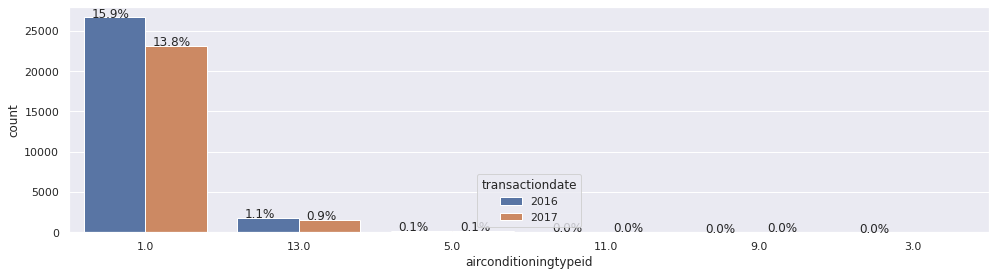

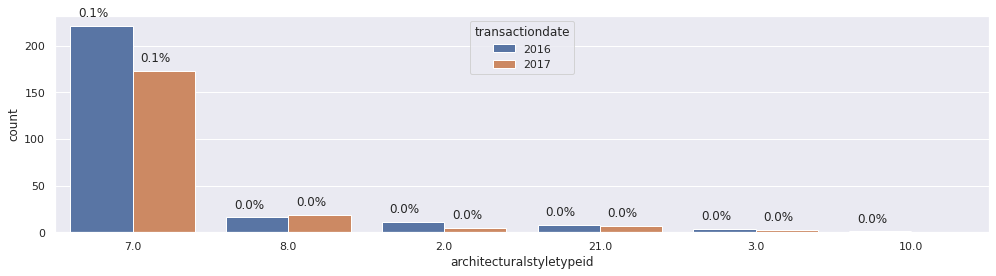

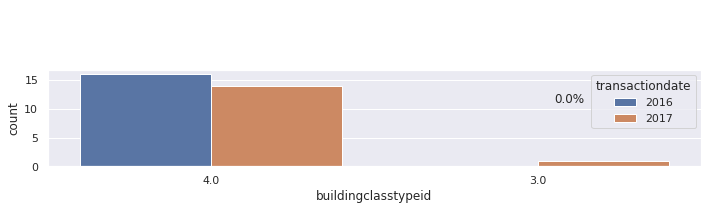

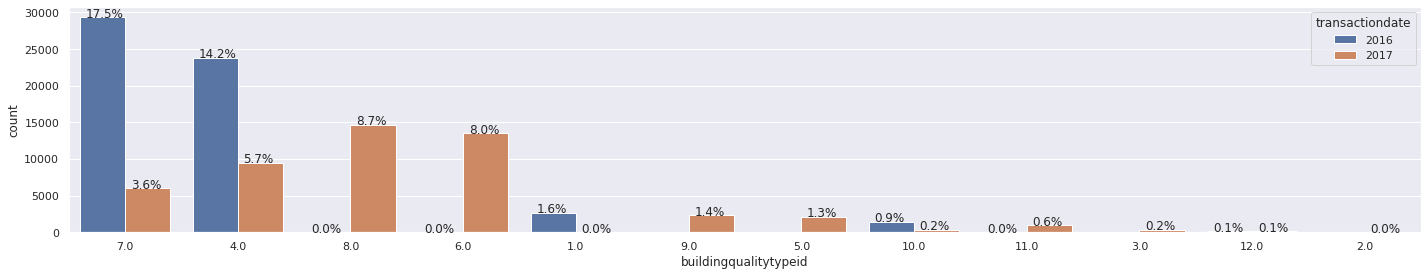

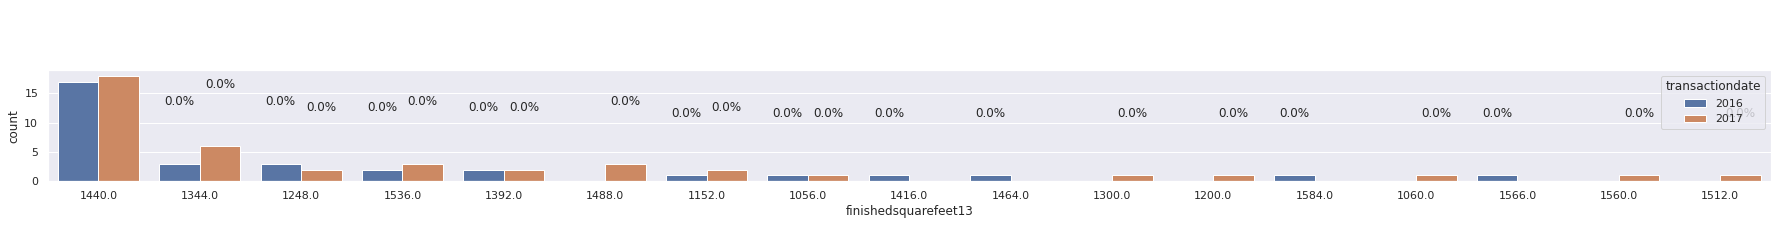

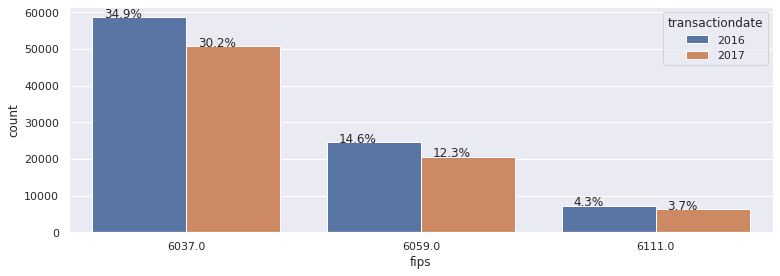

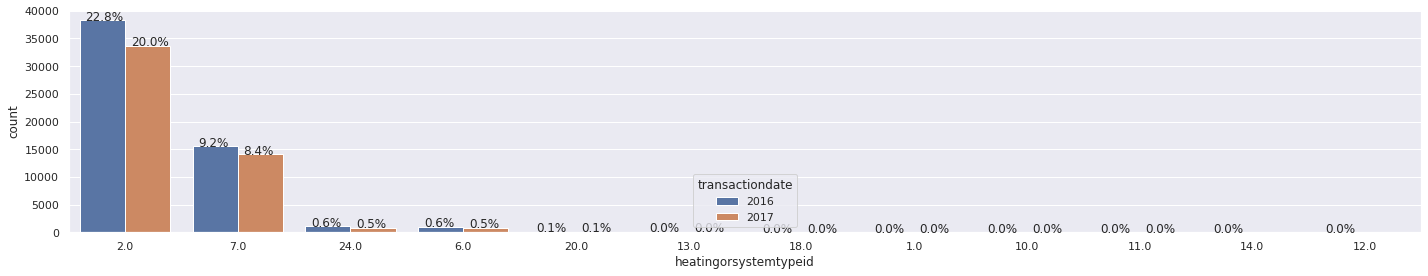

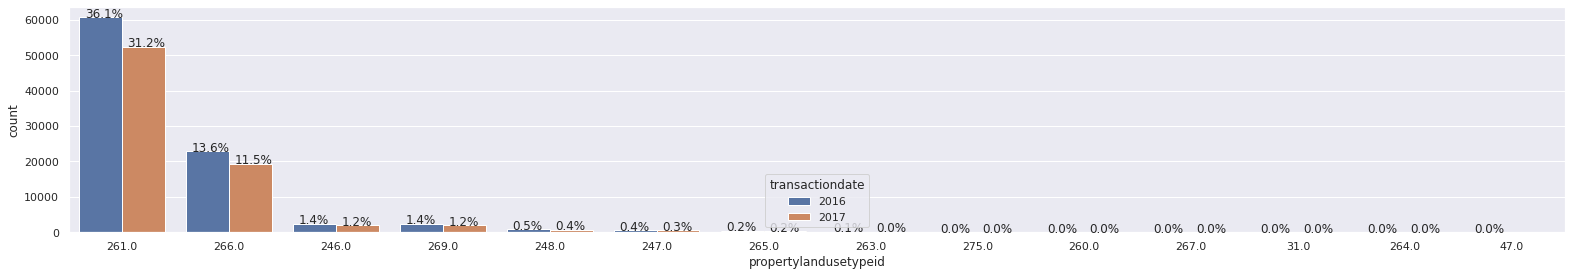

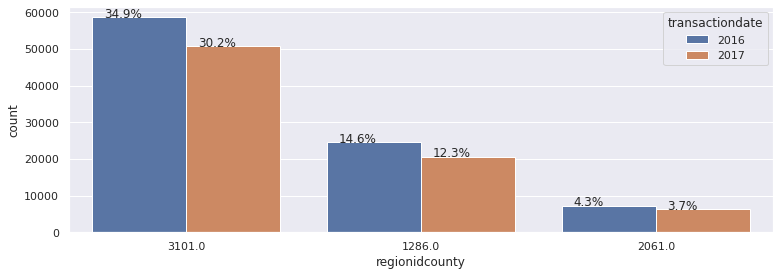

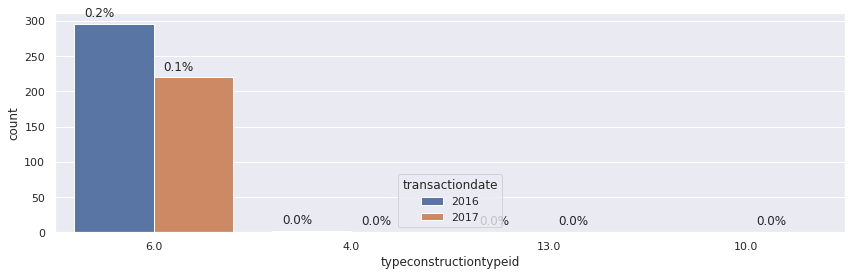

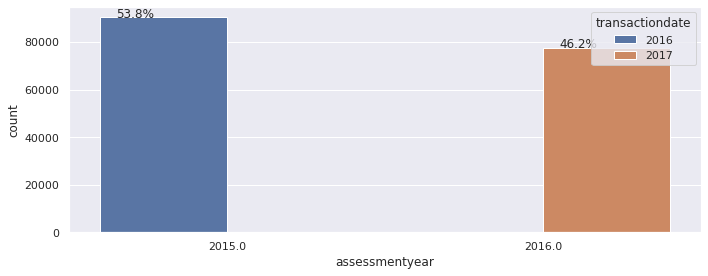

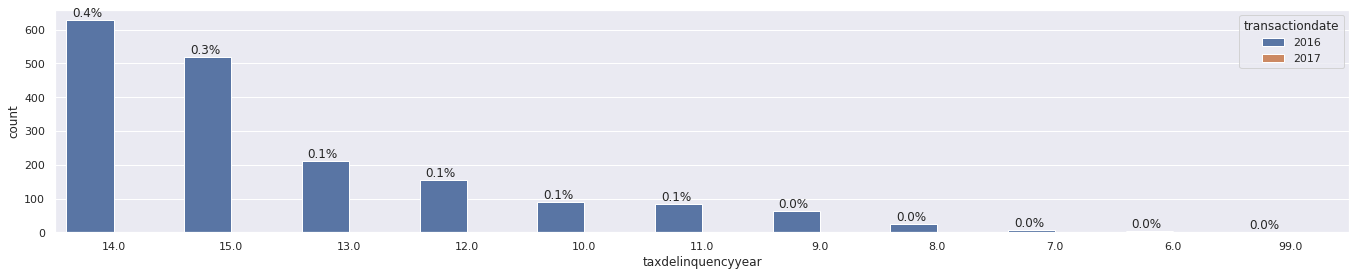

In [ ]:
for col in train_df[discret].columns:
  univariate(train_df,col,1,hue =train_df.transactiondate.dt.year)

Observations:     
    
    Here only columns with unique value more than 1 are considered.
    we can observe that airconditionningtypeid,architecturalstyletypeid, buildingclasstypeid, and typeconstructiontypeid have one class with huge values, dominating the others classes(unbalenced).
    we don see any dat points on taxdelinquencyyear in 2017.
    

**Temporal visualization**

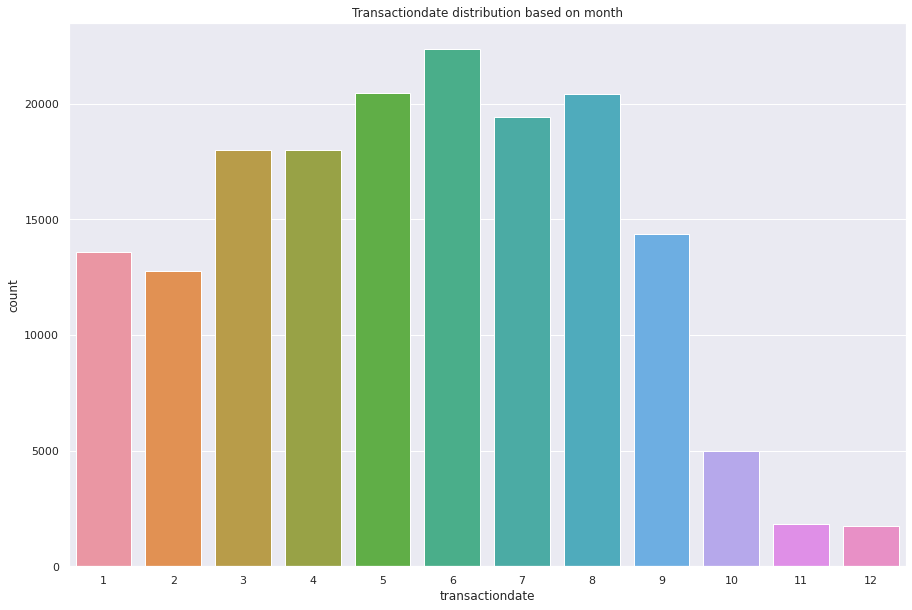

In [ ]:
#Temporal data distribution
plt.figure(figsize=(15,10))
sns.countplot(x=train_df.transactiondate.dt.month).set_title("Transactiondate distribution based on month");


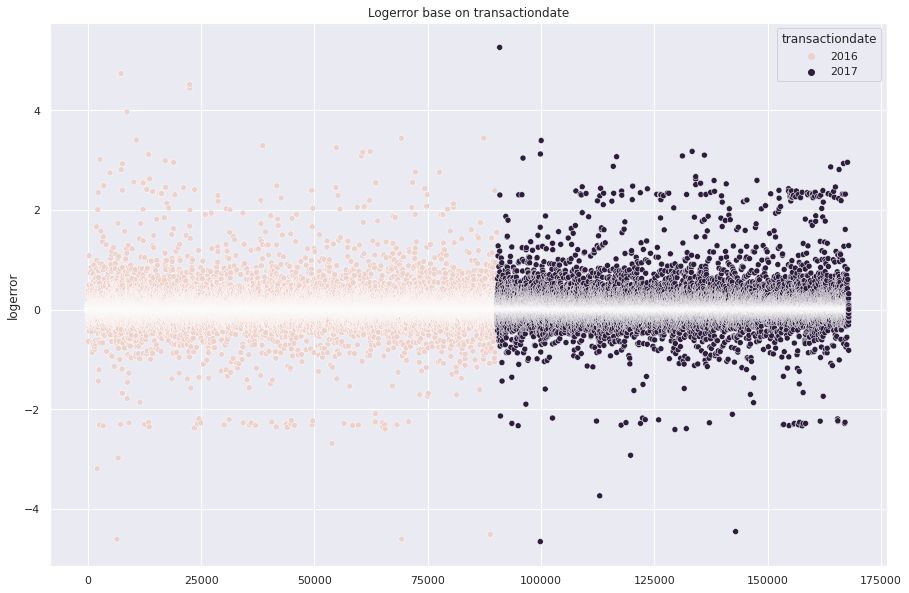

In [ ]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=train_df.index,y=train_df.logerror,hue=train_df.transactiondate.dt.year).set_title("Logerror base on transactiondate");

Observations:    
  
    From the monthly transactiondate record graph we can observe that november and december has less transaction and jun have the maximum number of transactions.
    from the second graph its a bit difcicult to see any difference between data point on 2016 and 2017. the log error are more centered between [-2,2]

**Categorical** 

In [ ]:
categorical = [col for col in train_df.columns if train_df[col].dtypes  in ['object'] ]
categorical

['hashottuborspa',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'fireplaceflag',
 'taxdelinquencyflag']

In [ ]:
train_df['propertycountylandusecode'].unique()

array(['0100', '1', '010C', '122', '1129', '34', '1128', '010E', '0104',
       '0101', '0200', '0700', '1111', '01DC', '010D', '1110', '0400',
       '012C', '010V', '1116', '01HC', '010G', '0300', '010F', '1117',
       '0103', '38', '1210', '0111', '010M', '96', '135', '0108', '1014',
       '1112', '0201', '0109', '1310', '010H', '1410', '1222', '1321',
       '1720', '1011', '1432', '0401', '0102', '012D', '73', '105',
       '0110', '100V', '0130', '8800', '0303', '0210', '1012', '1333',
       '0114', '01DD', '020G', '040A', '012E', '020M', '040V', '070D',
       '1200', '030G', '1722', '6050', '1421', '010', nan, '200', '0',
       '1420', '0131', '0301', '01HE', '0204', '0113', '0133', '040G',
       '1120', '0105', '0141', '0115', '010L', '040B', '0203', '020E'],
      dtype=object)

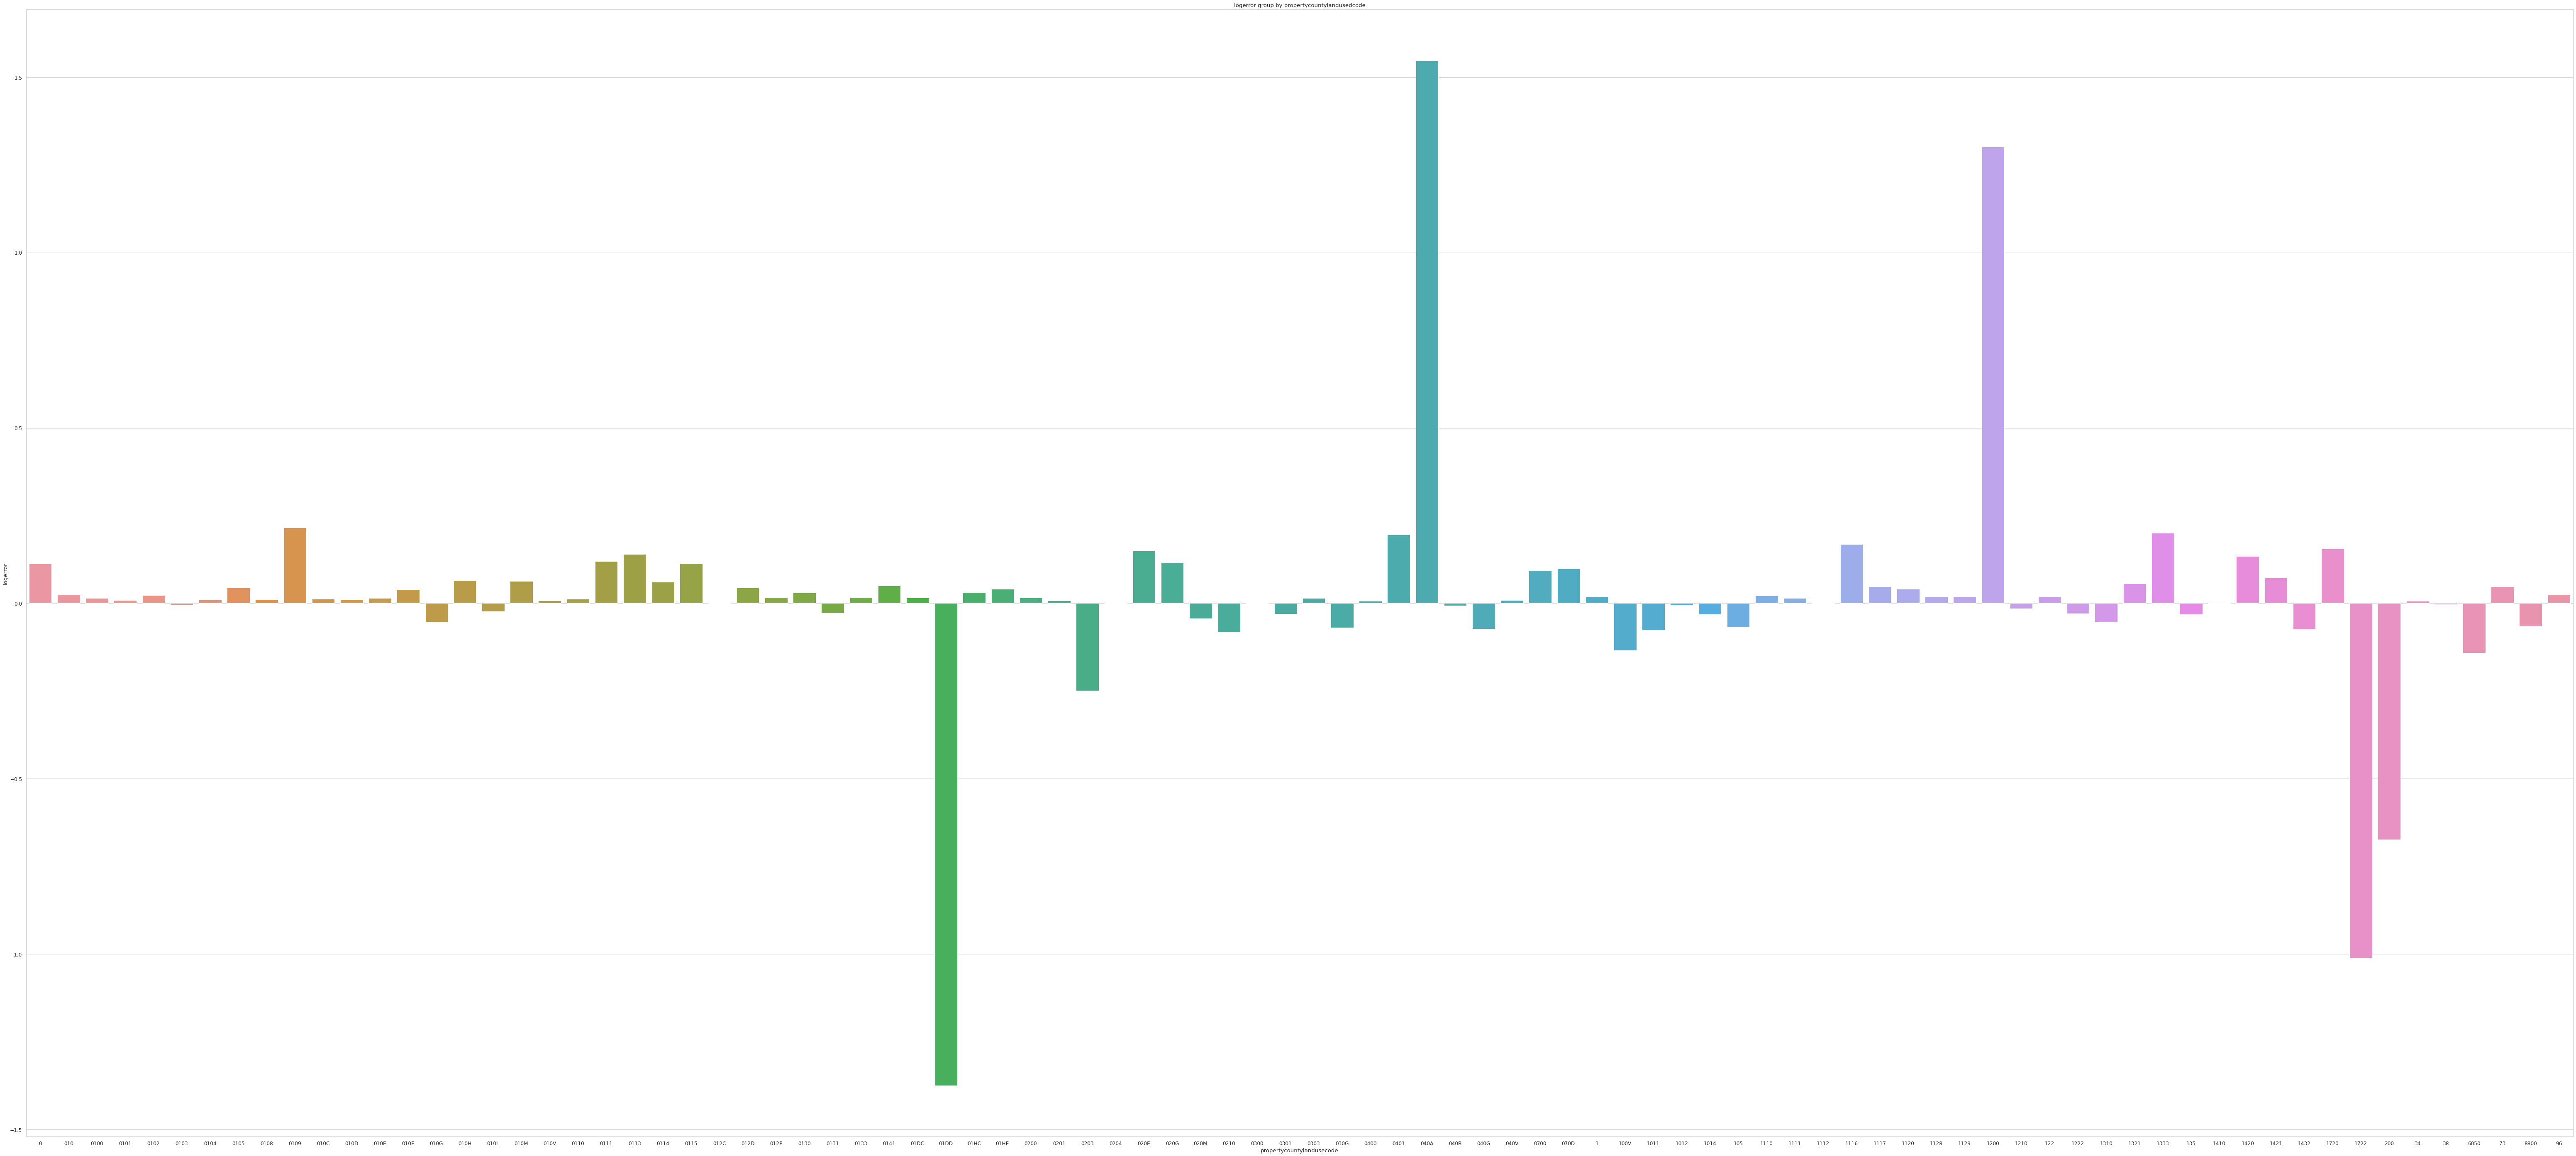

In [ ]:
df = train_df.groupby('propertycountylandusecode')['logerror'].mean().reset_index()
plt.figure(figsize=(110,50))
sns.barplot(data=df,x='propertycountylandusecode',y='logerror').set_title("logerror group by propertycountylandusedcode");


Obseervations:    

   Some county properties have an average logerror values very high by far away than other county that could be assign as a Zestimate under or overestimate the property price in those specific counties. 

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**Ask & Answer some Questions about the Dataset** 

The answer can give us better understanding of the dataset and idea on implementing feature engineering

    1. For each of feature column, does an increase in the value of that feature would lead to an increase in the value of 'logerror' or a decrease in the value of 'logerror'? why？

    2. Base on geo data such as longitude and latitude what are the location(city & neighborhood town) with highess logerror range? 

    3. What feature have considerable impact (hint:correlation)?

1. for each of feature column, does an increase in the value of that feature would lead to an increase in the value of `logerror` or a decrease in the value of `logerror` ? why?

In [ ]:
feature = [col for col in train_df.columns if train_df[col].dtypes in ['int64','float64'] and col not in ['parcelid'] and len(train_df[col].unique())>1]

In [ ]:
#1for each of features column, does an increase in the value of that feature would lead to an increase in the value of 'logerror' or a decrease in the value of 'logerror'? why？
def features_vs_logerror_distribution(data,rows,cols):
  nrows = rows
  ncolumns = cols 
  fig, axis = plt.subplots(nrows,ncolumns,figsize=(20,40))
  df = data.copy()
  df['hue'] = df.logerror>=0
  features_cols = [col for col in df.columns if df[col].dtypes in ['int64','float64'] and col not in ['parcelid',	'logerror',	'transactiondate'] and len(df[col].unique())>1]
  for r in range(nrows):
    for c in range(ncolumns):
      i = r*ncolumns + c 
      col = features_cols[i]
      # df1 = pd.DataFrame(df.groupby(col)['logerror'].median())
      sns.scatterplot(x=df[col], y=df.logerror,ax=axis[r,c],hue=df.hue)
  fig.tight_layout()
  #  plt.title(col + 'vs  logerror distribution')
  plt.show()

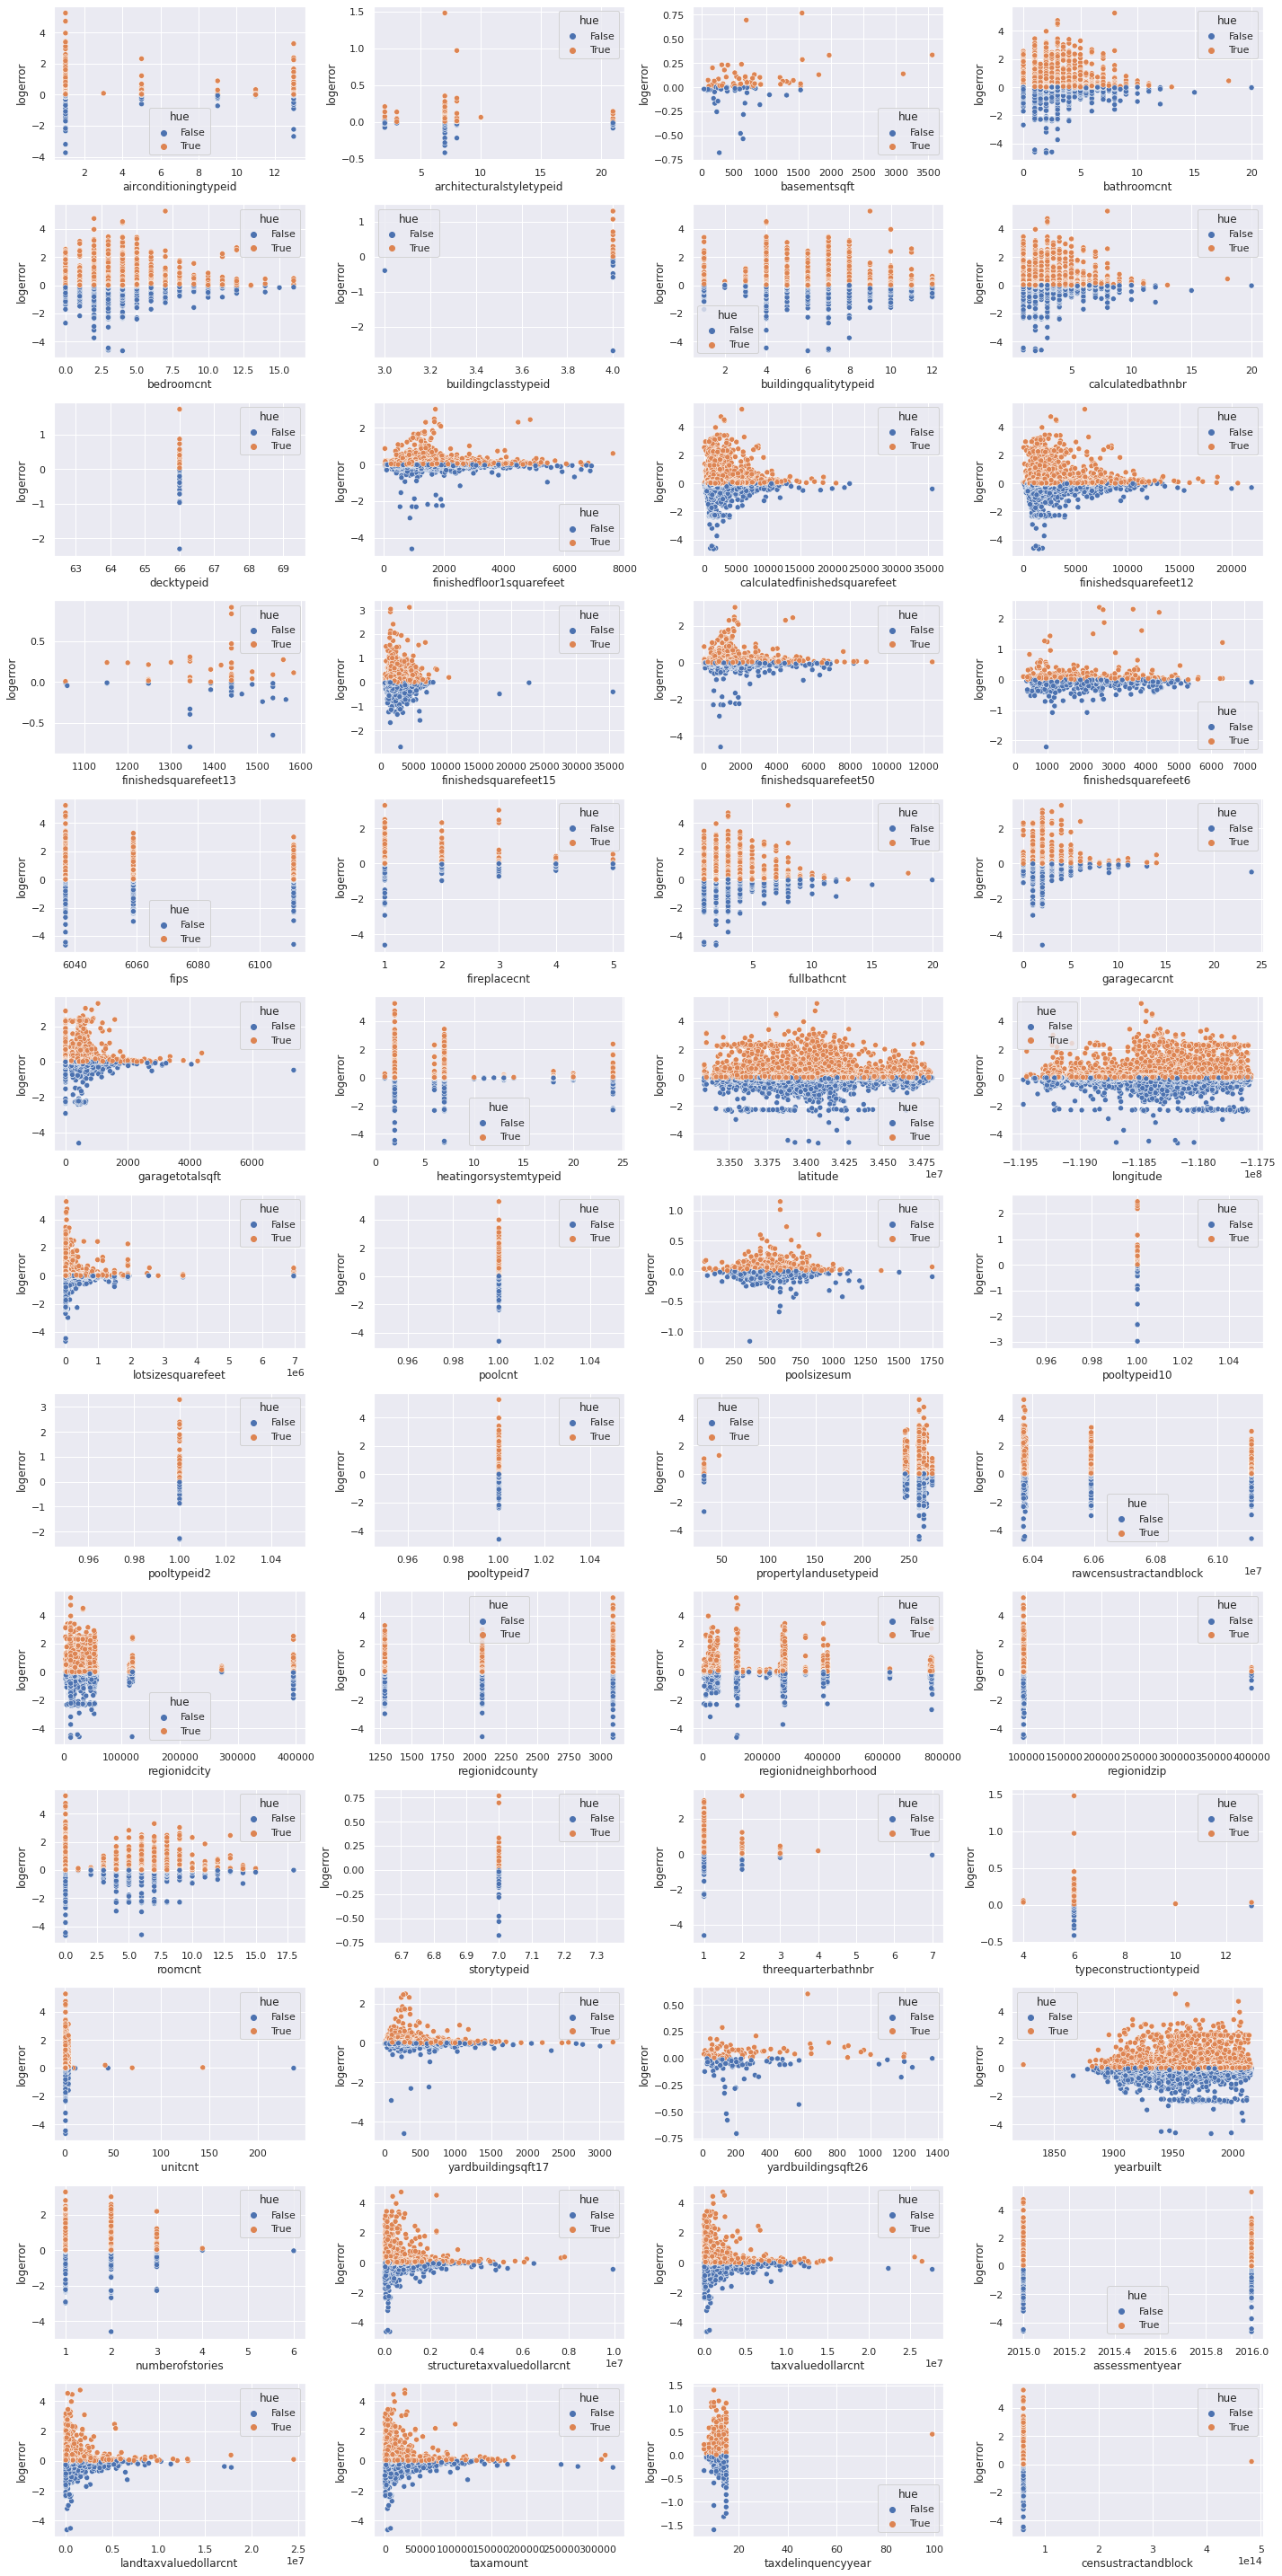

In [ ]:
features_vs_logerror_distribution(train_df,13,4)

Obeservations:     
  
    By observing the above graph itw ould be not reasonable to conclude that as features values increase the logerror also increase.
    first using let consider that base on our metric logerror having logerror close to zero means close to the reel price estimation.
    logeror in feature column containing substring such tax,bath and finished(except finishedsquarefeet13) get more close to zero as features values numbers increase, same with bedromcnt and garage. 
    romcnt logerror start increasing gradually from 2 room  then slowly decrease after 6-7 rooms.  
    finishedsquarefeet13 have an logerror between [-0.5,0.5] wich is among th lowest error range followed by yardbuildingsqfts6[-0.75,0.5] and storytypeid, basement sqft having a range of [-0.75,0.75] somes features columns having logerror range betwen [-1,1],[-1.5,1.5]...[-5,5].

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

Let's have a look on the geo representation base on log error

In [ ]:
!pip install geopandas shapely contextily --quiet

     |████████████████████████████████| 1.0 MB 9.1 MB/s 
     |████████████████████████████████| 15.4 MB 130 kB/s 
     |████████████████████████████████| 6.3 MB 34.5 MB/s 
     |████████████████████████████████| 19.3 MB 1.2 MB/s 


In [ ]:
import  geopandas as gpd
from shapely.geometry import Point,Polygon 
from pyproj import CRS
import contextily as cx
import random

In [ ]:
us_geo = 'https://www.kaggle.com/dejolilandry/us-geopandas'
od.download(us_geo)

100%|██████████| 170k/170k [00:00<00:00, 68.2MB/s]

In [ ]:
states = gpd.read_file('/content/us-geopandas/usa-states-census-2014.shp')
type(states)

geopandas.geodataframe.GeoDataFrame

In [ ]:
#designate coordinate
crs = CRS('EPSG:4326')#.to_proj4()
# x and y coordinates 
df = train_df.copy()
df['longitude'] = train_df['longitude']/1e6
df['latitude'] = train_df['latitude']/1e6
geometry = [Point(xy) for xy in zip(df['longitude'],df['latitude'])]

# create Geopandas dataFrame
geo_df  = gpd.GeoDataFrame(df,crs=crs,geometry= geometry)

In [ ]:
CA = states[states.NAME=="California"]

In [ ]:

cities = pd.DataFrame({'city':['Los Angeles','Anaheim','Irvine','Long Beach','Oxnard','Ventura','Palmdale','Lancaster','Hesperia','Riverside','San Bernardino','Santa Ana','Santa Barbara'],
                       'longitude':[-118.249923, -117.924770,-117.793723, -118.285261,-119.165045,-119.225597,-118.127173,-118.135903,-117.289121,-117.405517,-117.66,-117.88,-119.71],
                       'latitude':[ 34.088537,33.838199, 33.683549, 33.778341, 34.171196,34.283106,34.612009,34.719710,34.420196,33.972528,34.14,33.74,34.4]
})

city_geometry = [Point(xy) for xy in zip(cities['longitude'],cities['latitude'])]

# create Geopandas dataFrame
geo_cities  = gpd.GeoDataFrame(cities,crs=crs,geometry= city_geometry)

In [ ]:
def plot_california_cities(min_range_log,max_range_log):
 

  fig,ax = plt.subplots(figsize=(10,10))
  # ax.margins(y=0.1,x=0.1)
  color = random.choice(['black','blue','yellow','red','green','white','orange'])
   
  ###state
  CA.apply(lambda x: ax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
  CA.boundary.plot(ax=ax,alpha=0.5,color='black')
  CA.to_crs(epsg=4326).plot(ax=ax,color='lightgrey')
  #cities
  geo_cities.apply(lambda x: ax.annotate(s=x.city, xy=x.geometry.centroid.coords[0], ha='center'),axis=1)
  geo_cities.boundary.plot(ax=ax,alpha=0.5,color='blue')
  geo_cities.to_crs(epsg=4326).plot(ax=ax,color='lightgrey')
  # geo_df_mask = geo_df[geo_df.logerror.between(-0.01,0.01)]
  geo_df_new = geo_df[~geo_df.logerror.between(-0.01,0.01)]
  geo_df_new = geo_df_new[geo_df.logerror.between(min_range_log,max_range_log,inclusive=False)].copy()
  geo_df_new.plot(ax=ax,column='logerror',color=color)
  cx.add_basemap(ax)
  plt.xlim((train_df.longitude.min()/1e6-0.5),(train_df.longitude.max()/1e6+0.5))
  plt.ylim((train_df.latitude.min()/1e6-0.5),(train_df.latitude.max()/1e6+0.5))
  
  fig.tight_layout()
  plt.title('logerror plotting range is between [{},{}]'.format(min_range_log,max_range_log))
  # print('logerror plotting range is between [{}，{}]'.format(min_range_log,max_range_log))
  plt.show()

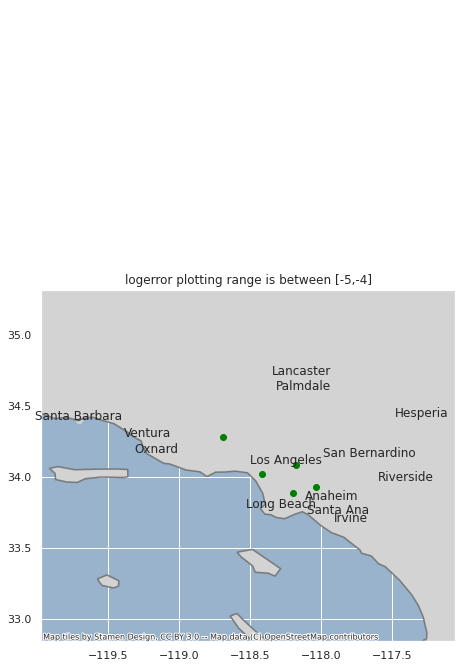

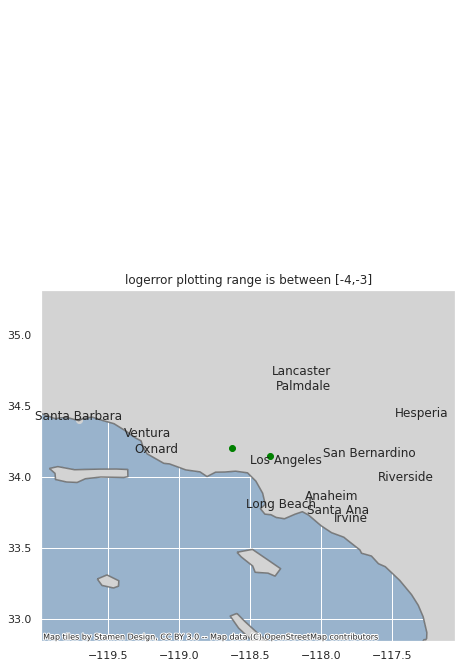

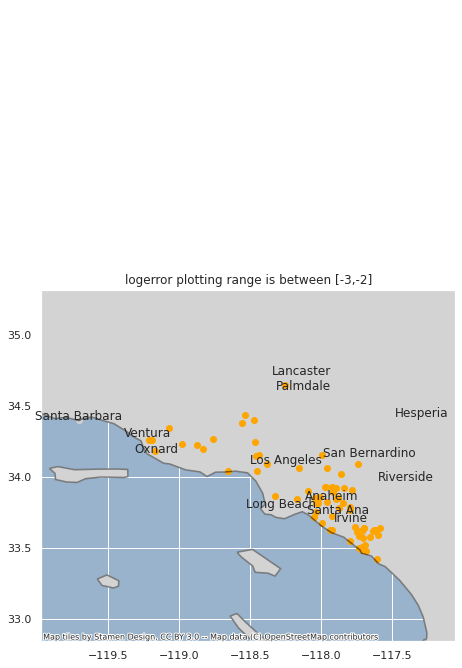

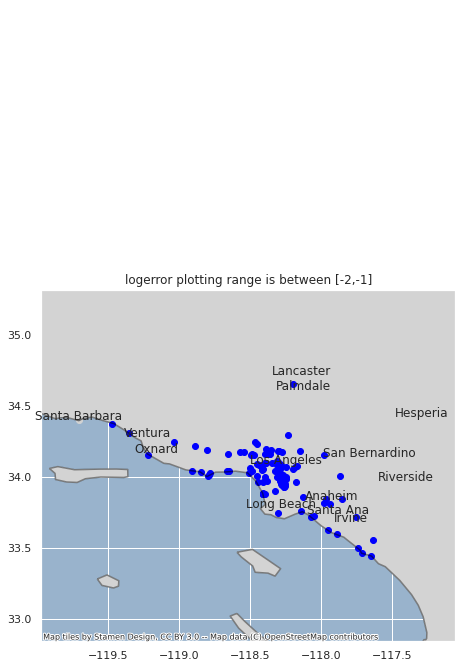

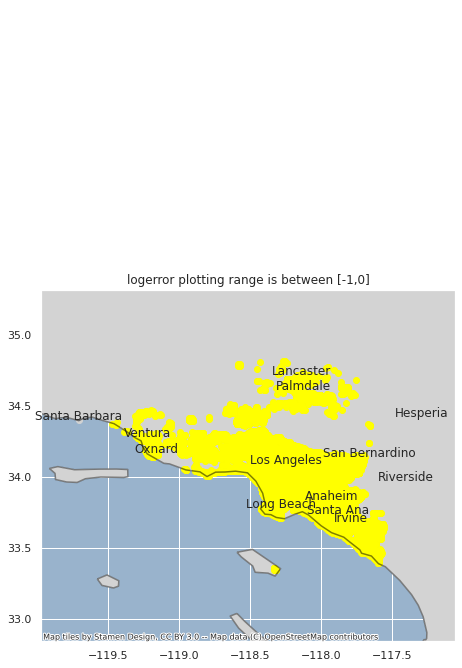

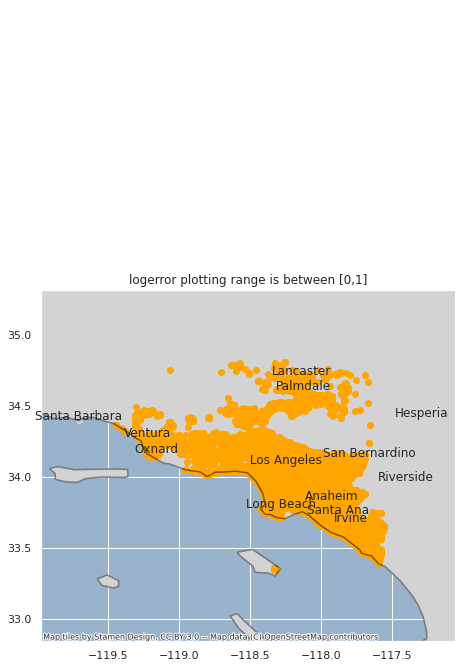

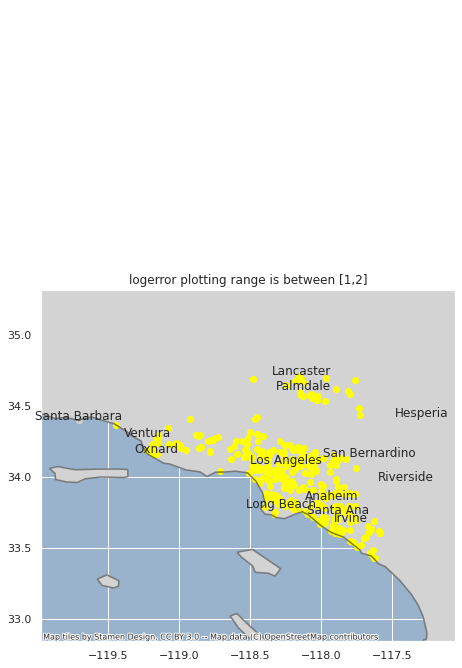

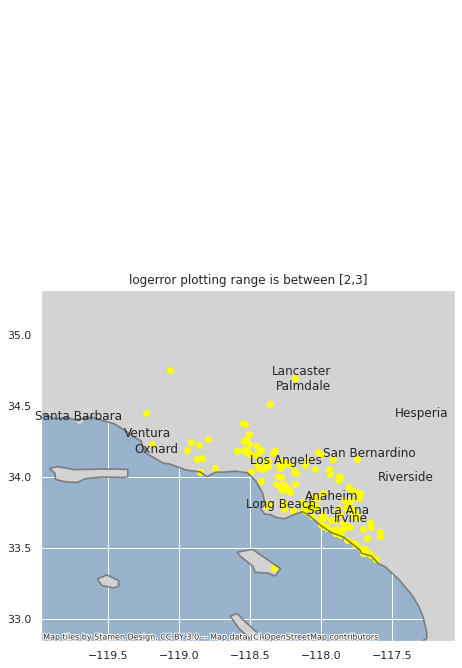

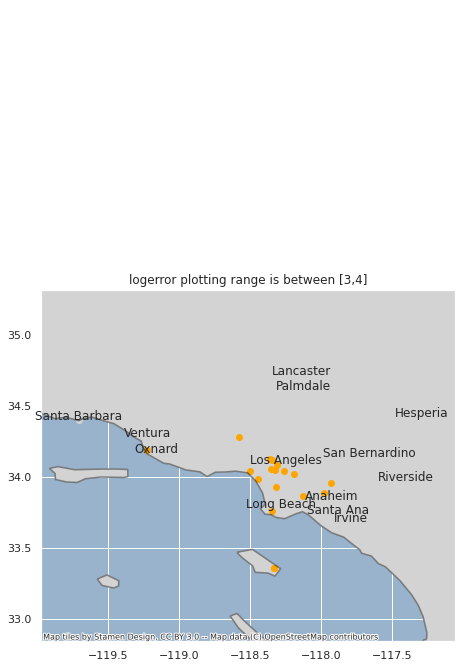

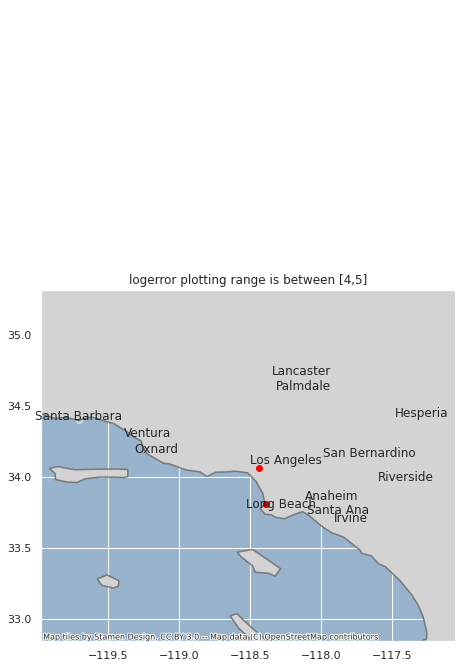

In [ ]:
for n in [x for x in range(-5,5)]:
  plot_california_cities(n,n+1)

Observations:  
   
    we found out base on longitude and latitude observations most of the data are from south California state, arround Los Angeles.
    the Highess logerror range of data point are between [-1,-0.01] and [0.01,1] covering Los Angeles neighbourhood cities/town such as Anaheim, Santa Ara, Irvine, Long Beach..

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

3. Feature correlation

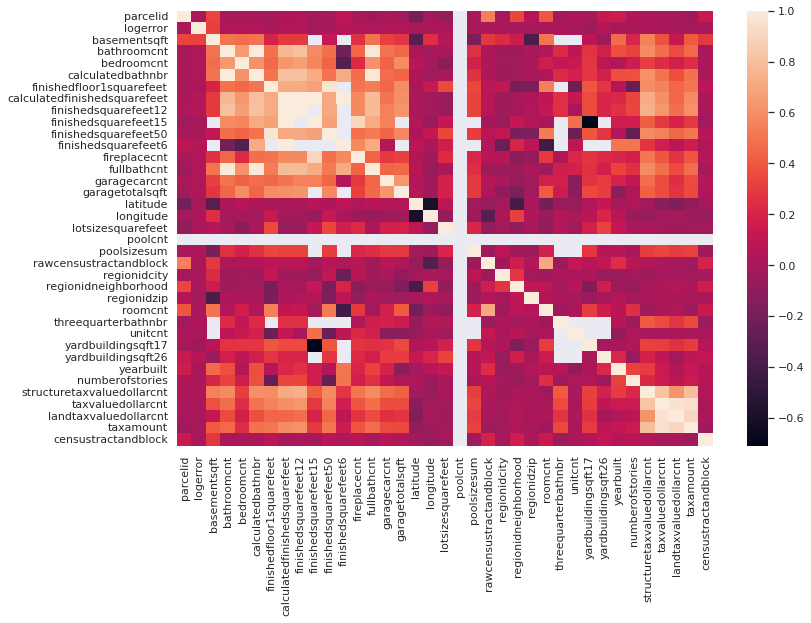

<Figure size 432x288 with 0 Axes>

In [ ]:
#Use heatmap to determine if any continuous variables are correlated
plt.figure(figsize = (12,8))
sns.heatmap(data=train_df[continues].corr())
plt.show()
plt.gcf().clear()

Observations:    
  
    we can observe the spread the heatmap into 4 range[white,orange,purple,black] showing the level of correlation from the highest(white) to the lowest(dark).
    features column with substring 'tax' ,'finished..feet','cnt','calculated' are correlated.

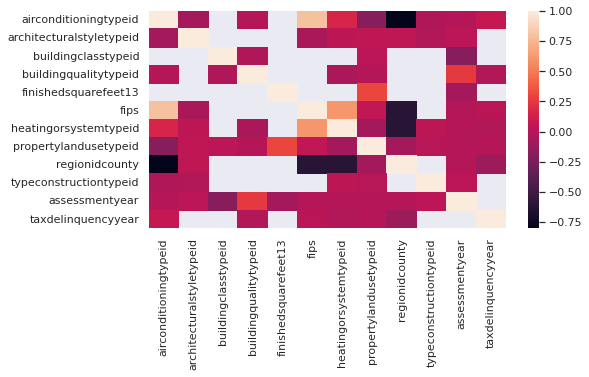

<Figure size 432x288 with 0 Axes>

In [ ]:
#Use heatmap to determine if any discret variables are correlated
plt.figure(figsize = (8,4))
sns.heatmap(data=train_df[discret].corr())
plt.show()
plt.gcf().clear()

Observations:       
   
    we can observe that features columns buildingqualitytypeid & flips show to have more correlations than others

In [ ]:
jovian.co

## **Single Training Model**

### 3. **Data Cleaning & Fixing** 

Check duplicated values

In [61]:
print(train_df.duplicated().sum())
print(test_df.duplicated().sum())

0
0


In [62]:
train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

Try to fixe some missing values based on observations 

    'poolcnt', 'unicnt', 'regionidzip', 'yardbuildingsqft17','censustracktandblock','fireplacent','graracarcnt,'romcnt' and 'threequarterbathnbr' 

In [63]:
print(train_df.poolcnt.isnull().sum())
print(train_df.poolcnt.value_counts())
print(train_df.poolsizesum.isnull().sum())

133813
1.0    34075
Name: poolcnt, dtype: int64
166050


In [64]:
def clean_and_fixing(data):
  df = data.copy()
  ## pool 
  # bad_index = df[df.poolcnt.isnull()].index
  # df.loc[bad_index,'poolcnt']=0
  # if no pool then poolsize equal to 0
  bad_index = df[df.poolcnt==0].index
  df.loc[bad_index,'poolsizesum']=0
  # if have a pool
  have_pool_index = df[(df['poolcnt'] > 0) & (df['poolsizesum'].isnull())].index
  poolsize = df.groupby(['regionidcity','regionidzip'])['poolsizesum'].transform('median')
  df.loc[have_pool_index, 'poolsizesum'] = poolsize

  # unitcnt                       
  bad_index = df[df.unitcnt.isnull()].index
  df.loc[bad_index,'unitcnt']=1

  #decktypeid
  df['decktypeid'] = np.where(df['decktypeid'].isnull(),0,1)
 
  #fireplacent
  df['fireplacecnt'] = np.where(df['fireplacecnt'].isnull(),0,1)

  #hashottuborspa 
  df['hashottuborspa'] = np.where(df['hashottuborspa']=='',0,1)

  #taxdelinquencyflag
  df['taxdelinquencyflag'] = np.where(df['taxdelinquencyflag']=='',0,1)
  #airconditiontypeid
  df['airconditioningtypeid'] = np.where((df.airconditioningtypeid.isnull()) & (df.heatingorsystemtypeid==2),1,df.airconditioningtypeid)

  #heatingorsystemtypeid
  bad_index = df[df.heatingorsystemtypeid.isnull()].index
  df.loc[bad_index,'heatingorsystemtypeid']=0

  ##finishedfloor1squarefeet is not supposed to be bigger than total calculatedfinishedsquarefeet
  index = df.loc[df['calculatedfinishedsquarefeet']<df['finishedfloor1squarefeet']].index
  df.loc[index,'finishedfloor1squarefeet'] = np.nan

  #garagetotalsqft
  df[(df.garagecarcnt==0) & (df['garagetotalsqft']>0)].index
  df.loc[index,'garagecarcnt'] = np.nan
  
  #taxvaluedollarcnt
  bad_index = df[df['taxvaluedollarcnt'].isnull()].index
  df.loc[bad_index,'taxvaluedollarcnt'] = df['structuretaxvaluedollarcnt'] + df['landtaxvaluedollarcnt']

  # # #structuretaxvaluedollarcnt
  # bad_index = df[df['structuretaxvaluedollarcnt'].isnull()].index
  # df.loc[bad_index,'structuretaxvaluedollarcnt'] = df['taxvaluedollarcnt']  -  df['landtaxvaluedollarcnt']
  
  # # #landtaxvaluedollarcnt
  # bad_index = df[df['landtaxvaluedollarcnt'].isnull()].index
  # df.loc[bad_index,'landtaxvaluedollarcnt'] = df['taxvaluedollarcnt']  -  df['structuretaxvaluedollarcnt']


  # bad_index = df[df['structuretaxvaluedollarcnt']==0].index
  # df.loc[bad_index,['finishedsquarefeet12','calculatedfinishedsquarefeet','garagetotalsqft','finishedsquarefeet50' ,'lotsizesquarefeet','finishedfloor1squarefeet','yearbuilt']] = np.nan
 
  return df

In [65]:
train_df = clean_and_fixing(train_df)
test_df = clean_and_fixing(test_df)

In [66]:
train_df[train_df.landtaxvaluedollarcnt>train_df.taxvaluedollarcnt]

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock


In [67]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 167887
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   parcelid                      167888 non-null  int64         
 1   logerror                      167888 non-null  float64       
 2   transactiondate               167888 non-null  datetime64[ns]
 3   airconditioningtypeid         77890 non-null   float64       
 4   architecturalstyletypeid      468 non-null     float64       
 5   basementsqft                  93 non-null      float64       
 6   bathroomcnt                   167854 non-null  float64       
 7   bedroomcnt                    167854 non-null  float64       
 8   buildingclasstypeid           31 non-null      float64       
 9   buildingqualitytypeid         107173 non-null  float64       
 10  calculatedbathnbr             166056 non-null  float64       
 11  decktypeid   

In [68]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

##### **Impute Geo and tax related missing data.** (couldn't improve)

here we will use the suggested KNeighbors algorithm to impute missing data

In [69]:
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler

    'structuretaxvaluedollarcnt' = 'taxvaluedollarcnt' - 'landtaxvaluedollarcnt' 

In [70]:
geo_column= ['latitude', 'longitude','buildingqualitytypeid','propertycountylandusecode','propertyzoningdesc','regionidcity','regionidneighborhood','regionidzip','unitcnt','yearbuilt','lotsizesquarefeet']

In [71]:
geo_fix_missing = [col for col in train_df.columns if col in geo_column and col not in ['longitude','latitude']]
geo_fix_missing

['buildingqualitytypeid',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertyzoningdesc',
 'regionidcity',
 'regionidneighborhood',
 'regionidzip',
 'unitcnt',
 'yearbuilt']

In [72]:
tax_fix_missing = ['structuretaxvaluedollarcnt','taxamount']

**Geo Missing**

In [73]:
train = train_df.copy()
test = test_df.copy()

In [74]:
# train_drop = train_df[(train_df.longitude.isnull()) | (train_df.latitude.isnull()) ]
# test_drop = test_df[(test_df.longitude.isnull()) | (test_df.latitude.isnull()) ]

In [75]:
# train = train[(train.longitude.notnull())&(train.latitude.notnull())]
# test = test[(test.longitude.notnull())&(test.latitude.notnull())]

In [76]:
# modify version of idea from https://www.kaggle.com/auroralht/restoring-the-missing-geo-data with some minor amendments
def ImputingKNeighborClassifier(data,base, target, fraction = 0.5, threshold = 10, n_neighbors = 10):
  df = data.copy()
  if target in geo_fix_missing or df[target].dtypes in ['object']:
    assert isinstance( base , list ) or isinstance( base , np.ndarray ) and isinstance( target, str ) 
    cols = [ target ] + base
    miss = df[target].isnull()
    notmiss = ~miss 
    nummiss = miss.sum()
    enc = OneHotEncoder(categories='auto')
    X_target = df.loc[ notmiss, cols ].sample( frac = fraction )
    enc.fit( X_target[ target ].unique().reshape( (-1,1) ) )
    Y = enc.transform( X_target[ target ].values.reshape((-1,1)) ).toarray()
    X = X_target[ base  ]
    print( 'fitting' )
    clf = KNeighborsClassifier( n_neighbors, weights = 'uniform' )
    clf.fit( X, Y )
    print( 'the shape of active features: ' ,(df.loc[ miss, target ].index).shape )
    print( 'predicting' )
    Z = clf.predict(df.loc[miss, base])
    numunperdicted = Z[:,0].sum()
    if numunperdicted / nummiss *100 < threshold :
        print( 'writing result to df' )    
        df.loc[ miss, target ]  = np.dot( Z[:,0] , df.loc[ miss, target ].index )
        data[target] = df[target]
        print( 'num of unperdictable data: ', numunperdicted )
        return data
    else:
        print( 'out of threshold: {}% > {}%'.format( numunperdicted / nummiss *100 , threshold ) )
        return data
    print('col {} have {} nan values'.format(target,df[target].isnull().sum()))
  # return data

In [77]:
# train = ImputingKNeighborClassifier(train,[ 'latitude', 'longitude' ],'buildingqualitytypeid')
# test = ImputingKNeighborClassifier(test,[ 'latitude', 'longitude' ],'buildingqualitytypeid')

In [78]:
# train = ImputingKNeighborClassifier(train,[ 'latitude', 'longitude' ],'propertyzoningdesc')
# test = ImputingKNeighborClassifier(test,[ 'latitude', 'longitude' ],'propertyzoningdesc')

In [79]:
# train = ImputingKNeighborClassifier(train,[ 'latitude', 'longitude' ],'propertycountylandusecode')
# test = ImputingKNeighborClassifier(test,[ 'latitude', 'longitude' ],'propertycountylandusecode')

In [80]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

In [81]:
# train = ImputingKNeighborClassifier(train,[ 'latitude', 'longitude' ],'regionidcity')
# test = ImputingKNeighborClassifier(test,[ 'latitude', 'longitude' ],'regionidcity')

In [82]:
# train = ImputingKNeighborClassifier(train,[ 'latitude', 'longitude' ],'regionidneighborhood')
# test = ImputingKNeighborClassifier(test,[ 'latitude', 'longitude' ],'regionidneighborhood')

In [83]:
# train = ImputingKNeighborClassifier(train,[ 'latitude', 'longitude' ],'regionidzip')
# test = ImputingKNeighborClassifier(test,[ 'latitude', 'longitude' ],'regionidzip')


In [84]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

In [85]:
# train = ImputingKNeighborClassifier(train,[ 'latitude', 'longitude' ],'unitcnt')
# test = ImputingKNeighborClassifier(test,[ 'latitude', 'longitude' ],'unitcnt')

In [86]:
# train = ImputingKNeighborClassifier(train,[ 'latitude', 'longitude' ],'yearbuilt')
# test = ImputingKNeighborClassifier(test,[ 'latitude', 'longitude' ],'yearbuilt')

In [87]:
# train_new = pd.concat([train,train_drop],axis=0)
# test_new = pd.concat([test,test_drop],axis=0)

In [88]:
# train_new.structuretaxvaluedollarcnt.isnull().sum()

**Tax relate Missing**

In [89]:
def ImputingKNeighborRegressor( data, base, target, n_neighbors = 10):
    df = data.copy()
    cols = base + [target]
    X_train = df[cols]
    scaler = StandardScaler(with_mean=True, with_std=True).fit(X_train[base].values.reshape(-1, 1))
    rescaledX = scaler.transform(X_train[base].values.reshape(-1, 1))

    X_train = rescaledX[df[target].notnull()]
    Y_train = df.loc[df[target].notnull(),target].values.reshape(-1, 1)

    knn = KNeighborsRegressor(n_neighbors, n_jobs = -1)    
    # fitting the model
    knn.fit(X_train, Y_train)
    # predict the response
    X_test = rescaledX[df[target].isnull()]
    pred = knn.predict(X_test)
    df.loc[data[target].isnull(),target] = pred
    data[target] = df[target]
    return data

In [90]:
# train_new2 = train_new#.copy()
# test_new2 = test_new#.copy()

In [91]:
# train_drop2 = train_new2[train_new2.taxvaluedollarcnt.isnull() ]
# test_drop2 = test_new2[test_new2.taxvaluedollarcnt.isnull() ]

# train2 = train_new2[train_new2.taxvaluedollarcnt.notnull() ]
# test2 = test_new2[test_new2.taxvaluedollarcnt.notnull() ]

In [92]:
# train2 = ImputingKNeighborRegressor( train2, ['taxvaluedollarcnt'], 'taxamount', n_neighbors = 10)
# test2 = ImputingKNeighborRegressor( test2, ['taxvaluedollarcnt'], 'taxamount', n_neighbors = 10)

In [93]:
# train2 = ImputingKNeighborRegressor( train2, ['taxvaluedollarcnt'], 'structuretaxvaluedollarcnt', n_neighbors = 10)
# test2 = ImputingKNeighborRegressor( test2, ['taxvaluedollarcnt'], 'structuretaxvaluedollarcnt', n_neighbors = 10)

In [94]:
# train_df = pd.concat([train2,train_drop2],axis=0)
# test_df = pd.concat([test2,test_drop2],axis=0)

In [95]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 167887
Data columns (total 60 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   parcelid                      167888 non-null  int64         
 1   logerror                      167888 non-null  float64       
 2   transactiondate               167888 non-null  datetime64[ns]
 3   airconditioningtypeid         77890 non-null   float64       
 4   architecturalstyletypeid      468 non-null     float64       
 5   basementsqft                  93 non-null      float64       
 6   bathroomcnt                   167854 non-null  float64       
 7   bedroomcnt                    167854 non-null  float64       
 8   buildingclasstypeid           31 non-null      float64       
 9   buildingqualitytypeid         107173 non-null  float64       
 10  calculatedbathnbr             166056 non-null  float64       
 11  decktypeid   

In [96]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

### 4. **Dataset Preparation**

**Removing Missing values**

as there are several columns with high missing values percentage, here we choosed to drop those with high missing values rate instead of trying filling.

In [97]:
# drop missing high percentage missing values 
def drob_missing(data,missing_threshold=0.98):
  df = data.copy()
  missing_columns = []
  number_rows = df.shape[0]
  
  for col in df.columns:
    missing = df[col].isnull().sum()
    if  missing == 0:
      continue
    missing_frac = missing / float(number_rows)
    if missing_frac > missing_threshold:
      missing_columns.append(col)
  print("droped {} columns which are {}".format(len(missing_columns),missing_columns))
  columns =  [col for col in df.columns if col not in missing_columns]
  df = df[columns].copy()
  return df,missing_columns

In [98]:
train_df,missing_columns = drob_missing(train_df,missing_threshold=0.98)

droped 13 columns which are ['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'finishedsquarefeet13', 'finishedsquarefeet6', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'storytypeid', 'typeconstructiontypeid', 'yardbuildingsqft26', 'fireplaceflag', 'taxdelinquencyyear']


In [99]:
train_df

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,finishedsquarefeet50,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,censustractandblock
0,11016594,0.027600,2016-01-01,1.0,2.0,3.0,4.0,2.0,0,NaN,1684.0,1684.0,NaN,NaN,6037.0,0,2.0,NaN,NaN,1,2.0,34280990.0,-118488536.0,7528.0,NaN,NaN,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,1.0,NaN,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,1,6.037107e+13
1,14366692,-0.168400,2016-01-01,NaN,3.5,4.0,NaN,3.5,0,NaN,2263.0,2263.0,NaN,NaN,6059.0,0,3.0,2.0,468.0,1,0.0,33668120.0,-117677556.0,3643.0,NaN,NaN,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,1.0,1.0,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,1,NaN
2,12098116,-0.004000,2016-01-01,1.0,3.0,2.0,4.0,3.0,0,NaN,2217.0,2217.0,NaN,NaN,6037.0,0,3.0,NaN,NaN,1,2.0,34136312.0,-118175032.0,11423.0,NaN,NaN,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,1.0,NaN,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,1,6.037464e+13
3,12643413,0.021800,2016-01-02,1.0,2.0,2.0,4.0,2.0,0,NaN,839.0,839.0,NaN,NaN,6037.0,0,2.0,NaN,NaN,1,2.0,33755800.0,-118309000.0,70859.0,NaN,NaN,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,1.0,NaN,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,1,6.037296e+13
4,14432541,-0.005000,2016-01-02,NaN,2.5,4.0,NaN,2.5,0,NaN,2283.0,2283.0,NaN,NaN,6059.0,0,2.0,2.0,598.0,1,0.0,33485643.0,-117700234.0,6000.0,1.0,1.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,1.0,1.0,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,1,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,10833991,-0.002245,2017-09-20,1.0,3.0,3.0,8.0,3.0,0,NaN,1741.0,1741.0,NaN,NaN,6037.0,0,3.0,NaN,NaN,1,2.0,34202400.0,-118502000.0,59487.0,1.0,1.0,010C,266.0,LARD3,6.037132e+07,12447.0,3101.0,32368.0,96415.0,0.0,NaN,1.0,NaN,1980.0,NaN,NaN,NaN,2016.0,NaN,NaN,1,6.037132e+13
167884,11000655,0.020615,2017-09-20,1.0,2.0,2.0,6.0,2.0,0,NaN,1286.0,1286.0,NaN,NaN,6037.0,0,2.0,NaN,NaN,1,2.0,34245368.0,-118282383.0,47405.0,NaN,NaN,0100,261.0,LARE40,6.037101e+07,12447.0,3101.0,27328.0,96284.0,0.0,NaN,1.0,NaN,1940.0,NaN,NaN,NaN,2016.0,NaN,NaN,1,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,2.0,4.0,NaN,2.0,0,1612.0,1612.0,1612.0,NaN,1612.0,6111.0,1,2.0,2.0,560.0,1,0.0,34300140.0,-118706327.0,12105.0,NaN,NaN,1111,261.0,NaN,6.111008e+07,27110.0,2061.0,NaN,97116.0,7.0,NaN,1.0,656.0,1964.0,1.0,NaN,NaN,2016.0,NaN,NaN,1,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,1.0,3.0,4.0,1.0,0,NaN,1032.0,1032.0,NaN,NaN,6037.0,0,1.0,NaN,NaN,1,2.0,34040895.0,-118038169.0,5074.0,NaN,NaN,0100,261.0,SER1*,6.037434e+07,36502.0,3101.0,NaN,96480.0,0.0,NaN,1.0,NaN,1954.0,NaN,NaN,NaN,2016.0,NaN,NaN,1,6.037434e+13


**Remove Features with only one unique**

Here we remove features or columns having only 1 unique values as it will not really impact the training

In [100]:
# remove columns with only one unique values
def unique_values_drop(data):
  df= data.copy()
  exclude_unique_column = []
  for col in df.columns:
    if df[col].nunique() == 1 :
      exclude_unique_column.append(col)
  print('excluded {} columns with unique values wihc are {}'.format(len(exclude_unique_column),exclude_unique_column))
  columns = [col for col in df.columns if col not in exclude_unique_column]
  df = df[columns].copy()
  return df,exclude_unique_column

In [101]:
train_df,exclude_unique_column = unique_values_drop(train_df)

excluded 4 columns with unique values wihc are ['hashottuborspa', 'poolcnt', 'pooltypeid7', 'taxdelinquencyflag']


In [102]:
train_df

,parcelid,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,finishedsquarefeet50,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,11016594,0.027600,2016-01-01,1.0,2.0,3.0,4.0,2.0,0,NaN,1684.0,1684.0,NaN,NaN,6037.0,0,2.0,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,0100,261.0,LARS,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,1.0,NaN,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,14366692,-0.168400,2016-01-01,NaN,3.5,4.0,NaN,3.5,0,NaN,2263.0,2263.0,NaN,NaN,6059.0,0,3.0,2.0,468.0,0.0,33668120.0,-117677556.0,3643.0,1,261.0,NaN,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,1.0,1.0,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,12098116,-0.004000,2016-01-01,1.0,3.0,2.0,4.0,3.0,0,NaN,2217.0,2217.0,NaN,NaN,6037.0,0,3.0,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,0100,261.0,PSR6,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,1.0,NaN,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,12643413,0.021800,2016-01-02,1.0,2.0,2.0,4.0,2.0,0,NaN,839.0,839.0,NaN,NaN,6037.0,0,2.0,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,010C,266.0,LAR3,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,1.0,NaN,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,14432541,-0.005000,2016-01-02,NaN,2.5,4.0,NaN,2.5,0,NaN,2283.0,2283.0,NaN,NaN,6059.0,0,2.0,2.0,598.0,0.0,33485643.0,-117700234.0,6000.0,122,261.0,NaN,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,1.0,1.0,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,10833991,-0.002245,2017-09-20,1.0,3.0,3.0,8.0,3.0,0,NaN,1741.0,1741.0,NaN,NaN,6037.0,0,3.0,NaN,NaN,2.0,34202400.0,-118502000.0,59487.0,010C,266.0,LARD3,6.037132e+07,12447.0,3101.0,32368.0,96415.0,0.0,NaN,1.0,NaN,1980.0,NaN,NaN,NaN,2016.0,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,1.0,2.0,2.0,6.0,2.0,0,NaN,1286.0,1286.0,NaN,NaN,6037.0,0,2.0,NaN,NaN,2.0,34245368.0,-118282383.0,47405.0,0100,261.0,LARE40,6.037101e+07,12447.0,3101.0,27328.0,96284.0,0.0,NaN,1.0,NaN,1940.0,NaN,NaN,NaN,2016.0,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,NaN,2.0,4.0,NaN,2.0,0,1612.0,1612.0,1612.0,NaN,1612.0,6111.0,1,2.0,2.0,560.0,0.0,34300140.0,-118706327.0,12105.0,1111,261.0,NaN,6.111008e+07,27110.0,2061.0,NaN,97116.0,7.0,NaN,1.0,656.0,1964.0,1.0,NaN,NaN,2016.0,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,1.0,1.0,3.0,4.0,1.0,0,NaN,1032.0,1032.0,NaN,NaN,6037.0,0,1.0,NaN,NaN,2.0,34040895.0,-118038169.0,5074.0,0100,261.0,SER1*,6.037434e+07,36502.0,3101.0,NaN,96480.0,0.0,NaN,1.0,NaN,1954.0,NaN,NaN,NaN,2016.0,NaN,NaN,6.037434e+13


**Select Features**

Here after removing features columns having more than between 97~98% missing values as some people adviced in the dicussion forum.

In [103]:

def select_features_column(data,missing_columns,exclude_unique_column):
  df = data.copy()
  print ("Define training features !!")
  exclude_other = ['parcelid', 'propertyzoningdesc']
  train_features = []
  for c in df.columns:
      if c not in missing_columns \
        and c not in exclude_other and c not in exclude_unique_column:
          train_features.append(c)
  print("We use these {} features for training".format(len(train_features)))
  column = [col for col in df.columns if col in train_features]
  df = df[column].copy()
  return df,train_features

def Category_feature(data,train_features):
  df = data.copy()
  print ("Define categorial features !!")
  cat_feature_inds = []
  cat_unique_thresh = 1000
  for i, c in enumerate(train_features):
      num_uniques = len(df[c].unique())
      if num_uniques < cat_unique_thresh \
        and not 'sqft' in c \
        and not 'cnt' in c \
        and not 'nbr' in c \
        and not 'number' in c:
          cat_feature_inds.append(i)  
  cat_col = [train_features[ind] for ind in cat_feature_inds]        
  print("Cat features are: %s" %cat_col)
  return cat_feature_inds,cat_col

In [104]:
train_df,train_features = select_features_column(train_df,missing_columns,exclude_unique_column)

Define training features !!
We use these 41 features for training


In [105]:
train_df

,logerror,transactiondate,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet15,finishedsquarefeet50,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,threequarterbathnbr,unitcnt,yardbuildingsqft17,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock
0,0.027600,2016-01-01,1.0,2.0,3.0,4.0,2.0,0,NaN,1684.0,1684.0,NaN,NaN,6037.0,0,2.0,NaN,NaN,2.0,34280990.0,-118488536.0,7528.0,0100,261.0,6.037107e+07,12447.0,3101.0,31817.0,96370.0,0.0,NaN,1.0,NaN,1959.0,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,6.037107e+13
1,-0.168400,2016-01-01,NaN,3.5,4.0,NaN,3.5,0,NaN,2263.0,2263.0,NaN,NaN,6059.0,0,3.0,2.0,468.0,0.0,33668120.0,-117677556.0,3643.0,1,261.0,6.059052e+07,32380.0,1286.0,NaN,96962.0,0.0,1.0,1.0,NaN,2014.0,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN
2,-0.004000,2016-01-01,1.0,3.0,2.0,4.0,3.0,0,NaN,2217.0,2217.0,NaN,NaN,6037.0,0,3.0,NaN,NaN,2.0,34136312.0,-118175032.0,11423.0,0100,261.0,6.037464e+07,47019.0,3101.0,275411.0,96293.0,0.0,NaN,1.0,NaN,1940.0,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,6.037464e+13
3,0.021800,2016-01-02,1.0,2.0,2.0,4.0,2.0,0,NaN,839.0,839.0,NaN,NaN,6037.0,0,2.0,NaN,NaN,2.0,33755800.0,-118309000.0,70859.0,010C,266.0,6.037296e+07,12447.0,3101.0,54300.0,96222.0,0.0,NaN,1.0,NaN,1987.0,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,6.037296e+13
4,-0.005000,2016-01-02,NaN,2.5,4.0,NaN,2.5,0,NaN,2283.0,2283.0,NaN,NaN,6059.0,0,2.0,2.0,598.0,0.0,33485643.0,-117700234.0,6000.0,122,261.0,6.059042e+07,17686.0,1286.0,NaN,96961.0,8.0,1.0,1.0,NaN,1981.0,2.0,169574.0,434551.0,2015.0,264977.0,5488.96,6.059042e+13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167883,-0.002245,2017-09-20,1.0,3.0,3.0,8.0,3.0,0,NaN,1741.0,1741.0,NaN,NaN,6037.0,0,3.0,NaN,NaN,2.0,34202400.0,-118502000.0,59487.0,010C,266.0,6.037132e+07,12447.0,3101.0,32368.0,96415.0,0.0,NaN,1.0,NaN,1980.0,NaN,NaN,NaN,2016.0,NaN,NaN,6.037132e+13
167884,0.020615,2017-09-20,1.0,2.0,2.0,6.0,2.0,0,NaN,1286.0,1286.0,NaN,NaN,6037.0,0,2.0,NaN,NaN,2.0,34245368.0,-118282383.0,47405.0,0100,261.0,6.037101e+07,12447.0,3101.0,27328.0,96284.0,0.0,NaN,1.0,NaN,1940.0,NaN,NaN,NaN,2016.0,NaN,NaN,6.037101e+13
167885,0.013209,2017-09-21,NaN,2.0,4.0,NaN,2.0,0,1612.0,1612.0,1612.0,NaN,1612.0,6111.0,1,2.0,2.0,560.0,0.0,34300140.0,-118706327.0,12105.0,1111,261.0,6.111008e+07,27110.0,2061.0,NaN,97116.0,7.0,NaN,1.0,656.0,1964.0,1.0,NaN,NaN,2016.0,NaN,NaN,6.111008e+13
167886,0.037129,2017-09-21,1.0,1.0,3.0,4.0,1.0,0,NaN,1032.0,1032.0,NaN,NaN,6037.0,0,1.0,NaN,NaN,2.0,34040895.0,-118038169.0,5074.0,0100,261.0,6.037434e+07,36502.0,3101.0,NaN,96480.0,0.0,NaN,1.0,NaN,1954.0,NaN,NaN,NaN,2016.0,NaN,NaN,6.037434e+13


In [106]:
# train_df.to_parquet('train_df.parquet')
# test_df.to_parquet('test_df.parquet')

In [107]:
# train_df.astype({'propertycountylandusecode': str}).to_parquet('train_df2.parquet')
# test_df.astype({'propertycountylandusecode': str}).to_parquet('test_df2.parquet')

**Split Data**

In [108]:
def split_data(data):
  df = data.copy()
  df['year'] = df['transactiondate'].dt.year
  valid_Size = int (.8 * len(df))
  df_new = df.sort_values("year") 
  train,valid = df_new[:valid_Size],df_new[valid_Size:]
  return train,valid

In [109]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

### 5.**Train Baseline Models**

**Split training data into train &  validation Set**

Here we will consider 20% of the training set as the validation set to evaluate the models we train on testing and unseen data.

The best idea shoulde be to split the data base on date time.

In [ ]:
def split_data(data):
  df = data.copy()
  df['year'] = df['transactiondate'].dt.year
  valid_Size = int (.8 * len(df))
  df_new = df.sort_values("year") 
  train,valid = df_new[:valid_Size],df_new[valid_Size:]
  return train,valid

In [ ]:
train, valid = split_data(train_df)

In [ ]:
train.shape,valid.shape

((134310, 41), (33578, 41))

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**Extract Inputs and Outputs**

choose the input and output

In [ ]:
train_df.columns

Index(['logerror', 'transactiondate', 'airconditioningtypeid', 'bathroomcnt',
       'bedroomcnt', 'buildingqualitytypeid', 'calculatedbathnbr',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet15', 'finishedsquarefeet50',
       'fips', 'fireplacecnt', 'fullbathcnt', 'garagecarcnt',
       'garagetotalsqft', 'heatingorsystemtypeid', 'latitude', 'longitude',
       'lotsizesquarefeet', 'propertycountylandusecode',
       'propertylandusetypeid', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'threequarterbathnbr', 'unitcnt', 'yardbuildingsqft17', 'yearbuilt',
       'numberofstories', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount',
       'censustractandblock'],
      dtype='object')

In [ ]:
input_cols =['airconditioningtypeid','bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid','calculatedbathnbr', 'calculatedfinishedsquarefeet','latitude', 'longitude']

In [ ]:
input_cols

['airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'latitude',
 'longitude']

In [ ]:
target_col = 'logerror'

**Training**

In [ ]:
train_inputs = train_df[input_cols]
train_target = train_df[target_col]

In [ ]:
train_inputs

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,latitude,longitude
0,1.0,2.0,3.0,4.0,2.0,1684.0,34280990.0,-118488536.0
1,NaN,3.5,4.0,NaN,3.5,2263.0,33668120.0,-117677556.0
2,1.0,3.0,2.0,4.0,3.0,2217.0,34136312.0,-118175032.0
3,1.0,2.0,2.0,4.0,2.0,839.0,33755800.0,-118309000.0
4,NaN,2.5,4.0,NaN,2.5,2283.0,33485643.0,-117700234.0
...,...,...,...,...,...,...,...,...
167883,1.0,3.0,3.0,8.0,3.0,1741.0,34202400.0,-118502000.0
167884,NaN,2.0,2.0,6.0,2.0,1286.0,34245368.0,-118282383.0
167885,NaN,2.0,4.0,NaN,2.0,1612.0,34300140.0,-118706327.0
167886,1.0,1.0,3.0,4.0,1.0,1032.0,34040895.0,-118038169.0


In [ ]:
train_target

0         0.027600
1        -0.168400
2        -0.004000
3         0.021800
4        -0.005000
            ...   
167883   -0.002245
167884    0.020615
167885    0.013209
167886    0.037129
167887    0.007204
Name: logerror, Length: 167888, dtype: float64

**Validation**

In [ ]:
valid_inputs = valid[input_cols]
valid_target = valid[target_col]

In [ ]:
valid_inputs

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,latitude,longitude
108389,NaN,1.0,3.0,4.0,1.0,1292.0,33898966.0,-118235905.0
108442,NaN,2.0,3.0,8.0,2.0,1978.0,33793552.0,-118131000.0
108441,1.0,3.0,2.0,9.0,3.0,1995.0,34077600.0,-118391000.0
108440,1.0,1.0,2.0,6.0,1.0,1142.0,34092700.0,-117974000.0
108439,NaN,3.5,4.0,NaN,3.5,3194.0,33612561.0,-117918922.0
...,...,...,...,...,...,...,...,...
116143,NaN,3.0,3.0,6.0,3.0,1369.0,34081183.0,-118280694.0
116142,NaN,2.0,2.0,6.0,2.0,938.0,33882600.0,-118132000.0
116141,1.0,2.0,2.0,8.0,2.0,1112.0,34388400.0,-118586000.0
116139,13.0,1.0,2.0,NaN,1.0,950.0,33888889.0,-117856426.0


In [ ]:
valid_target

108389    0.091505
108442   -0.060409
108441    0.019627
108440    0.038742
108439    0.276889
            ...   
116143   -0.163844
116142    0.028793
116141   -0.030919
116139    0.014814
167887    0.007204
Name: logerror, Length: 33578, dtype: float64

**Test**

In [ ]:
test_df

,ParcelId,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,finishedfloor1squarefeet,calculatedfinishedsquarefeet,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,finishedsquarefeet6,fips,fireplacecnt,fullbathcnt,garagecarcnt,garagetotalsqft,hashottuborspa,heatingorsystemtypeid,latitude,longitude,lotsizesquarefeet,poolcnt,poolsizesum,pooltypeid10,pooltypeid2,pooltypeid7,propertycountylandusecode,propertylandusetypeid,propertyzoningdesc,rawcensustractandblock,regionidcity,regionidcounty,regionidneighborhood,regionidzip,roomcnt,storytypeid,threequarterbathnbr,typeconstructiontypeid,unitcnt,yardbuildingsqft17,yardbuildingsqft26,yearbuilt,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock,transactiondate
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34144442.0,-118654084.0,85768.0,NaN,NaN,NaN,NaN,NaN,010D,269.0,NaN,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN,2016-12-01
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34140430.0,-118625364.0,4083.0,NaN,NaN,NaN,NaN,NaN,0109,261.0,LCA11*,6.037800e+07,37688.0,3101.0,NaN,96337.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN,2016-12-01
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,73026.0,NaN,NaN,73026.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,33989359.0,-118394633.0,63085.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037703e+07,51617.0,3101.0,NaN,96095.0,0.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN,2016-12-01
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,NaN,5068.0,NaN,NaN,5068.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34148863.0,-118437206.0,7521.0,NaN,NaN,NaN,NaN,NaN,1200,47.0,LAC2,6.037141e+07,12447.0,3101.0,27080.0,96424.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1948.0,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN,2016-12-01
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,NaN,1776.0,NaN,NaN,1776.0,NaN,NaN,6037.0,NaN,NaN,NaN,NaN,NaN,NaN,34194168.0,-118385816.0,8512.0,NaN,NaN,NaN,NaN,NaN,1210,31.0,LAM1,6.037123e+07,12447.0,3101.0,46795.0,96450.0,0.0,NaN,NaN,NaN,1.0,NaN,NaN,1947.0,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN,2016-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-12-01


In [ ]:
test_df['transactiondate'] = pd.Timestamp('2016-12-01') 
test_inputs = test_df[input_cols]

print(test_inputs.shape)

(2985217, 8)


In [ ]:
test_inputs

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,latitude,longitude
0,NaN,0.0,0.0,NaN,NaN,NaN,34144442.0,-118654084.0
1,NaN,0.0,0.0,NaN,NaN,NaN,34140430.0,-118625364.0
2,NaN,0.0,0.0,NaN,NaN,73026.0,33989359.0,-118394633.0
3,NaN,0.0,0.0,7.0,NaN,5068.0,34148863.0,-118437206.0
4,NaN,0.0,0.0,NaN,NaN,1776.0,34194168.0,-118385816.0
...,...,...,...,...,...,...,...,...
2985212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

Factorize Categorical columns if there is for fast running 

Note: we realize that ML algorithm such as Decision Tree can deal with Categorial variable without changing into numeric type

In [ ]:
def factorize(data):
  df = data.copy()
  # object_col = 0
  df_numeric = df.select_dtypes(exclude='object')
  df_obj = df.select_dtypes(include='object').copy()
  if len(df_obj)==0:
    df = df_numeric
  else :
    for c in df_obj:
      df_obj[c] = pd.factorize(df_obj[c])[0]

    df = pd.concat([df_numeric,df_obj],axis=1)
    # print()
  return df


In [ ]:
train_inputs

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedbathnbr,calculatedfinishedsquarefeet,latitude,longitude
0,1.0,2.0,3.0,4.0,2.0,1684.0,34280990.0,-118488536.0
1,NaN,3.5,4.0,NaN,3.5,2263.0,33668120.0,-117677556.0
2,1.0,3.0,2.0,4.0,3.0,2217.0,34136312.0,-118175032.0
3,1.0,2.0,2.0,4.0,2.0,839.0,33755800.0,-118309000.0
4,NaN,2.5,4.0,NaN,2.5,2283.0,33485643.0,-117700234.0
...,...,...,...,...,...,...,...,...
167883,1.0,3.0,3.0,8.0,3.0,1741.0,34202400.0,-118502000.0
167884,NaN,2.0,2.0,6.0,2.0,1286.0,34245368.0,-118282383.0
167885,NaN,2.0,4.0,NaN,2.0,1612.0,34300140.0,-118706327.0
167886,1.0,1.0,3.0,4.0,1.0,1032.0,34040895.0,-118038169.0


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**Train Baseline Models**

Here we will implement 3 model:    

. Hardcoded model :always predict average fare

. Baseline model : Liner Regression, Decision Tree

Training and Evaluating hardcoded model

    Let's create a model which always predicts the average

In [ ]:
class MeanRegressor():
  def fit(self, inputs, targets):
    self.mean = targets.mean()
  def predict(self, inputs):
    return np.full(inputs.shape[0],self.mean)

In [ ]:
mean_model = MeanRegressor()

In [ ]:
mean_model.fit(train_inputs,train_target)

In [ ]:
mean_model.mean

0.013906306171241573

In [ ]:
train_preds = mean_model.predict(train_inputs)
train_preds

array([0.01390631, 0.01390631, 0.01390631, ..., 0.01390631, 0.01390631,
       0.01390631])

In [ ]:
valid_preds = mean_model.predict(valid_inputs)
valid_preds

array([0.01390631, 0.01390631, 0.01390631, ..., 0.01390631, 0.01390631,
       0.01390631])

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_rmse = mean_squared_error(train_preds,train_target,squared=False)
train_rmse

0.165705443513684

In [ ]:
valid_rmse = mean_squared_error(valid_preds,valid_target,squared=False)
valid_rmse

0.1652149937643049

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**Train and Evaluate Baseline Model**

Here we will train Linear Regression & Decision Tree as our basilne.

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr_model = LinearRegression()

In [ ]:
lr_model.fit(train_inputs,train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lr_train_preds = lr_model.predict(train_inputs)
lr_train_preds

array([ 0.00439196, -0.00145102, -0.01375004, ...,  0.01661438,
        0.01478395,  0.02137747])

In [ ]:
train_rmse = mean_squared_error(lr_train_preds,train_target,squared=False)
train_rmse

In [ ]:
lr_valid_preds = lr_model.predict(valid_inputs)
lr_valid_preds

array([0.01670309, 0.02257308, 0.01348194, ..., 0.00413103, 0.00946541,
       0.02137747])

In [ ]:
valid_rmse = mean_squared_error(lr_valid_preds,valid_target,squared=False)
valid_rmse

0.1650767713483074

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
ds_model = DecisionTreeRegressor(random_state=17)

In [ ]:
%%time
ds_model.fit(train_inputs,train_targets)

In [ ]:
ds_train_preds = ds_model.predict(train_inputs)
ds_train_preds

In [ ]:
train_rmse = mean_squared_error(ds_train_preds,train_target,squared=False)
train_rmse

In [ ]:
ds_valid_preds = ds_model.predict(valid_inputs)
ds_valid_preds

In [ ]:
valid_rmse = mean_squared_error(ds_valid_preds,valid_target,squared=False)
valid_rmse

### 6. **Make Predictions and Submit to Kaggle**

. First make predictions on test set

. set the values and generate submissions csv file

. Submit to Kaggle

. Record in experiment tracking sheet

In [ ]:
submission = pd.DataFrame({
    'ParcelId': test_df['ParcelId'],
})
test_dates = {
    '201610': pd.Timestamp('2016-09-30'),
    '201611': pd.Timestamp('2016-10-31'),
    '201612': pd.Timestamp('2016-11-30'),
    '201710': pd.Timestamp('2017-09-30'),
    '201711': pd.Timestamp('2017-10-31'),
    '201712': pd.Timestamp('2017-11-30')
}
for label, test_date in test_dates.items():
    print("Predicting for: %s ... " % (label))
    submission[label] =mean_model.predict(test_inputs)
    
submission.to_csv('lr2group.csv', float_format='%.6f',index=False)

Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


In [ ]:
# lr_model.predict(test_inputs)

array([ 0.01566279,  0.01604914,  0.01918623, ..., -0.1087277 ,
       -0.1087277 , -0.1087277 ])

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

### 7. **Feature Engineering & Data Preprocessing**

. Extract attributes features derived from Date

. Remove outliers

. Add new features.

**Read data**

In [110]:
# %%time 
# train_df = pd.read_parquet('train_df.parquet')
# test_df = pd.read_parquet('test_df.parquet')

In [111]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 167887
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   logerror                      167888 non-null  float64       
 1   transactiondate               167888 non-null  datetime64[ns]
 2   airconditioningtypeid         77890 non-null   float64       
 3   bathroomcnt                   167854 non-null  float64       
 4   bedroomcnt                    167854 non-null  float64       
 5   buildingqualitytypeid         107173 non-null  float64       
 6   calculatedbathnbr             166056 non-null  float64       
 7   decktypeid                    167888 non-null  int64         
 8   finishedfloor1squarefeet      12891 non-null   float64       
 9   calculatedfinishedsquarefeet  166992 non-null  float64       
 10  finishedsquarefeet12          159519 non-null  float64       
 11  finishedsquar

**Features Extraction & Creation**

1. Combine existing features to produce a more useful one

2. Creating new features by gathering new data

In [112]:
def date_derived(data):
  df = data.copy()
  # df["transaction_month_as_str"] =  df["transactiondate"].dt.month_name()
  # df["transaction_day_as_str"] =  df["transactiondate"].dt.day_name()
  df["transaction_year"] = df["transactiondate"].dt.year#.astype(int)
  df["transaction_month"] = ((df["transactiondate"].dt.year - 2016)*12 + df["transactiondate"].dt.month)#.astype(int)
  df["transaction_weekday"] = df["transactiondate"].dt.weekday#.astype(int)
  df["transaction_day"] = df["transactiondate"].dt.day#.astype(int)
  
  df["transaction_quarter"] = ((df["transactiondate"].dt.year - 2016)*4 +df["transactiondate"].dt.quarter)#.astype(int)
  # df.drop(["transactiondate"], inplace=True, axis=1)
  return df

In [113]:
train_df = date_derived(train_df)
test_df = date_derived(test_df)

In [114]:
def create_feature(data):
  df = data.copy()

  df['Avg_garage_size'] = df['garagetotalsqft'] / df['garagecarcnt']
  df['Taxamountpersqft'] = df['taxamount'] / df['finishedsquarefeet12']   

  df['LivingAreafeet'] = df['calculatedfinishedsquarefeet'] / df['finishedsquarefeet12']
  df['LivingAreaProp'] = df['calculatedfinishedsquarefeet'] / df['lotsizesquarefeet'] 

  df['TaxValueRatio'] = df['taxvaluedollarcnt']/ df['taxamount'	]
  df['TaxValueProp'] = df['structuretaxvaluedollarcnt']/ df['landtaxvaluedollarcnt'	]

  df['NumRooms'] = (df['bathroomcnt']+ df['bedroomcnt'])#.astype(int)
  
  df['long'] = df['longitude']/ 1e6 
  df['lat'] = df['latitude'] / 1e6 
  df['Geo1'] = (df['latitude'] - df['longitude'])/ 1e6 
  df['Geo2'] = (df['latitude'] + df['longitude'])/ 1e6 
  df['Geo3'] = (df['latitude'] * df['longitude'])/ 1e6

  df['HomeAge'] = (2018 - df['yearbuilt'])#.astype('int64')

  df['decade'] = df['yearbuilt']//10
  df['century'] = df['yearbuilt']//100
  
  # Number of Extra rooms
  df['NumExtraRooms'] = (df['roomcnt'] - df['NumRooms'])#.astype(int)
 
  # this might help also.
  # x = R *cos(lat) * cos(lon)
  # y = R *cos(lat) * sin(lon)
  # z = R *sin(lat) 
  return df 

In [115]:
train_df = create_feature(train_df)
test_df = create_feature(test_df)

In [116]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167888 entries, 0 to 167887
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   logerror                      167888 non-null  float64       
 1   transactiondate               167888 non-null  datetime64[ns]
 2   airconditioningtypeid         77890 non-null   float64       
 3   bathroomcnt                   167854 non-null  float64       
 4   bedroomcnt                    167854 non-null  float64       
 5   buildingqualitytypeid         107173 non-null  float64       
 6   calculatedbathnbr             166056 non-null  float64       
 7   decktypeid                    167888 non-null  int64         
 8   finishedfloor1squarefeet      12891 non-null   float64       
 9   calculatedfinishedsquarefeet  166992 non-null  float64       
 10  finishedsquarefeet12          159519 non-null  float64       
 11  finishedsquar

**Remove outliers**

We use isolation_forest to determine the outliers intervale and remove them 

In [117]:
from sklearn.ensemble import IsolationForest

In [118]:
# train_inputs.replace([np.inf, -np.inf], np.nan, inplace=True)
# valid_inputs.replace([np.inf, -np.inf], np.nan, inplace=True)
# test_inputs.replace([np.inf, -np.inf], np.nan, inplace=True)

In [119]:
def remove_outlier(data):
  df = data.copy()
  iso = IsolationForest(contamination=0.5,random_state=17,max_samples=100)
  col =  [col for col in data.columns if col not in ['transactiondate'] and data[col].dtypes not in ['object']]
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1 = df.fillna(-1)
  yhat = iso.fit_predict(df1[col])
  mask= yhat != -1
  # mask、
  df1 = df1[mask]
  print('min {} max {} df1'.format(df1.logerror.max(),df1.logerror.min()))
  data = data[(data.logerror>= df1.logerror.min())& (data.logerror<= df1.logerror.max())]
  return data


In [120]:
train_df = remove_outlier(train_df)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


min 3.1756879667400004 max -4.65542037764 df1


In [121]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167877 entries, 0 to 167887
Data columns (total 62 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   logerror                      167877 non-null  float64       
 1   transactiondate               167877 non-null  datetime64[ns]
 2   airconditioningtypeid         77881 non-null   float64       
 3   bathroomcnt                   167843 non-null  float64       
 4   bedroomcnt                    167843 non-null  float64       
 5   buildingqualitytypeid         107164 non-null  float64       
 6   calculatedbathnbr             166045 non-null  float64       
 7   decktypeid                    167877 non-null  int64         
 8   finishedfloor1squarefeet      12891 non-null   float64       
 9   calculatedfinishedsquarefeet  166981 non-null  float64       
 10  finishedsquarefeet12          159508 non-null  float64       
 11  finishedsquar

**Split the Inputes,Targets then Train and Valid set**

In [122]:
#to_drop_cols = ['parcelid', 'logerror', 'transactiondate', 'transaction_month',"hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]

In [123]:
train,valid=split_data(train_df)

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134301 entries, 0 to 108443
Data columns (total 63 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   logerror                      134301 non-null  float64       
 1   transactiondate               134301 non-null  datetime64[ns]
 2   airconditioningtypeid         62334 non-null   float64       
 3   bathroomcnt                   134280 non-null  float64       
 4   bedroomcnt                    134280 non-null  float64       
 5   buildingqualitytypeid         85594 non-null   float64       
 6   calculatedbathnbr             132761 non-null  float64       
 7   decktypeid                    134301 non-null  int64         
 8   finishedfloor1squarefeet      10321 non-null   float64       
 9   calculatedfinishedsquarefeet  133502 non-null  float64       
 10  finishedsquarefeet12          127573 non-null  float64       
 11  finishedsquar

**Selected Relevant Features**

Here we used correlation function to select all feature that could  have positive impact on predicting the error

In [125]:
def select_features_correlate_positive(train_df):
  features_corr = train_df.corr()['logerror'].sort_values(ascending=False).reset_index().rename(columns={'index':'feature','logerror':'correlation'})
  positive_feature = features_corr[features_corr.correlation>0]
  cols = [col for col in positive_feature.feature if col not in ['logerror','parcelid']]
  print(features_corr)
  cols = cols +['propertycountylandusecode']#'propertyzoningdesc',
  print('we have about {} selected features'.format(len(cols)))
  return cols

In [126]:
cols = select_features_correlate_positive(train_df)

                         feature  correlation
0                       logerror     1.000000
1           finishedsquarefeet12     0.042003
2   calculatedfinishedsquarefeet     0.037868
3                       NumRooms     0.029561
4                garagetotalsqft     0.028734
5              calculatedbathnbr     0.027914
6                     bedroomcnt     0.027906
7                    fullbathcnt     0.026521
8                   garagecarcnt     0.026287
9                    bathroomcnt     0.025514
10               Avg_garage_size     0.021556
11                 TaxValueRatio     0.021306
12             transaction_month     0.018569
13           transaction_quarter     0.018527
14                assessmentyear     0.017229
15              transaction_year     0.017075
16    structuretaxvaluedollarcnt     0.016214
17           threequarterbathnbr     0.015467
18                     yearbuilt     0.010997
19                        decade     0.010929
20               numberofstories  

In [127]:
Input_cols = [col for col in train_df[cols].columns if col not in ['logerror', 'transactiondate','parcelid']] #cols+['latitude','propertycountylandusecode', 'transaction_month_as_str','transaction_day_as_str']
Input_cols

['finishedsquarefeet12',
 'calculatedfinishedsquarefeet',
 'NumRooms',
 'garagetotalsqft',
 'calculatedbathnbr',
 'bedroomcnt',
 'fullbathcnt',
 'garagecarcnt',
 'bathroomcnt',
 'Avg_garage_size',
 'TaxValueRatio',
 'transaction_month',
 'transaction_quarter',
 'assessmentyear',
 'transaction_year',
 'structuretaxvaluedollarcnt',
 'threequarterbathnbr',
 'yearbuilt',
 'decade',
 'numberofstories',
 'roomcnt',
 'TaxValueProp',
 'fips',
 'rawcensustractandblock',
 'lotsizesquarefeet',
 'finishedfloor1squarefeet',
 'century',
 'LivingAreaProp',
 'long',
 'longitude',
 'airconditioningtypeid',
 'Geo2',
 'censustractandblock',
 'Geo3',
 'finishedsquarefeet50',
 'taxvaluedollarcnt',
 'fireplacecnt',
 'propertycountylandusecode']

In [128]:
target_col='logerror'

In [129]:
train_inputs = train[Input_cols].copy()
train_targets = train[target_col].copy()

In [130]:
valid_inputs = valid[Input_cols].copy()
valid_targets = valid[target_col].copy()

In [131]:
test_inputs = test_df[Input_cols].copy()

In [132]:
test_inputs

,finishedsquarefeet12,calculatedfinishedsquarefeet,NumRooms,garagetotalsqft,calculatedbathnbr,bedroomcnt,fullbathcnt,garagecarcnt,bathroomcnt,Avg_garage_size,TaxValueRatio,transaction_month,transaction_quarter,assessmentyear,transaction_year,structuretaxvaluedollarcnt,threequarterbathnbr,yearbuilt,decade,numberofstories,roomcnt,TaxValueProp,fips,rawcensustractandblock,lotsizesquarefeet,finishedfloor1squarefeet,century,LivingAreaProp,long,longitude,airconditioningtypeid,Geo2,censustractandblock,Geo3,finishedsquarefeet50,taxvaluedollarcnt,fireplacecnt,propertycountylandusecode
0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,12,4,2015.0,2016,NaN,NaN,NaN,NaN,NaN,0.0,NaN,6037.0,6.037800e+07,85768.0,NaN,NaN,NaN,-118.654084,-118654084.0,NaN,-84.509642,NaN,-4.051377e+09,NaN,9.0,0,010D
1,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,12,4,2015.0,2016,NaN,NaN,NaN,NaN,NaN,0.0,NaN,6037.0,6.037800e+07,4083.0,NaN,NaN,NaN,-118.625364,-118625364.0,NaN,-84.484934,NaN,-4.049921e+09,NaN,27516.0,0,0109
2,NaN,73026.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,67.950089,12,4,2015.0,2016,650756.0,NaN,NaN,NaN,NaN,0.0,0.853304,6037.0,6.037703e+07,63085.0,NaN,NaN,1.157581,-118.394633,-118394633.0,NaN,-84.405274,NaN,-4.024158e+09,NaN,1413387.0,0,1200
3,NaN,5068.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,79.466147,12,4,2015.0,2016,571346.0,NaN,1948.0,194.0,1.0,0.0,0.975846,6037.0,6.037141e+07,7521.0,NaN,19.0,0.673847,-118.437206,-118437206.0,NaN,-84.288343,NaN,-4.044496e+09,NaN,1156834.0,0,1200
4,NaN,1776.0,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN,75.716704,12,4,2015.0,2016,193796.0,NaN,1947.0,194.0,NaN,0.0,0.808511,6037.0,6.037123e+07,8512.0,NaN,19.0,0.208647,-118.385816,-118385816.0,NaN,-84.191648,NaN,-4.048104e+09,NaN,433491.0,0,1210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2985212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,4,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2985213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,4,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2985214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,4,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2985215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,4,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [133]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**Data Preprocessing**

Here  we will apply

1. Imputating:  to deal with Nan or missing values 

2. Scalling:  to scale the data in a certains range

3. Encoding: convert Categorical columns into numeric as machine deal better with numeric data

Let's find Numeric and Categoric columns

In [134]:
cat_feature_inds_train_df,cat_col = Category_feature(train_df,train_df.columns)
# cat_feature_inds_train_df

Define categorial features !!
Cat features are: ['transactiondate', 'airconditioningtypeid', 'buildingqualitytypeid', 'decktypeid', 'fips', 'heatingorsystemtypeid', 'propertycountylandusecode', 'propertylandusetypeid', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'yearbuilt', 'assessmentyear', 'transaction_year', 'transaction_month', 'transaction_weekday', 'transaction_day', 'transaction_quarter', 'Avg_garage_size', 'LivingAreafeet', 'NumRooms', 'HomeAge', 'decade', 'century', 'NumExtraRooms']


In [135]:
categoric_cols = [col for col in train_df[Input_cols].columns if train_df[col].dtypes in ['object'] or col in cat_col]
print('we have {} Categorical columns which are: '.format(len(categoric_cols)))
categoric_cols

we have 12 Categorical columns which are: 


['NumRooms',
 'Avg_garage_size',
 'transaction_month',
 'transaction_quarter',
 'assessmentyear',
 'transaction_year',
 'yearbuilt',
 'decade',
 'fips',
 'century',
 'airconditioningtypeid',
 'propertycountylandusecode']

In [136]:
numeric_cols = [col for col in train_df[Input_cols].columns if train_df[col].dtypes in ['int64','float64'] and col not in categoric_cols]
print('we have {} numerical columns which are: '.format(len(numeric_cols)))
numeric_cols

we have 26 numerical columns which are: 


['finishedsquarefeet12',
 'calculatedfinishedsquarefeet',
 'garagetotalsqft',
 'calculatedbathnbr',
 'bedroomcnt',
 'fullbathcnt',
 'garagecarcnt',
 'bathroomcnt',
 'TaxValueRatio',
 'structuretaxvaluedollarcnt',
 'threequarterbathnbr',
 'numberofstories',
 'roomcnt',
 'TaxValueProp',
 'rawcensustractandblock',
 'lotsizesquarefeet',
 'finishedfloor1squarefeet',
 'LivingAreaProp',
 'long',
 'longitude',
 'Geo2',
 'censustractandblock',
 'Geo3',
 'finishedsquarefeet50',
 'taxvaluedollarcnt',
 'fireplacecnt']

**Numeric Columns**

**Imputation**

In [137]:
# # try to convert all infinity values to Nan
# train_inputs.replace([np.inf, -np.inf], np.nan, inplace=True)
# valid_inputs.replace([np.inf, -np.inf], np.nan, inplace=True)
# test_inputs.replace([np.inf, -np.inf], np.nan, inplace=True)

In [138]:
from sklearn.impute import SimpleImputer

In [139]:
imputer = SimpleImputer(strategy='mean')

In [140]:
%%time
imputer.fit(train_inputs[numeric_cols])

CPU times: user 70.7 ms, sys: 9.69 ms, total: 80.4 ms
Wall time: 97.7 ms


SimpleImputer()

In [141]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
valid_inputs[numeric_cols] = imputer.transform(valid_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

**Scaling**

In [142]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler

In [143]:
#scaler = StandardScaler()
scaler = MinMaxScaler()
# scaler = RobustScaler()

In [144]:
%%time
scaler.fit(train_inputs[numeric_cols])

CPU times: user 41.5 ms, sys: 18.7 ms, total: 60.2 ms
Wall time: 74.7 ms


MinMaxScaler()

In [145]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
valid_inputs[numeric_cols] = scaler.transform(valid_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

Observations🇰

    Even though mainly choosed StandardScaler to scale the data my first attempt with MinmaxScaler was not bad in fact i got the best prediction with it.

**Categorical columns**

In [146]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder

In [147]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134301 entries, 0 to 108443
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   finishedsquarefeet12          134301 non-null  float64
 1   calculatedfinishedsquarefeet  134301 non-null  float64
 2   NumRooms                      134280 non-null  float64
 3   garagetotalsqft               134301 non-null  float64
 4   calculatedbathnbr             134301 non-null  float64
 5   bedroomcnt                    134301 non-null  float64
 6   fullbathcnt                   134301 non-null  float64
 7   garagecarcnt                  134301 non-null  float64
 8   bathroomcnt                   134301 non-null  float64
 9   Avg_garage_size               44046 non-null   float64
 10  TaxValueRatio                 134301 non-null  float64
 11  transaction_month             134301 non-null  int64  
 12  transaction_quarter           134301 non-nul

In [148]:
Cimputer = SimpleImputer(strategy='most_frequent')


In [149]:
if len(categoric_cols)!=0:
  Cimputer.fit(train_inputs[categoric_cols])
  train_inputs[categoric_cols] = Cimputer.transform(train_inputs[categoric_cols])
  valid_inputs[categoric_cols] = Cimputer.transform(valid_inputs[categoric_cols])
  test_inputs[categoric_cols] = Cimputer.transform(test_inputs[categoric_cols])

In [150]:
train_inputs

,finishedsquarefeet12,calculatedfinishedsquarefeet,NumRooms,garagetotalsqft,calculatedbathnbr,bedroomcnt,fullbathcnt,garagecarcnt,bathroomcnt,Avg_garage_size,TaxValueRatio,transaction_month,transaction_quarter,assessmentyear,transaction_year,structuretaxvaluedollarcnt,threequarterbathnbr,yearbuilt,decade,numberofstories,roomcnt,TaxValueProp,fips,rawcensustractandblock,lotsizesquarefeet,finishedfloor1squarefeet,century,LivingAreaProp,long,longitude,airconditioningtypeid,Geo2,censustractandblock,Geo3,finishedsquarefeet50,taxvaluedollarcnt,fireplacecnt,propertycountylandusecode
0,0.084054,0.073970,5.0,0.047304,0.052632,0.1875,0.052632,0.075544,0.10,0.0,0.010697,1,1,2015.0,2016,0.012330,0.002887,1959.0,195.0,0.087593,0.000000,0.000525,6037.0,0.000075,0.001056,0.172566,19.0,0.019442,0.506930,0.506930,1.0,0.414916,1.309803e-07,0.360152,0.106065,0.012978,0.0,0100
60189,0.081455,0.071683,6.0,0.059954,0.052632,0.2500,0.052632,0.083333,0.10,220.0,0.016823,7,3,2015.0,2016,0.009985,0.002887,1971.0,197.0,0.000000,0.388889,0.000551,6059.0,0.297788,0.000693,0.172566,19.0,0.028375,0.752772,0.752772,1.0,0.404821,5.207246e-04,0.707670,0.106065,0.010185,1.0,122
60188,0.110239,0.097014,7.0,0.047304,0.105263,0.2500,0.105263,0.075544,0.15,0.0,0.015241,7,3,2015.0,2016,0.020811,0.002887,1979.0,197.0,0.087593,0.000000,0.001382,6037.0,0.000446,0.002351,0.172566,19.0,0.011586,0.464177,0.464177,1.0,0.344132,7.805605e-07,0.385400,0.106065,0.012946,0.0,0101
60187,0.061516,0.054136,5.0,0.050279,0.052632,0.1875,0.052632,0.041667,0.10,369.0,0.016102,7,3,2015.0,2016,0.005045,0.002887,1958.0,195.0,0.200000,0.277778,0.000155,6059.0,0.297475,0.001010,0.172566,19.0,0.014859,0.762749,0.762749,1.0,0.427284,5.201779e-04,0.694772,0.106065,0.013661,0.0,122
60186,0.098846,0.086987,7.0,0.047304,0.105263,0.2500,0.105263,0.075544,0.15,0.0,0.015648,7,3,2015.0,2016,0.022049,0.002887,1977.0,197.0,0.087593,0.000000,0.000971,6037.0,0.004089,0.000828,0.172566,19.0,0.028988,0.838238,0.838238,1.0,0.575438,7.149805e-06,0.623012,0.106065,0.016175,0.0,0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108333,0.045375,0.039931,4.0,0.047304,0.052632,0.1250,0.052632,0.075544,0.10,0.0,0.015160,15,5,2016.0,2017,0.018088,0.002887,2001.0,200.0,0.087593,0.000000,0.001241,6037.0,0.006135,0.025881,0.172566,20.0,0.000423,0.722163,0.722163,1.0,0.402946,1.072744e-05,0.668212,0.106065,0.016489,0.0,010C
108388,0.058868,0.051805,5.0,0.047304,0.052632,0.1875,0.052632,0.075544,0.10,0.0,0.015160,15,5,2016.0,2017,0.018088,0.002887,1924.0,192.0,0.087593,0.000000,0.001241,6037.0,0.005992,0.000599,0.172566,19.0,0.023634,0.647517,0.647517,1.0,0.328746,1.047868e-05,0.654074,0.106065,0.016489,0.0,0100
108389,0.064465,0.056731,4.0,0.047304,0.000000,0.1875,0.000000,0.075544,0.05,0.0,0.015160,15,5,2016.0,2017,0.018088,0.002887,1928.0,192.0,0.087593,0.000000,0.001241,6037.0,0.005975,0.000801,0.172566,19.0,0.019522,0.640353,0.640353,1.0,0.353585,1.044790e-05,0.614976,0.106065,0.016489,0.0,0100
108390,0.139723,0.122961,7.0,0.047304,0.157895,0.1875,0.157895,0.075544,0.20,0.0,0.015160,15,5,2016.0,2017,0.018088,0.002887,1956.0,195.0,0.087593,0.000000,0.001241,6037.0,0.002180,0.006565,0.172566,19.0,0.005283,0.519377,0.519377,1.0,0.332020,3.811346e-06,0.475273,0.106065,0.016489,0.0,0101


**Encoding**

In [151]:
from category_encoders import MEstimateEncoder, TargetEncoder
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [152]:
if len(categoric_cols)!=0:
  low_cat = [col for col in train_inputs[categoric_cols].columns if train_inputs[col].nunique()<10 ]
  print('low cardinality columns are:',low_cat)
  mid_cat = [col for col in train_inputs[categoric_cols].columns if col not in low_cat and  train_inputs[col].nunique()<50]
  print('mid cardinality columns are:',mid_cat)
  high_cat = [col for col in train_inputs[categoric_cols].columns if col not in low_cat+mid_cat  or train_inputs[col].dtypes in ['object']]
  print('high cardinality columns are:',high_cat)

low cardinality columns are: ['transaction_quarter', 'assessmentyear', 'transaction_year', 'fips', 'century', 'airconditioningtypeid']
mid cardinality columns are: ['NumRooms', 'transaction_month', 'decade']
high cardinality columns are: ['Avg_garage_size', 'yearbuilt', 'propertycountylandusecode']


we decided to break it into 3 group because high cardinality could add a lot of new columns tha could have an impact during training

**High Cardinality Categorical Features Encoding**

In [153]:
high_encoder = MEstimateEncoder(m=0.5,cols=high_cat)
high_encoder.fit(train_inputs[high_cat],train_targets)

MEstimateEncoder(cols=['Avg_garage_size', 'yearbuilt',
                       'propertycountylandusecode'],
                 m=0.5)

In [154]:
train_inputs[high_cat] = high_encoder.transform(train_inputs[high_cat])
valid_inputs[high_cat] = high_encoder.transform(valid_inputs[high_cat])
test_inputs[high_cat] = high_encoder.transform(test_inputs[high_cat])

**Low Cardinality Categorical Features Encoding**

In [ ]:
low_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
low_encoder.fit(train_inputs[low_cat])
encoder = list(low_encoder.get_feature_names_out(low_cat))
train_inputs[encoder] = low_encoder.transform(train_inputs[low_cat])
valid_inputs[encoder] = low_encoder.transform(valid_inputs[low_cat])
test_inputs[encoder] = low_encoder.transform(test_inputs[low_cat])

In [ ]:
# low_encoder = LabelEncoder()

# train_inputs[high_cat] = train_inputs[high_cat].astype(str)
# valid_inputs[high_cat] = valid_inputs[high_cat].astype(str)
# test_inputs[high_cat] = test_inputs[high_cat].astype(str)

# low_encoder = LabelEncoder()
# low_encoder.fit(train_inputs[high_cat])

# train_inputs[high_cat] = low_encoder.transform(train_inputs[high_cat])
# valid_inputs[high_cat] = low_encoder.transform(valid_inputs[high_cat])
# test_inputs[high_cat] = low_encoder.transform(test_inputs[high_cat])

**Mid Cardinality Categorical Features Encoding**

In [ ]:
#instantiate both packages to use
encoder = OrdinalEncoder()
# create a list of categorical columns to iterate over
cat_cols = mid_cat
def encode(df):
    #retains only non-null values
    data = df.copy()
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(train_inputs[columns])
    encode(valid_inputs[columns])
    encode(test_inputs[columns])

In [ ]:
train_inputs

In [ ]:
valid_inputs.isnull().sum()

In [ ]:
# train_df.to_parquet('train_df_pre.parquet')
# test_df.to_parquet('test_df_pre.parquet')

In [ ]:
jovian.commit()

### 8.**Train and Evaluate more Robust Models**

Here we are going to train more robust Tree base models and submit the predictions on Kaggle to evaluate how efficient they are. In this step we will use:

. Random Forest

. Gradient Boosting

. LIghtGBM

. Ensemble(ExtraTreeRegressor)

In [ ]:
# print ("Replacing NaN values by -999 !!")
# train_inputs.fillna(-999, inplace=True)
# valid_inputs.fillna(-999, inplace=True)
# test_inputs.fillna(-999, inplace=True)

Let's define a function for models evaluations and test predictions generating

In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate(model):
  train_preds = model.predict(train_inputs)
  train_rmse = mean_squared_error(train_targets,train_preds,squared=False)
  valid_preds = model.predict(valid_inputs)
  valid_rmse = mean_squared_error(valid_targets,valid_preds,squared=False)
  return train_rmse,valid_rmse ,train_preds,valid_preds

def predict_submit(model,file_name):
  test_preds = model.predict(test_inputs)
  sample_submission = pd.DataFrame({
    'ParcelId': test_df['ParcelId'],})
  test_dates = {
      '201610': pd.Timestamp('2016-09-30'),
      '201611': pd.Timestamp('2016-10-31'),
      '201612': pd.Timestamp('2016-11-30'),
      '201710': pd.Timestamp('2017-09-30'),
      '201711': pd.Timestamp('2017-10-31'),
      '201712': pd.Timestamp('2017-11-30')
  }
  for label, test_date in test_dates.items():
      print("Predicting for: %s ... " % (label))
      sample_submission[label] =model.predict(test_inputs)
    
  sample_submission.to_csv(file_name, float_format='%.6f',index=False)
  return sample_submission



In [ ]:
# def factorize(data):
#   df = data.copy()
#   # object_col = 0
#   df_numeric = df.select_dtypes(exclude='object')
#   df_obj = df.select_dtypes(include='object').copy()
#   if len(df_obj)==0:
#     df = df_numeric
#   else :
#     for c in df_obj:
#       df_obj[c] = pd.factorize(df_obj[c])[0]

#     df = pd.concat([df_numeric,df_obj],axis=1)
#     # print()
#   return df

In [ ]:
##as other model dont deal with categorical columns
# train_inputs = factorize(train_inputs)
# valid_inputs = factorize(valid_inputs)
# test_inputs = factorize(test_inputs)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rf_model = RandomForestRegressor(random_state=17,n_jobs=-1)

In [ ]:
rf_model.fit(train_inputs,train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=17, verbose=0, warm_start=False)

In [ ]:
evaluate(rf_model)

(0.062470442666383325,
 0.16787255229212378,
 array([ 0.01541866,  0.00772436, -0.02961334, ...,  0.11583718,
         0.02578723,  0.04649643]),
 array([ 0.0286153 ,  0.00219503,  0.03649922, ...,  0.00055665,
        -0.00178815, -0.00492205]))

In [ ]:
predict_submit(rf_model,"rf_submission.csv")

Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.113269,0.113269,0.113269,0.113269,0.113269,0.113269
1,10759547,-0.107040,-0.107040,-0.107040,-0.107040,-0.107040,-0.107040
2,10843547,0.432106,0.432106,0.432106,0.432106,0.432106,0.432106
3,10859147,-0.023964,-0.023964,-0.023964,-0.023964,-0.023964,-0.023964
4,10879947,-0.041117,-0.041117,-0.041117,-0.041117,-0.041117,-0.041117
...,...,...,...,...,...,...,...
2985212,168176230,-0.051025,-0.051025,-0.051025,-0.051025,-0.051025,-0.051025
2985213,14273630,-0.051025,-0.051025,-0.051025,-0.051025,-0.051025,-0.051025
2985214,168040630,-0.051025,-0.051025,-0.051025,-0.051025,-0.051025,-0.051025
2985215,168040830,-0.051025,-0.051025,-0.051025,-0.051025,-0.051025,-0.051025


**Gradient Boosting**

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb_model = XGBRegressor(random_state=17,n_jobs=-1,objective='reg:squarederror')

In [ ]:
%%time
xgb_model.fit(train_inputs,train_targets)

CPU times: user 33.8 s, sys: 91.3 ms, total: 33.9 s
Wall time: 17.9 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:squarederror',
             random_state=17, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
evaluate(xgb_model)

(0.16209583165679983,
 0.16520425234535274,
 array([0.01110765, 0.01561657, 0.00760666, ..., 0.0271692 , 0.03260782,
        0.00752971], dtype=float32),
 array([0.00292456, 0.00894412, 0.01048794, ..., 0.00762525, 0.01293966,
        0.01836246], dtype=float32))

In [ ]:
predict_submit(xgb_model,'xgb_submission.csv')

Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.004200,0.004200,0.004200,0.004200,0.004200,0.004200
1,10759547,0.011719,0.011719,0.011719,0.011719,0.011719,0.011719
2,10843547,0.185061,0.185061,0.185061,0.185061,0.185061,0.185061
3,10859147,0.012943,0.012943,0.012943,0.012943,0.012943,0.012943
4,10879947,-0.000145,-0.000145,-0.000145,-0.000145,-0.000145,-0.000145
...,...,...,...,...,...,...,...
2985212,168176230,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873
2985213,14273630,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873
2985214,168040630,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873
2985215,168040830,0.011873,0.011873,0.011873,0.011873,0.011873,0.011873


**LightGBM**

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgbm_model = LGBMRegressor(random_state=17,n_jobs=-1)

In [ ]:
%%time
lgbm_model.fit(train_inputs,train_targets)

CPU times: user 5.23 s, sys: 92.8 ms, total: 5.32 s
Wall time: 2.9 s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=17, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [ ]:
evaluate(lgbm_model)

(0.1573237084768987,
 0.1650584876650813,
 array([0.01700989, 0.01354429, 0.00177719, ..., 0.02911488, 0.02296833,
        0.0055245 ]),
 array([0.00856983, 0.00244034, 0.00874335, ..., 0.00689574, 0.00872052,
        0.01322895]))

In [ ]:
predict_submit(lgbm_model,'lgbm_submission.csv')

Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.015527,0.015527,0.015527,0.015527,0.015527,0.015527
1,10759547,0.006946,0.006946,0.006946,0.006946,0.006946,0.006946
2,10843547,0.034739,0.034739,0.034739,0.034739,0.034739,0.034739
3,10859147,0.129038,0.129038,0.129038,0.129038,0.129038,0.129038
4,10879947,-0.056612,-0.056612,-0.056612,-0.056612,-0.056612,-0.056612
...,...,...,...,...,...,...,...
2985212,168176230,0.008684,0.008684,0.008684,0.008684,0.008684,0.008684
2985213,14273630,0.008684,0.008684,0.008684,0.008684,0.008684,0.008684
2985214,168040630,0.008684,0.008684,0.008684,0.008684,0.008684,0.008684
2985215,168040830,0.008684,0.008684,0.008684,0.008684,0.008684,0.008684


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**Ensemble**

ExtraTreeRegressor

In [ ]:
from sklearn import ensemble

In [ ]:
en_model = ensemble.ExtraTreesRegressor(random_state=17,n_jobs=-1)

In [ ]:
%%time
en_model.fit(train_inputs,train_targets)

CPU times: user 4min 58s, sys: 1.1 s, total: 4min 59s
Wall time: 2min 33s


ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=17, verbose=0, warm_start=False)

In [ ]:
evaluate(en_model)

(0.002965003200480011,
 0.1689505473551954,
 array([ 0.0276    ,  0.0129    , -0.0243    , ...,  0.15366428,
         0.0276843 ,  0.06434858]),
 array([ 0.05251975,  0.02514432, -0.01029136, ...,  0.01077679,
        -0.0130776 ,  0.00871204]))

In [ ]:
predict_submit(en_model,'ensemble_submission.csv')

Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.143755,0.143755,0.143755,0.143755,0.143755,0.143755
1,10759547,0.089097,0.089097,0.089097,0.089097,0.089097,0.089097
2,10843547,0.209263,0.209263,0.209263,0.209263,0.209263,0.209263
3,10859147,-0.005845,-0.005845,-0.005845,-0.005845,-0.005845,-0.005845
4,10879947,-0.014330,-0.014330,-0.014330,-0.014330,-0.014330,-0.014330
...,...,...,...,...,...,...,...
2985212,168176230,-0.012333,-0.012333,-0.012333,-0.012333,-0.012333,-0.012333
2985213,14273630,-0.012333,-0.012333,-0.012333,-0.012333,-0.012333,-0.012333
2985214,168040630,-0.012333,-0.012333,-0.012333,-0.012333,-0.012333,-0.012333
2985215,168040830,-0.012333,-0.012333,-0.012333,-0.012333,-0.012333,-0.012333


![Imgur](https://i.imgur.com/e77at5a.png)

### 9. **Hyperparameters Tuning**

In [ ]:
from sklearn.metrics import mean_squared_error

def evaluate(model):
  train_preds = model.predict(train_inputs)
  train_rmse = mean_squared_error(train_targets,train_preds,squared=False)
  valid_preds = model.predict(valid_inputs)
  valid_rmse = mean_squared_error(valid_targets,valid_preds,squared=False)
  return train_rmse,valid_rmse ,train_preds,valid_preds

def predict_submit(model,file_name):
  test_preds = model.predict(test_inputs)
  sample_submission = pd.DataFrame({
    'ParcelId': test_df['ParcelId'],})
  test_dates = {
      '201610': pd.Timestamp('2016-09-30'),
      '201611': pd.Timestamp('2016-10-31'),
      '201612': pd.Timestamp('2016-11-30'),
      '201710': pd.Timestamp('2017-09-30'),
      '201711': pd.Timestamp('2017-10-31'),
      '201712': pd.Timestamp('2017-11-30')
  }
  for label, test_date in test_dates.items():
      print("Predicting for: %s ... " % (label))
      sample_submission[label] =model.predict(test_inputs)
    
  sample_submission.to_csv(file_name, float_format='%.6f',index=False)
  return sample_submission


Here we will apply Hyperparameters tuning on for 4 model [*Xgboot,Lgbm,Ensemble,Caboost*] accordingly to:

. Most impactful hyperparamerter

. Taking the best value of most important(impactful) hyperparameter, tune the second most important

. repeat above step multiple time till getting reasonable result.

Let's define our function taht will help us tuning different hyperparameters.

In [ ]:
!pip install catboost --quiet

In [ ]:
import plotly.graph_objects as go
from xgboost import XGBRegressor
from sklearn import ensemble
from lightgbm import LGBMRegressor
from  catboost import   CatBoostRegressor

In [ ]:
def hyperparameters_train(Model, **params):
  "this function take model and given parameter then return training and validation RMSE"
  model = Model(**params).fit(train_inputs,train_targets)
  train_rmse = mean_squared_error(model.predict(train_inputs),train_targets)
  valid_rmse = mean_squared_error(model.predict(valid_inputs),valid_targets)
  print('mean_squared_errors for train {} for valid {}'.format(train_rmse, valid_rmse))
  return train_rmse, valid_rmse

def hyperparameter_test_plot(model, params_names, params_values, **others_params):
  train_errors, valid_errors = [],[]
  for value in params_values:
    params = dict(others_params)
    params[params_names]=value
    train_rmse,valid_rmse = hyperparameters_train(model, **params)
    train_errors.append(train_rmse)
    valid_errors.append(valid_rmse)

  fig=go.Figure()
  fig.add_trace(go.Line(
      x=params_values,
      y=train_errors,
      name='train',
      marker_color='#1f77b4'
  ))
  fig.add_trace(go.Line(
      x=params_values,
      y=valid_errors,
      name='valid',
      marker_color='#d62728'
  ))
  fig.update_layout(title='Overfitting curve: '+ params_names, xaxis_title=params_names, yaxis_title='RMSE')
  fig.show()

  


**XGBoot**

In [ ]:
xgb_params = {
    'random_state':17,
    'n_jobs':-1,
    'eta': 0.05,
    'objective': 'reg:squarederror',
    'n_estimators': 75,
    'max_depth':2,
    'learning_rate':0.14,
    #  'gamma':0,
    'min_child_weight':14,
    # 'max_delta_step':0,
    'colsample_bytree': 0.7,
    'subsample':0.7,
    # 'base_score': np.mean(np.array(train_targets)),
    'seed' : 0

}


In [ ]:
%%time
hyperparameter_test_plot(XGBRegressor,'learning_rate',[0.12,0.13,0.14,0.15,0.16],**xgb_params)

mean_squared_errors for train 0.02706923056885763 for valid 0.02729409680476784
mean_squared_errors for train 0.02706090400210703 for valid 0.027313470576073758
mean_squared_errors for train 0.027040443072287937 for valid 0.027290476644067044
mean_squared_errors for train 0.027035217825345185 for valid 0.0273172263395425
mean_squared_errors for train 0.02702002137767887 for valid 0.02729832071836206


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




CPU times: user 1min 11s, sys: 323 ms, total: 1min 11s
Wall time: 37.8 s


In [ ]:
model = XGBRegressor(**xgb_params)
model.fit(train_inputs,train_targets)

XGBRegressor(colsample_bytree=0.7, eta=0.05, learning_rate=0.14, max_depth=2,
             min_child_weight=14, n_estimators=75, n_jobs=-1,
             objective='reg:squarederror', random_state=17, seed=0,
             subsample=0.7)

In [ ]:
evaluate(model)

(0.164312929483577,
 0.16516195951507462,
 array([0.01221311, 0.01291901, 0.01547977, ..., 0.0250479 , 0.03280708,
        0.0054301 ], dtype=float32),
 array([0.00706142, 0.00697383, 0.00860515, ..., 0.01640156, 0.01607859,
        0.01905799], dtype=float32))

In [ ]:
predict_submit(model,'hyper_xgb_.csv')

Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.098497,0.098497,0.098497,0.098497,0.098497,0.098497
1,10759547,0.275469,0.275469,0.275469,0.275469,0.275469,0.275469
2,10843547,0.296049,0.296049,0.296049,0.296049,0.296049,0.296049
3,10859147,0.286259,0.286259,0.286259,0.286259,0.286259,0.286259
4,10879947,-0.013667,-0.013667,-0.013667,-0.013667,-0.013667,-0.013667
...,...,...,...,...,...,...,...
2985212,168176230,0.012212,0.012212,0.012212,0.012212,0.012212,0.012212
2985213,14273630,0.012212,0.012212,0.012212,0.012212,0.012212,0.012212
2985214,168040630,0.012212,0.012212,0.012212,0.012212,0.012212,0.012212
2985215,168040830,0.012212,0.012212,0.012212,0.012212,0.012212,0.012212


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**ExtraTreeRegressor**

In [ ]:
from sklearn import ensemble

In [ ]:
en_model = ensemble.ExtraTreesRegressor

In [ ]:

ensemble_params = {
    'random_state':17,
    'n_jobs':-1,
   'n_estimators':35,
    'max_depth':10,
    'bootstrap':True,
    'min_samples_split':7,
    'min_samples_leaf':10
}


In [ ]:
%%time
hyperparameter_test_plot(en_model,'min_samples_leaf',[2,3,4,5,6,7,8,9,10,11],**ensemble_params)

mean_squared_errors for train 0.02624330251655494 for valid 0.027380003687412148
mean_squared_errors for train 0.0261804738476537 for valid 0.02731938484182211
mean_squared_errors for train 0.026316010214715364 for valid 0.027275564306575423
mean_squared_errors for train 0.026459231019862 for valid 0.027256893011648305
mean_squared_errors for train 0.02651517826215747 for valid 0.027234580841208358
mean_squared_errors for train 0.02658178974461945 for valid 0.02723720775246582
mean_squared_errors for train 0.026600517238386415 for valid 0.027240272201830923
mean_squared_errors for train 0.026609702688794205 for valid 0.027243877768059678
mean_squared_errors for train 0.02667145069129445 for valid 0.027223834809594404
mean_squared_errors for train 0.02668464230401345 for valid 0.027245540153811483


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




CPU times: user 3min 46s, sys: 762 ms, total: 3min 46s
Wall time: 2min


In [ ]:
ensemble_model = ensemble.ExtraTreesRegressor(**ensemble_params)
ensemble_model.fit(train_inputs,train_targets)

ExtraTreesRegressor(bootstrap=True, max_depth=10, min_samples_leaf=10,
                    min_samples_split=7, n_estimators=35, n_jobs=-1,
                    random_state=17)

In [ ]:
evaluate(ensemble_model)

(0.16331396355270558,
 0.1649964690822031,
 array([0.01171136, 0.01401702, 0.01287059, ..., 0.04524447, 0.05569335,
        0.01131809]),
 array([0.01006584, 0.01184022, 0.01299842, ..., 0.01067893, 0.01328155,
        0.01408219]))

In [ ]:
predict_submit(ensemble_model,'hyper_ensemble_.csv')

Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.015916,0.015916,0.015916,0.015916,0.015916,0.015916
1,10759547,0.179991,0.179991,0.179991,0.179991,0.179991,0.179991
2,10843547,0.139421,0.139421,0.139421,0.139421,0.139421,0.139421
3,10859147,0.142591,0.142591,0.142591,0.142591,0.142591,0.142591
4,10879947,0.006458,0.006458,0.006458,0.006458,0.006458,0.006458
...,...,...,...,...,...,...,...
2985212,168176230,0.008056,0.008056,0.008056,0.008056,0.008056,0.008056
2985213,14273630,0.008056,0.008056,0.008056,0.008056,0.008056,0.008056
2985214,168040630,0.008056,0.008056,0.008056,0.008056,0.008056,0.008056
2985215,168040830,0.008056,0.008056,0.008056,0.008056,0.008056,0.008056


In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

**LGBM**

In [ ]:
lgbm = LGBMRegressor

In [ ]:
lgbm_params ={
    'random_state':17,
    'n_jobs':-1,
    'n_estimators':19,
    'num_leaves':37,
     'max_depth':-1, 
     'learning_rate':0.05
}


In [ ]:
%%time
hyperparameter_test_plot(lgbm,'learning_rate',[0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.11,0.12],**lgbm_params)

mean_squared_errors for train 0.027321894737773342 for valid 0.02726202181812263
mean_squared_errors for train 0.02718192847691932 for valid 0.027244599177796685
mean_squared_errors for train 0.027061800531957888 for valid 0.02723287915667921
mean_squared_errors for train 0.02695762453552962 for valid 0.02723198406121261
mean_squared_errors for train 0.026855754646919326 for valid 0.027227053862716066
mean_squared_errors for train 0.026781658706239005 for valid 0.027227119002415062
mean_squared_errors for train 0.026699875552525495 for valid 0.027245156768800093
mean_squared_errors for train 0.02663796974035942 for valid 0.027233761729960504
mean_squared_errors for train 0.02652575161680096 for valid 0.027239953373087204
mean_squared_errors for train 0.026454845811893047 for valid 0.0272415904328339
mean_squared_errors for train 0.02638568697013994 for valid 0.027246226939484895
mean_squared_errors for train 0.026296758177444993 for valid 0.027271349761958937


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




CPU times: user 30.7 s, sys: 553 ms, total: 31.2 s
Wall time: 19.6 s


In [ ]:
lgbm_model = LGBMRegressor(**lgbm_params)

In [ ]:
lgbm_model.fit(train_inputs,train_targets)

LGBMRegressor(learning_rate=0.05, n_estimators=19, num_leaves=37,
              random_state=17)

In [ ]:
evaluate(lgbm_model)

(0.1638772548187189,
 0.1650062237090349,
 array([0.01337005, 0.01231933, 0.01496463, ..., 0.02162624, 0.0240852 ,
        0.00537644]),
 array([0.00963699, 0.0074417 , 0.00730654, ..., 0.01525829, 0.01659124,
        0.01220398]))

In [ ]:
predict_submit(lgbm_model,'hyper_lgbm_.csv')

Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.010783,0.010783,0.010783,0.010783,0.010783,0.010783
1,10759547,0.285767,0.285767,0.285767,0.285767,0.285767,0.285767
2,10843547,0.303974,0.303974,0.303974,0.303974,0.303974,0.303974
3,10859147,0.196931,0.196931,0.196931,0.196931,0.196931,0.196931
4,10879947,-0.018985,-0.018985,-0.018985,-0.018985,-0.018985,-0.018985
...,...,...,...,...,...,...,...
2985212,168176230,0.010752,0.010752,0.010752,0.010752,0.010752,0.010752
2985213,14273630,0.010752,0.010752,0.010752,0.010752,0.010752,0.010752
2985214,168040630,0.010752,0.010752,0.010752,0.010752,0.010752,0.010752
2985215,168040830,0.010752,0.010752,0.010752,0.010752,0.010752,0.010752


After preparation and adding cat features

![imgr2](https://i.imgur.com/RKHdVoQ.png)


after correlation

![imgr5](https://i.imgur.com/TXbJCR8.png)

**Catboost**

In this competition Catboost base on few notbook are among the best model.
here the evaluation metric set in parameter are Means absolue Error.

In [ ]:
# def make_int(data):
#   df = data.copy()
#   for col in low_cat+['propertycountylandusecode']:
#     df[col] = np.round(df[col].astype(int))
#   return df
    

In [ ]:
# df = train_inputs.copy()

In [ ]:
# df = make_int(df)

In [ ]:
# train_inputs = make_int(train_inputs)
# valid_inputs = make_int(valid_inputs)
# test_inputs = make_int(test_inputs)

In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134301 entries, 0 to 108443
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   finishedsquarefeet12          134301 non-null  float64
 1   calculatedfinishedsquarefeet  134301 non-null  float64
 2   NumRooms                      134301 non-null  float64
 3   garagetotalsqft               134301 non-null  float64
 4   calculatedbathnbr             134301 non-null  float64
 5   bedroomcnt                    134301 non-null  float64
 6   fullbathcnt                   134301 non-null  float64
 7   garagecarcnt                  134301 non-null  float64
 8   bathroomcnt                   134301 non-null  float64
 9   Avg_garage_size               134301 non-null  float64
 10  TaxValueRatio                 134301 non-null  float64
 11  transaction_month             134301 non-null  int64  
 12  transaction_quarter           134301 non-nul

pick columns with int type as categorical col to be set in the model Hyperparameter

In [ ]:
cat_features_inds = [train_inputs.columns.get_loc(col) for col in train_inputs[categoric_cols].columns if train_inputs[col].dtypes=='int64' ]
cat_features_inds

[11, 12, 14]

In [ ]:
cat_params = {
    # 'random_state':17,
    'iterations':630,
    'learning_rate':0.03,
    'depth':6, 
    'l2_leaf_reg':3,
    # 'model_size_reg': 0,
    # 'max_ctr_complexity': 6,
    # random_seed=None,
    'loss_function':'MAE',
    'eval_metric':'MAE',
    # 'ctr_target_border_count': 10,
    'logging_level':'Silent'
}

In [ ]:
cat = CatBoostRegressor(,)

In [ ]:
%%time
hyperparameter_test_plot(cat,'ctr_target_border_count',[5,10,20,30,50],**cat_params)

mean_squared_errors for train 0.025940146890686067 for valid 0.02648626065833612
mean_squared_errors for train 0.025940146890686067 for valid 0.02648626065833612
mean_squared_errors for train 0.025940146890686067 for valid 0.02648626065833612
mean_squared_errors for train 0.025940146890686067 for valid 0.02648626065833612
mean_squared_errors for train 0.025940146890686067 for valid 0.02648626065833612


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




CPU times: user 3min 46s, sys: 2.18 s, total: 3min 48s
Wall time: 2min 7s


In [ ]:
%%time
cat_params2 = {
    'iterations':630,
    'learning_rate':0.03,
    'depth':6, 
    'l2_leaf_reg':3,
    # 'model_size_reg': 0,

    'loss_function':'RMSE',
    'ctr_target_border_count':10,
    # 'eval_metric':'MAE',
    'logging_level':'Silent'
}

hyperparameter_test_plot(cat,'ctr_target_border_count',[5,10,20,30,50],**cat_params2)

mean_squared_errors for train 0.024561791750146972 for valid 0.026518661934952354
mean_squared_errors for train 0.024561791750146972 for valid 0.026518661934952354
mean_squared_errors for train 0.024561791750146972 for valid 0.026518661934952354
mean_squared_errors for train 0.024561791750146972 for valid 0.026518661934952354
mean_squared_errors for train 0.024561791750146972 for valid 0.026518661934952354


/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:385: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




CPU times: user 3min 8s, sys: 1.88 s, total: 3min 10s
Wall time: 1min 38s


In [ ]:
model = CatBoostRegressor(**cat_params)

In [ ]:
model.fit(train_inputs, train_targets,cat_features=cat_features_inds)#,cat_features=cat_features_inds

In [ ]:
evaluate(model)

(0.1609051025155282,
 0.16344130685837147,
 array([-0.00718251,  0.00434703,  0.00495696, ..., -0.00266239,
         0.01687116, -0.00066274]),
 array([ 0.00871042,  0.01259695,  0.00739976, ..., -0.00791446,
         0.00564025,  0.01115163]))

In [ ]:
predict_submit(model,'Catboost_not_tax2017_en2.csv')

Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


,ParcelId,201610,201611,201612,201710,201711,201712
0,10754147,0.037330,0.037330,0.037330,0.037330,0.037330,0.037330
1,10759547,0.046833,0.046833,0.046833,0.046833,0.046833,0.046833
2,10843547,0.105223,0.105223,0.105223,0.105223,0.105223,0.105223
3,10859147,0.063385,0.063385,0.063385,0.063385,0.063385,0.063385
4,10879947,-0.008184,-0.008184,-0.008184,-0.008184,-0.008184,-0.008184
...,...,...,...,...,...,...,...
2985212,168176230,0.012534,0.012534,0.012534,0.012534,0.012534,0.012534
2985213,14273630,0.012534,0.012534,0.012534,0.012534,0.012534,0.012534
2985214,168040630,0.012534,0.012534,0.012534,0.012534,0.012534,0.012534
2985215,168040830,0.012534,0.012534,0.012534,0.012534,0.012534,0.012534


In [ ]:
from tqdm import tqdm

In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134301 entries, 0 to 108443
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   finishedsquarefeet12          134301 non-null  float64
 1   calculatedfinishedsquarefeet  134301 non-null  float64
 2   NumRooms                      134301 non-null  float64
 3   garagetotalsqft               134301 non-null  float64
 4   calculatedbathnbr             134301 non-null  float64
 5   bedroomcnt                    134301 non-null  float64
 6   fullbathcnt                   134301 non-null  float64
 7   garagecarcnt                  134301 non-null  float64
 8   bathroomcnt                   134301 non-null  float64
 9   Avg_garage_size               134301 non-null  float64
 10  TaxValueRatio                 134301 non-null  float64
 11  transaction_month             134301 non-null  int64  
 12  transaction_quarter           134301 non-nul

In [ ]:

num_ensembles = 5
y_pred = 0.0
for i in tqdm(range(num_ensembles)):
    model = CatBoostRegressor(
        iterations=820, learning_rate=0.03,
        depth=6, l2_leaf_reg=3,
        loss_function='MAE',
        eval_metric='MAE',
        logging_level='Silent',
        random_seed=i)
    model.fit(
        train_inputs, train_targets,cat_features=cat_features_inds
        )
    y_pred += model.predict(test_inputs)
y_pred /= num_ensembles

submission = pd.DataFrame({
    'ParcelId': test_df['ParcelId'],
})
test_dates = {
    '201610': pd.Timestamp('2016-09-30'),
    '201611': pd.Timestamp('2016-10-31'),
    '201612': pd.Timestamp('2016-11-30'),
    '201710': pd.Timestamp('2017-09-30'),
    '201711': pd.Timestamp('2017-10-31'),
    '201712': pd.Timestamp('2017-11-30')
}
for label, test_date in test_dates.items():
    print("Predicting for: %s ... " % (label))
    submission[label] = y_pred
    
submission.to_csv('Only_CatBoost_not_tax2017_en.csv', float_format='%.6f',index=False)

100%|██████████| 5/5 [08:02<00:00, 96.41s/it]


Predicting for: 201610 ... 
Predicting for: 201611 ... 
Predicting for: 201612 ... 
Predicting for: 201710 ... 
Predicting for: 201711 ... 
Predicting for: 201712 ... 


![imgr](https://i.imgur.com/HerbY9k.png)

competition final Private Leaderboard

![imgr](https://i.imgur.com/njox8vA.png)

**GridSearch on best model**

In [ ]:
# grid = {'learning_rate': [0.03,0.07,0.1],
#         'depth': [4, 6, 10], 
#         'l2_leaf_reg': [1, 3, 5, 7, 9],
        
#         } 
# grid_search_result = CatBoostRegressor().grid_search(grid, X=train_inputs, y=train_targets, plot=True)

### 10. **Single model predicting Saving**

In [ ]:
import joblib

In [ ]:
Zillow_logerror_prediction= {
    'model':model,
    'imputer':imputer,
    'cimputer':Cimputer,
    'scaler':scaler,
    'high_enocoder':high_encoder,
    'low_encoder':low_encoder,
    'encoder':encoder,
    'inputs':Input_cols,
    'target':target_col,
    'numerical_cols':numeric_cols,
    'categorical_cols':categoric_cols,
    'feature_corr':features_corr
}

In [ ]:
joblib.dump(Zillow_logerror_prediction,'Zillow_logerror_prediction_featengering_corr_isol.joblib')

['Zillow_logerror_prediction_featengering_corr_isol.joblib']

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

### **First Step Observations**

what i have realize or learn:

   1. Decision tree could be train without factorizing the categoric columns
   2. XGB and LGBM effectiveness even with Hyperparmeter tuning also depend on the various task.

why deciding to split categrocial columns in 3 different cardinality group(low,mid,high)?
  1. i decide to see low cardinality(discrete data columns) columns as columns  that are dont have strong degree(level) related example here we have filps columns having (6011,6930,6..) wich could represent a city
  2. high cardinality(could be seeing as continue data columns) here i saw it as having a degree relationship like yearbuilt house build in 19s will be older than those build in 20s. 
  propertycountylandusecode was the only taken object columns wich is id type just as the name reflect its a `code` so closed home could somehow related than house far away.
  3. mid cardinality was just those that i considere to large to be taken as low and to less to be considered as high cardinality data columns.

what was special in this task :  

data part:     
   
   1. we do have less object or string columns with impact so deciding considering columns with unique values(cardinality less than 1000) as caterogircal columns was interesting.
   2. using low index of contamination on Isolateforest for removing outlier did helps(better than when i did manually select the range).  

modeling part:
   1. afetr apply data cleaning, the adviced KNNregressor(geo related data) and KNNclassifier(tax relate data) and feature Engineering to impute the missing values on some columns, the was not significally improving and overfitting occur training on XGB,LGBM meanwhile Ensemble.Extratree and Catboost didnt have overfitting but the prediction were not improving. 
   2. after cleaning, kNNimputing(geo and tax related data columns) feature Engineering and using Isolate forest to remove outlier i got bad result even then reduce the isolate contanminations index to have reach previous result again.
   3. finally decided to apply feature Engineering then select features with correlation> 0 , and added one cat features to get a better result and reach top 17% with Catboost
   4. passing the int type columns index Hyperparameter in Catboost is not a bad idea it seems to be better than not passing it.
   5. Extratree and Catboost were the best model but Catboost  was leading by far away. when using randomseed(understand it as minibatch) in Catboost the result get improving at least by 0.00004~0.00006.
   6. best model Catboost with int type columns index,5 level randomseed top 16%  

Eventhough the private Leaderboard rank is reasonable the model can be improve using ensemble technique as this model did very well on 2016 data but failed to do the same on 2017 data. it can be analyze also due to the fact that this model gave us top 16% on private which is tested on 2016 first 3 months data,rank top36% on public leaderboard which is tested on 2017 last 3 monts data. 

Having an improving on public leaderBoard doesnt directly means the the private too will improve.



**What to do next?**

To make the model more robust we plan to build model that will also generalize well on 2017 data because tax features are relevant features. here thinking about 2 ways to tackle this problem:

1. Build separated model one for only 2016 data and one for 2017 data then combien the result.

2. Use Ensembling stacking technique to boost the prediction result. 

## **Separted Training model** 

### **Helper function**

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
#cleaning and fixing 
def clean_and_fixing(data):
  df = data.copy()
  ## pool 
  # bad_index = df[df.poolcnt.isnull()].index
  # df.loc[bad_index,'poolcnt']=0
  # if no pool then poolsize equal to 0
  bad_index = df[df.poolcnt==0].index
  df.loc[bad_index,'poolsizesum']=0
  # if have a pool
  have_pool_index = df[(df['poolcnt'] > 0) & (df['poolsizesum'].isnull())].index
  poolsize = df.groupby(['regionidcity','regionidzip'])['poolsizesum'].transform('median')
  df.loc[have_pool_index, 'poolsizesum'] = poolsize

  # unitcnt                       
  bad_index = df[df.unitcnt.isnull()].index
  df.loc[bad_index,'unitcnt']=1

  #decktypeid
  df['decktypeid'] = np.where(df['decktypeid'].isnull(),0,1)
 
  #fireplacent
  df['fireplacecnt'] = np.where(df['fireplacecnt'].isnull(),0,1)

  #hashottuborspa 
  df['hashottuborspa'] = np.where(df['hashottuborspa']=='',0,1)

  #taxdelinquencyflag
  df['taxdelinquencyflag'] = np.where(df['taxdelinquencyflag']=='',0,1)
  #airconditiontypeid
  df['airconditioningtypeid'] = np.where((df.airconditioningtypeid.isnull()) & (df.heatingorsystemtypeid==2),1,df.airconditioningtypeid)

  #heatingorsystemtypeid
  bad_index = df[df.heatingorsystemtypeid.isnull()].index
  df.loc[bad_index,'heatingorsystemtypeid']=0

  ##finishedfloor1squarefeet is not supposed to be bigger than total calculatedfinishedsquarefeet
  index = df.loc[df['calculatedfinishedsquarefeet']<df['finishedfloor1squarefeet']].index
  df.loc[index,'finishedfloor1squarefeet'] = np.nan

  #garagetotalsqft
  df[(df.garagecarcnt==0) & (df['garagetotalsqft']>0)].index
  df.loc[index,'garagecarcnt'] = np.nan
  
  #taxvaluedollarcnt
  bad_index = df[df['taxvaluedollarcnt'].isnull()].index
  df.loc[bad_index,'taxvaluedollarcnt'] = df['structuretaxvaluedollarcnt'] + df['landtaxvaluedollarcnt']

  # # #structuretaxvaluedollarcnt
  # bad_index = df[df['structuretaxvaluedollarcnt'].isnull()].index
  # df.loc[bad_index,'structuretaxvaluedollarcnt'] = df['taxvaluedollarcnt']  -  df['landtaxvaluedollarcnt']
  
  # # #landtaxvaluedollarcnt
  # bad_index = df[df['landtaxvaluedollarcnt'].isnull()].index
  # df.loc[bad_index,'landtaxvaluedollarcnt'] = df['taxvaluedollarcnt']  -  df['structuretaxvaluedollarcnt']


  # bad_index = df[df['structuretaxvaluedollarcnt']==0].index
  # df.loc[bad_index,['finishedsquarefeet12','calculatedfinishedsquarefeet','garagetotalsqft','finishedsquarefeet50' ,'lotsizesquarefeet','finishedfloor1squarefeet','yearbuilt']] = np.nan
 
  return df

# drop missing high percentage missing values 
def drob_missing(data,missing_threshold=0.98):
  df = data.copy()
  missing_columns = []
  number_rows = df.shape[0]
  
  for col in df.columns:
    missing = df[col].isnull().sum()
    if  missing == 0:
      continue
    missing_frac = missing / float(number_rows)
    if missing_frac > missing_threshold:
      missing_columns.append(col)
  print("droped {} columns which are {}".format(len(missing_columns),missing_columns))
  columns =  [col for col in df.columns if col not in missing_columns]
  df = df[columns].copy()
  return df,missing_columns


# remove columns with only one unique values
def unique_values_drop(data):
  df= data.copy()
  exclude_unique_column = []
  for col in df.columns:
    if df[col].nunique() == 1 :
      exclude_unique_column.append(col)
  print('excluded {} columns with unique values wihc are {}'.format(len(exclude_unique_column),exclude_unique_column))
  columns = [col for col in df.columns if col not in exclude_unique_column]
  df = df[columns].copy()
  return df,exclude_unique_column

# select features columns
def select_features_column(data,missing_columns,exclude_unique_column):
  df = data.copy()
  print ("Define training features !!")
  exclude_other = ['parcelid', 'propertyzoningdesc']
  train_features = []
  for c in df.columns:
      if c not in missing_columns \
        and c not in exclude_other and c not in exclude_unique_column:
          train_features.append(c)
  print("We use these {} features for training".format(len(train_features)))
  column = [col for col in df.columns if col in train_features]
  df = df[column].copy()
  return df,train_features

# select category
def Category_feature(data,train_features):
  df = data.copy()
  print ("Define categorial features !!")
  cat_feature_inds = []
  cat_unique_thresh = 1000
  for i, c in enumerate(train_features):
      num_uniques = len(df[c].unique())
      if num_uniques < cat_unique_thresh \
        and not 'sqft' in c \
        and not 'cnt' in c \
        and not 'nbr' in c \
        and not 'number' in c:
          cat_feature_inds.append(i)  
  cat_col = [train_features[ind] for ind in cat_feature_inds]        
  print("Cat features are: %s" %cat_col)
  return cat_feature_inds,cat_col

###features engireeng

def date_derived(data):
  df = data.copy()
  # df["transaction_month_as_str"] =  df["transactiondate"].dt.month_name()
  # df["transaction_day_as_str"] =  df["transactiondate"].dt.day_name()
  df["transaction_year"] = df["transactiondate"].dt.year#.astype(int)
  df["transaction_month"] = ((df["transactiondate"].dt.year - 2016)*12 + df["transactiondate"].dt.month)#.astype(int)
  df["transaction_weekday"] = df["transactiondate"].dt.weekday#.astype(int)
  df["transaction_day"] = df["transactiondate"].dt.day#.astype(int)
  
  df["transaction_quarter"] = ((df["transactiondate"].dt.year - 2016)*4 +df["transactiondate"].dt.quarter)#.astype(int)
  # df.drop(["transactiondate"], inplace=True, axis=1)
  return df

def create_feature(data):
  df = data.copy()

  df['Avg_garage_size'] = df['garagetotalsqft'] / df['garagecarcnt']
  df['Taxamountpersqft'] = df['taxamount'] / df['finishedsquarefeet12']   

  df['LivingAreafeet'] = df['calculatedfinishedsquarefeet'] / df['finishedsquarefeet12']
  df['LivingAreaProp'] = df['calculatedfinishedsquarefeet'] / df['lotsizesquarefeet'] 

  df['TaxValueRatio'] = df['taxvaluedollarcnt']/ df['taxamount'	]
  df['TaxValueProp'] = df['structuretaxvaluedollarcnt']/ df['landtaxvaluedollarcnt'	]

  df['NumRooms'] = (df['bathroomcnt']+ df['bedroomcnt'])#.astype(int)
  
  df['long'] = df['longitude']/ 1e6 
  df['lat'] = df['latitude'] / 1e6 
  df['Geo1'] = (df['latitude'] - df['longitude'])/ 1e6 
  df['Geo2'] = (df['latitude'] + df['longitude'])/ 1e6 
  df['Geo3'] = (df['latitude'] * df['longitude'])/ 1e6

  df['HomeAge'] = (2018 - df['yearbuilt'])#.astype('int64')

  df['decade'] = df['yearbuilt']//10
  df['century'] = df['yearbuilt']//100
  
  # Number of Extra rooms
  df['NumExtraRooms'] = (df['roomcnt'] - df['NumRooms'])#.astype(int)
 
  # this might help also.
  # x = R *cos(lat) * cos(lon)
  # y = R *cos(lat) * sin(lon)
  # z = R *sin(lat) 
  return df 

###
def remove_outlier(data):
  df = data.copy()
  iso = IsolationForest(contamination=0.5,random_state=17,max_samples=100)
  col =  [col for col in data.columns if col not in ['transactiondate'] and data[col].dtypes not in ['object']]
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  df1 = df.fillna(-1)
  yhat = iso.fit_predict(df1[col])
  mask= yhat != -1
  # mask、
  df1 = df1[mask]
  print('min {} max {} df1'.format(df1.logerror.max(),df1.logerror.min()))
  data = data[(data.logerror>= df1.logerror.min())& (data.logerror<= df1.logerror.max())]
  return data
######

def select_features_correlate_positive(train_df):
  features_corr = train_df.corr()['logerror'].sort_values(ascending=False).reset_index().rename(columns={'index':'feature','logerror':'correlation'})
  positive_feature = features_corr[features_corr.correlation>0]
  cols = [col for col in positive_feature.feature if col not in ['logerror','parcelid']]
  print(features_corr)
  cols = cols +['propertycountylandusecode']#'propertyzoningdesc',
  print('we have about {} selected features'.format(len(cols)))
  return cols
##########
def split_data(data):
  df = data.copy()
  df['year'] = df['transactiondate'].dt.year
  valid_Size = int (.8 * len(df))
  df_new = df.sort_values("year") 
  train,valid = df_new[:valid_Size],df_new[valid_Size:]
  return train,valid

### **Strategy to Boost the result** 

Here the main goal is to make better result firstly by:

1. training  each data separately and combine the prediction.
2. using stacking ensembling technique.

In [ ]:
train2017_df = train2017plus.copy()
train2016_df = train2016plus.copy()

In [ ]:
test2016_df = pd.merge(sample_submission[['ParcelId']], properties2016.rename(columns = {'parcelid': 'ParcelId'}), how = 'left', on = 'ParcelId')

In [ ]:
test2017_df = pd.merge(sample_submission[['ParcelId']], properties2017.rename(columns = {'parcelid': 'ParcelId'}), how = 'left', on = 'ParcelId')

In [ ]:
test2017_df['transactiondate'] = pd.Timestamp('2017-12-01') 
test2016_df['transactiondate'] = pd.Timestamp('2016-12-01')

del train2017plus, train2016plus, properties2017,properties2016,test_df
gc.collect();

In [ ]:
def data_preprocessing(data,specify=['train','test']):
  df = data.copy()
  #clean & fixing
  df = clean_and_fixing(df)
  
  if specify =='train':
    # drop columns with high missing columns
    df,missing_columns = drob_missing(df,missing_threshold=0.98)
    # drop columns with one unique values
    df,exclude_unique_column = unique_values_drop(df)
    # select columns
    df,train_features = select_features_column(df,missing_columns,exclude_unique_column)
    # date related features
    df = date_derived(df)
    #created features
    df =  create_feature(df)
    # indx,cat_col = Category_feature(df,train_features)
    df = remove_outlier(df)
    selected_features = select_features_correlate_positive(df)
    ####
    return df,selected_features,train_features
  elif specify=='test' :
    df = date_derived(df)
    df =  create_feature(df)
    return df
  

In [ ]:
print('preprocessing 2017 train data')
train2017_df, selected_features17,train_features17 = data_preprocessing(train2017_df,specify='train')
print('2017 train data preprocessing done')

preprocessing 2017 train data
droped 12 columns which are ['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'finishedsquarefeet13', 'finishedsquarefeet6', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'storytypeid', 'typeconstructiontypeid', 'yardbuildingsqft26', 'fireplaceflag']
excluded 5 columns with unique values wihc are ['hashottuborspa', 'poolcnt', 'pooltypeid7', 'assessmentyear', 'taxdelinquencyflag']
Define training features !!
We use these 41 features for training


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


min 3.1756879667400004 max -4.65542037764 df1
                         feature  correlation
0                       logerror     1.000000
1           finishedsquarefeet12     0.044042
2   calculatedfinishedsquarefeet     0.038765
3                garagetotalsqft     0.035015
4                     bedroomcnt     0.030320
5                       NumRooms     0.029906
6                   garagecarcnt     0.029002
7                Avg_garage_size     0.028326
8              calculatedbathnbr     0.026780
9                    fullbathcnt     0.024478
10                   bathroomcnt     0.023322
11                          long     0.016131
12                     longitude     0.016131
13           threequarterbathnbr     0.015540
14                       roomcnt     0.015037
15                          Geo3     0.014304
16             lotsizesquarefeet     0.010950
17                          Geo2     0.008947
18         airconditioningtypeid     0.008806
19               numberofstories  

In [ ]:
print('preprocessing 2016 train data')
train2016_df, selected_features16,train_features16 = data_preprocessing(train2016_df,specify='train')
print('2016 train data preprocessing done')

preprocessing 2016 train data
droped 13 columns which are ['architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'finishedsquarefeet13', 'finishedsquarefeet6', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'storytypeid', 'typeconstructiontypeid', 'yardbuildingsqft26', 'fireplaceflag', 'taxdelinquencyyear']
excluded 5 columns with unique values wihc are ['hashottuborspa', 'poolcnt', 'pooltypeid7', 'assessmentyear', 'taxdelinquencyflag']
Define training features !!
We use these 40 features for training


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


min 4.445 max -4.605 df1
                         feature  correlation
0                       logerror     1.000000
1           finishedsquarefeet12     0.041484
2   calculatedfinishedsquarefeet     0.038372
3            threequarterbathnbr     0.034069
4                       NumRooms     0.029350
5              calculatedbathnbr     0.029265
6                    fullbathcnt     0.028604
7                    bathroomcnt     0.027687
8                   garagecarcnt     0.026565
9       finishedfloor1squarefeet     0.026170
10                    bedroomcnt     0.025733
11               garagetotalsqft     0.023888
12          finishedsquarefeet50     0.023619
13                 TaxValueRatio     0.020907
14          finishedsquarefeet15     0.019327
15    structuretaxvaluedollarcnt     0.018322
16                        decade     0.017369
17                     yearbuilt     0.017052
18               Avg_garage_size     0.014343
19               numberofstories     0.013075
20       

In [ ]:
print('preprocessing 2017 test data')
test2017_df = data_preprocessing(test2017_df,specify='test')
print('2017 test data preprocessing done')

preprocessing 2017 test data
2017 test data preprocessing done


In [ ]:
print('preprocessing 2016 test data')
test2016_df = data_preprocessing(test2016_df,specify='test')
print('2016 test data preprocessing done')

preprocessing 2016 test data
2016 test data preprocessing done


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from category_encoders import MEstimateEncoder, TargetEncoder
from sklearn.preprocessing import OneHotEncoder

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def data_preparations(data,test,train_features,selected_features):
  df = data.copy()
  test_df = test.copy()

  df_targets = df['logerror'].copy()

  ##
  indx,cat_col = Category_feature(df,train_features)
  #input 
  inputs = [col for col  in selected_features if col not in ['logerror', 'transactiondate','parcelid']]
  #
  df = df[inputs].copy()
  test_df = test_df[inputs].copy()
  #numerical features
  numeric_feat = [col for col in df[inputs].columns if col not in cat_col]
  #categorical features
  categoric_feat = [col for col in df[inputs].columns if  col in cat_col or df[col].dtype in ['object']]
  #
  df.replace([np.inf, -np.inf], np.nan, inplace=True)
  test_df.replace([np.inf, -np.inf], np.nan, inplace=True)
  #imputing
  # numercic columns imputation
  print('defining Imputer')
  imputer = SimpleImputer(strategy='mean')
  Cimputer = SimpleImputer(strategy='most_frequent')
  %%time
  print('Imputing numerical feature')
  imputer.fit(df[numeric_feat])
  df[numeric_feat] = imputer.transform(df[numeric_feat])
  test_df[numeric_feat] = imputer.transform(test_df[numeric_feat])
  # categorical imputation
  %%time
  print('imputing categorical features')
  Cimputer.fit(df[categoric_feat])
  df[categoric_feat] = Cimputer.transform(df[categoric_feat])
  test_df[categoric_feat] = Cimputer.transform(test_df[categoric_feat])
  print('imputing done')
  # features scaling
  print('defining scaling')
  scaler = MinMaxScaler()
  %%time
  print('start scaling')
  scaler.fit(df[numeric_feat])
  df[numeric_feat] = scaler.transform(df[numeric_feat])
  test_df[numeric_feat] = scaler.transform(test_df[numeric_feat])
  print('done')
  # cardinality
  print('cardinality separation')
  low_cat = [col for col in df[categoric_feat].columns if df[col].nunique()<10]
  print('we having {} columns with low cardinality in 2017 which are {}'.format(len(low_cat),low_cat))
  high_cat = [col for col in df[categoric_feat].columns if col not in low_cat]
  print('we having {} columns with high cardinality in 2017 which are {}'.format(len(high_cat),high_cat))

  #low cardination
  print('defining encoding')
  encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
  %%time
  print('start low cardinality encoding')
  encoder.fit(df[low_cat])
  encoder_cols = list(encoder.get_feature_names_out(low_cat))

  df[encoder_cols] = encoder.transform(df[low_cat])
  test_df[encoder_cols] = encoder.transform(test_df[low_cat])
  print('low cardinality encoding done')
  %%time
  # high cardinality
  print('start high cardinality encoding')
  high_encoder = MEstimateEncoder(m=0.5,cols=high_cat)
  high_encoder.fit(train2017_df[high_cat],train2017_df['logerror'])
  
  df[high_cat] = high_encoder.transform(df[high_cat])
  test_df[high_cat] = high_encoder.transform(test_df[high_cat])
  print('high cardinality encoding done')
  
  #output
  print('prepared final outputs')
  df = df[numeric_feat+encoder_cols+high_cat].copy()
  test_df = test_df[numeric_feat+encoder_cols+high_cat].copy()

  return df, df_targets, test_df

In [ ]:
train2017, train2017_targets, test2017 = data_preparations(train2017_df,test2017_df,train_features17,selected_features17)#train2017_df, selected_features17,train_features17

Define categorial features !!
Cat features are: ['transactiondate', 'airconditioningtypeid', 'buildingqualitytypeid', 'decktypeid', 'fips', 'heatingorsystemtypeid', 'propertycountylandusecode', 'propertylandusetypeid', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'yearbuilt', 'taxdelinquencyyear']
defining Imputer
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.2 µs
Imputing numerical feature
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs
imputing categorical features
imputing done
defining scaling
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.91 µs
start scaling
done
cardinality separation
we having 2 columns with low cardinality in 2017 which are ['airconditioningtypeid', 'fips']
we having 3 columns with high cardinality in 2017 which are ['yearbuilt', 'regionidcity', 'propertycountylandusecode']
defining encoding
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 5.96 µs
start low cardinality encoding
low cardin

In [ ]:
train2016, train2016_targets, test2016 = data_preparations(train2016_df,test2016_df,train_features16,selected_features16)#train2016_df, selected_features16,train_features16

Define categorial features !!
Cat features are: ['transactiondate', 'airconditioningtypeid', 'buildingqualitytypeid', 'decktypeid', 'fips', 'heatingorsystemtypeid', 'propertycountylandusecode', 'propertylandusetypeid', 'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'yearbuilt']
defining Imputer
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.68 µs
Imputing numerical feature
CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 10.3 µs
imputing categorical features
imputing done
defining scaling
CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs
start scaling
done
cardinality separation
we having 2 columns with low cardinality in 2017 which are ['fips', 'airconditioningtypeid']
we having 3 columns with high cardinality in 2017 which are ['yearbuilt', 'propertylandusetypeid', 'propertycountylandusecode']
defining encoding
CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 6.68 µs
start low cardinality encoding
low cardinality encodi

In [ ]:
del train2016_df,train_features16,selected_features16,train2017_df,train_features17,selected_features17
gc.collect();

In [ ]:
train2017.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77611 entries, 0 to 77612
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   finishedsquarefeet12          77611 non-null  float64
 1   calculatedfinishedsquarefeet  77611 non-null  float64
 2   garagetotalsqft               77611 non-null  float64
 3   bedroomcnt                    77611 non-null  float64
 4   NumRooms                      77611 non-null  float64
 5   garagecarcnt                  77611 non-null  float64
 6   Avg_garage_size               77611 non-null  float64
 7   calculatedbathnbr             77611 non-null  float64
 8   fullbathcnt                   77611 non-null  float64
 9   bathroomcnt                   77611 non-null  float64
 10  long                          77611 non-null  float64
 11  longitude                     77611 non-null  float64
 12  threequarterbathnbr           77611 non-null  float64
 13  r

In [ ]:
train2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90273 entries, 0 to 90274
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   finishedsquarefeet12          90273 non-null  float64
 1   calculatedfinishedsquarefeet  90273 non-null  float64
 2   threequarterbathnbr           90273 non-null  float64
 3   NumRooms                      90273 non-null  float64
 4   calculatedbathnbr             90273 non-null  float64
 5   fullbathcnt                   90273 non-null  float64
 6   bathroomcnt                   90273 non-null  float64
 7   garagecarcnt                  90273 non-null  float64
 8   finishedfloor1squarefeet      90273 non-null  float64
 9   bedroomcnt                    90273 non-null  float64
 10  garagetotalsqft               90273 non-null  float64
 11  finishedsquarefeet50          90273 non-null  float64
 12  TaxValueRatio                 90273 non-null  float64
 13  f

In [ ]:
train2017.shape,train2017_targets.shape,test2017.shape

((77611, 38), (77611,), (2985217, 38))

In [ ]:
train2016.shape,train2016_targets.shape,test2016.shape

((90273, 45), (90273,), (2985217, 45))

In [ ]:
def make_int(data):
  df = data.copy()
  for col in ['transaction_quarter','transaction_month']:
    df[col] = np.round(df[col].astype(int))
  return df

In [ ]:
train2016 =  make_int(train2016)
cat2016_features_inds = [train2016.columns.get_loc(col) for col in train2016.columns if train2016[col].dtypes in ['int64','object']]
cat2016_features_inds

[22, 23]

In [ ]:
train2017 =  make_int(train2017)
cat2017_features_inds = [train2017.columns.get_loc(col) for col in train2017.columns if train2017[col].dtypes in ['int64','object']]
cat2017_features_inds

[19, 21]

**Model**

In [ ]:
!pip install catboost --quiet

In [ ]:
from sklearn.model_selection import KFold
from  catboost import   CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor

In [ ]:
from tqdm import tqdm

In [ ]:

def model_predicting( train2017_inputs, train2017_targets,test2017_inputs,cat2017_features_inds,num_ensembles=5):
  num_ensembles = num_ensembles
  pred = []
  for i in tqdm(range(num_ensembles)):
      model = CatBoostRegressor(
          iterations=820, learning_rate=0.03,
          depth=6, l2_leaf_reg=3,
          loss_function='MAE',
          eval_metric='MAE',
          logging_level='Silent',
          random_seed=i)
      model.fit(
          train2017_inputs, train2017_targets
          # ,cat_features=cat2017_features_inds
          )
      pred.append(model.predict(test2017_inputs))
  result = np.mean(pred,axis=0)
  return result


def submission(pred2016,pred2017,filename):#test2016_df,
  submission_2016 =pd.DataFrame({'ParcelId': test2016_df['ParcelId'],})
  submission_2017 =pd.DataFrame({'ParcelId': test2017_df['ParcelId'],})
  # pd.DataFrame({'ParcelId': test_df['ParcelId'],})
  test2016_dates = {
      '201610': pd.Timestamp('2016-09-30'),
      '201611': pd.Timestamp('2016-10-31'),
      '201612': pd.Timestamp('2016-11-30')
  }
  test2017_dates = {
      '201710': pd.Timestamp('2017-09-30'),
      '201711': pd.Timestamp('2017-10-31'),
      '201712': pd.Timestamp('2017-11-30')
  }
  for label, test_date in test2016_dates.items():
      print("Predicting for 2016 : %s ... " % (label))
      submission_2016[label] = pred2016

  for label, test_date in test2017_dates.items():
      print("Predicting for 2017: %s ... " % (label))
      submission_2017[label] = pred2017
  submission = submission_2016.merge(right=submission_2017,on='ParcelId',how='inner')   
  submission.to_csv(filename, float_format='%.6f',index=False)

In [ ]:
pred2017 = model_predicting(train2017,train2017_targets,test2017,cat2017_features_inds,num_ensembles=5)

100%|██████████| 5/5 [01:51<00:00, 22.30s/it]


In [ ]:
pred2016 = model_predicting( train2016, train2016_targets,test2016,cat2016_features_inds,num_ensembles=5)


100%|██████████| 5/5 [02:11<00:00, 26.34s/it]


In [ ]:
submission(pred2016,pred2017,'CatBoost2016-2017.csv')

Predicting for 2016 : 201610 ... 
Predicting for 2016 : 201611 ... 
Predicting for 2016 : 201612 ... 
Predicting for 2017: 201710 ... 
Predicting for 2017: 201711 ... 
Predicting for 2017: 201712 ... 


In [ ]:
pred2017

array([0.01475931, 0.03747609, 0.01489696, ..., 0.00063684, 0.00814959,
       0.00275739])

In [ ]:
pred2016

array([0.0342951 , 0.02808522, 0.03988649, ..., 0.01098967, 0.01098967,
       0.01098967])

In [ ]:
del pred2017,pred2016
gc.collect()

153

**combining prediction**:


![imgr](https://i.imgur.com/ixFCGeD.png)

**Stacking**

In [ ]:
from sklearn.model_selection import KFold
from  catboost import   CatBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
NFOLDS =5  
kf = KFold(n_splits= NFOLDS, shuffle=True, random_state=17)

class SklearnStacking(object):
  def __init__(self, clf, seed=17, params=None):
    params['random_state'] = seed
    self.clf = clf(**params)
    
  def train(self,x_train,y_train):
    self.clf.fit(x_train,y_train)

  def predict(self,x_test):
    return self.clf.predict(x_test)


class CatBoostStacking(object):
  def __init__(self,clf,seed=5,params=None):
    params['random_seed'] = seed 
    self.clf = clf(**params)

  def train(self,x_train,y_train):
    self.clf.fit(x_train,y_train)

  def predict(self,x_test):
    return self.clf.predict(x_test)


class LGBMStacking(object):
  def __init__(self,clf,seed=0,params=None):
    params['feature_fraction_seed'] = seed 
    params['bagging_seed'] = seed 
    self.clf = clf(**params)

  def train(self,x_train,y_train):
    self.clf.fit(x_train,y_train)

  def predict(self,x_test):
    return self.clf.predict(x_test)
  

In [ ]:
def Stacking_predict(model,X_train,y_train,X_test):
  o_train = np.zeros((X_train.shape[0],))
  o_test = np.zeros((X_test.shape[0],))
  o_test_stacking = np.empty((NFOLDS,X_test.shape[0]))
  for i,(train_idx,valid_idx) in enumerate(kf.split(X_train,y_train)):
    train_inputs = X_train.iloc[train_idx]
    train_targets = y_train.iloc[train_idx]
    valid_inputs = X_train.iloc[valid_idx]
    # print('fold {}'.format(i))
    model.train(train_inputs,train_targets)

    o_train[valid_idx] = model.predict(valid_inputs)[:]
    o_test_stacking[i,:] = model.predict(X_test)[:]
  o_test[:] = o_test_stacking.mean(axis=0)
  return o_train.reshape(-1,1),o_test.reshape(-1,1)



xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'n_estimators': 75,
    'subsample': 0.80,
    'objective': 'reg:squarederror',
    'learning_rate':0.14,
    'eval_metric': 'mae',
    'lambda': 0.8,   
    'alpha': 0.4, 
    'silent': 1,
    'min_child_weight':14,
    # 'max_delta_step':0,
    'colsample_bytree': 0.7,
    'subsample':0.7,
    # 'base_score': np.mean(np.array(train_targets)),
    'seed' : 0
}

lgbm_params = {
    'n_estimators':19,
    'learning_rate':0.05,
    'bagging_fraction':0.85,
    'sub_feature':0.5,
    'metric':'l1',
    'bagging_freq':40,
    'num_leaves':37,
    # 'min_data':500,
    'min_hessian':0.05,
    'verbose':0,
    'max_bin':10,
    'boosting_type':'gbdt',
    'objective':'regression',   
}


ensemble_params = {
    'random_state':17,
    'n_jobs':-1,
   'n_estimators':35,
    'max_depth':10,
    'bootstrap':True,
    'min_samples_split':7,
    'min_samples_leaf':10
}
############# xgb.lgbm,exttree could make any improve instead got one of the the worst result
############# decide to try to 4 base catboost model with som very little different in hyperparameter(1&2 where the best when doing on single model)
catboost_params1 = {
    'iterations': 820,
    'learning_rate': 0.03,
    'depth': 6,
    'l2_leaf_reg': 3,
    'logging_level':'Silent',
    "eval_metric":'MAE',
     'loss_function':'MAE'
}
catboost_params2 = {
    'iterations': 630,
    'learning_rate': 0.03,
    'depth': 6,
    'l2_leaf_reg': 3,
    'logging_level':'Silent',
    "eval_metric":'MAE',
     'loss_function':'MAE'
}
catboost_params3 = {
    'iterations': 820,
    'learning_rate': 0.03,
    'depth': 6,
    'l2_leaf_reg': 3,
    'logging_level':'Silent',
    'model_size_reg': 1,
   
}
catboost_params4 = {
    'iterations': 630,
    'learning_rate': 0.03,
    'depth': 7,
    'l2_leaf_reg': 5,
    'logging_level':'Silent',
     'model_size_reg': 0
}
#################################


def predictiction(X_train,y_train,X_test):
  
  cb = CatBoostStacking(clf= CatBoostRegressor, seed = 5, params=catboost_params1)
  lg =CatBoostStacking(clf= CatBoostRegressor, seed = 5, params=catboost_params2) #LGBMStacking(clf = LGBMRegressor, seed = 17, params = lgbm_params)
  xg = CatBoostStacking(clf= CatBoostRegressor, seed = 5, params=catboost_params3)#SklearnStacking(clf=XGBRegressor,seed=17, params=xgb_params)
  en = CatBoostStacking(clf= CatBoostRegressor, seed = 5, params=catboost_params4)#SklearnStacking(clf=ExtraTreesRegressor, seed=17, params=ensemble_params)
  
  xg_pred_train, xg_pred_test = Stacking_predict(xg,X_train,y_train,X_test)
  et_pred_train, et_pred_test = Stacking_predict(en,X_train,y_train,X_test)
  lg_pred_train, lg_pred_test = Stacking_predict(lg,X_train,y_train,X_test)
  cb_pred_train, cb_pred_test = Stacking_predict(cb,X_train,y_train,X_test)

  print("XGB-TrainRMSE: {}".format(mean_squared_error(y_train, xg_pred_train,squared=False)))
  print("EXT-TrainRMSE: {}".format(mean_squared_error(y_train, et_pred_train,squared=False)))
  print("LGB-TrainRMSE: {}".format(mean_squared_error(y_train, lg_pred_train,squared=False)))
  print("CAT-TrainRMSE: {}".format(mean_squared_error(y_train, cb_pred_train,squared=False)))

  x_train = np.concatenate((xg_pred_train, et_pred_train, lg_pred_train, cb_pred_train), axis=1)
  x_test = np.concatenate((xg_pred_test, et_pred_test, lg_pred_test, cb_pred_test), axis=1)

  print("{},{}".format(x_train.shape, x_test.shape))
  # Also use a CatBoost model as stack model 
  pred = model_predicting(x_train, y_train,x_test,cat2017_features_inds,num_ensembles=5)

  # LRegression = LinearRegression()
  # LRegression.fit(x_train,y_train)

  # pred= LRegression.predict(x_test)[:]

  return pred

In [ ]:
pred2017 = predictiction(train2017,train2017_targets,test2017)

XGB-TrainRMSE: 0.16815691735062793
EXT-TrainRMSE: 0.1680079484072206
LGB-TrainRMSE: 0.1687240119307032
CAT-TrainRMSE: 0.16863705707976367
(77611, 4),(2985217, 4)


100%|██████████| 5/5 [01:31<00:00, 18.31s/it]


In [ ]:
pred2016 = predictiction(train2016,train2016_targets,test2016)

XGB-TrainRMSE: 0.15867789990672995
EXT-TrainRMSE: 0.15866585374416017
LGB-TrainRMSE: 0.1588994442726637
CAT-TrainRMSE: 0.15885058828226767
(90273, 4),(2985217, 4)


100%|██████████| 5/5 [01:39<00:00, 19.88s/it]


In [ ]:
pred2017

array([ 0.00318024,  0.04406653, -0.11569828, ..., -0.00229403,
        0.00679716,  0.00103647])

In [ ]:
pred2016

array([0.01944339, 0.02890721, 0.05042059, ..., 0.0044164 , 0.0044164 ,
       0.0044164 ])

In [ ]:
submission(pred2016,pred2017,'CatBoost2016-2017_stacking.csv')

Predicting for 2016 : 201610 ... 
Predicting for 2016 : 201611 ... 
Predicting for 2016 : 201612 ... 
Predicting for 2017: 201710 ... 
Predicting for 2017: 201711 ... 
Predicting for 2017: 201712 ... 


![imgr](https://i.imgur.com/I22E2hX.png)

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

### **Second Step Observations**

what i realize:
  1. As it was always runing out of RAM(machine always crashing) we decide to make use of the gc package mainly use to collect deleted variable(dataframe here) that  will not be useful in coming step. that helps a lot doing.

   del  x,y,z
   
   gc.collect();
  2. few feature does having good correlation on one periode data but not doing the same on the other period data. On train 2017 data we do have less columns with positive correlation to the target and more columns for the 2016 train data.is that means less useful informations? more missing values? as 2016 have more entries that 2017 train data.(need to be analyze in future)

3. using stacking ensemble on 4 different base model(XGB,LGBM,EXtratree,CATboost) + LinearRegressor as stacking model did give a worst result 0.7742 why when we know that Ensemble is a technique using that can improve prediction.
  my obeservations:
  .the 3 of the 4 base model did not do well on the data and where from far less efficient than Catboost, XGB<LGBM<EXtratree<Catboost.
  .May be using Model that have similar prediction accuracy could boost the final result but in our case it just make it worst.
  . Stacking ensemble technique can help improving model if each of the used base model have similar capacity(no to big gapse)
4. using stcaking ensemble on 4 Catboost model with a bit of difference betwen parameter gave better result 0.07527.



what is special?

   1. After separating each years and train each data year on CatBoost then combining the result,it lead us in the top 9% in private leaderboard and  top 28% in the public leaderboard.  having adjusment on private leaderboard of 0.00010 and public of 0.0007.

   2. make_int function is to convert selected column into int type, eventhought we didnt use the categorical_index_column in the model converting  transaction_month, transaction_quater into int type is also a key to achive this score without use the fucntion we only improve 0.0005.



## **Conclusion**

Feature: In this work we saw the impact of geodata on predicting house prices(logerror) and also feature related to tax and house dimenssion. we also observe the mportance of explorating Data Analysis by reflecting some future pattern that we need to paid attention or analyse closer to get useful information such as outlier.

training: separating the training accordingly to the period or date was a very effective option to improve the model.using a single model gave a reasonable prediction but seems to generalize or doing well on 2016 data and not that good on 2017 data(have less observations than 2016)

In this Project CatBoost seems to be on of the best option coming to machine Learning algorithm. the optained result can be improve using more robust model ,,feature engineering and one important aspect of this project is missing values Imputation technic that could boost the result.  

Important: technic such as GirdsearchCv could be use for Hyperparameters tuning.


**future work**

- Try to improve prediction result by applying others Features selection technic, find suitable imputation technic
- Use NNetwork for prediction
- Build and App and integrated it if possible.

## **Reference**

1. Machine Learning Project from scratch[jovian](https://www.youtube.com/watch?v=Qr9iONLD3Lk)

2. Machine Learning project [guideline](https://jovian.ai/aakashns/nyc-taxi-fare-prediction-filled)

3. Zillow data on [kaggle](https://www.kaggle.com/c/zillow-prize-1/overview) 

4. Zillow-prize student [blog](https://nycdatascience.com/blog/student-works/machine-learning/zillow-prize-competing-improve-zestimate/)

5. Castboost tutorial overview [CastBoost](https://www.kaggle.com/mitribunskiy/tutorial-catboost-overview)

6. Machine learning [KnnImputation](https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/) 

7. Categorical features [knnimpute](https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa)

8. Good Explanation and [summary](https://www.kaggle.com/c/zillow-prize-1/discussion/39578)


In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="ml-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project


'https://jovian.ai/landryroni/ml-project'

In [ ]:
# jovian.submit(assignment='Machine Learning Project')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/landryroni/ml-project
[jovian] Submitting assignment..


[jovian] Error: Jovian submit failed. (HTTP 404) Assignment not found
